# Telecom Churn Prediction
___
___

## Problem Statement
The telecom industry experiences high churn rates (15-25% annually), making customer retention crucial to reduce costs associated with acquiring new customers. The goal is to predict which customers are at high risk of churning, particularly high-value customers who generate most revenue.
 
There are two main payment models: postpaid and prepaid. In the postpaid model, customers notify their existing operator before switching, but in the prepaid model, customers can stop using services without notice, making churn prediction more challenging.
 
The project focuses on the Indian and Southeast Asian market, where prepaid is the dominant model. Churn can be defined based on revenue or usage. This project uses an usage-based definition to define churn.
 
The main objective is to predict high-value customer churn in the last month using data from the first three months. Understanding typical customer behavior during churn is crucial. The customer lifecycle typically involves a "good" phase, where customers are satisfied with their service, followed by an "action" phase, where they may show different behavior due to dissatisfaction or receiving competing offers, and finally a "churn" phase.
 
Since the action phase data is not available for prediction, the first two months are considered the good phase, the third month is the action phase, and the fourth month is the churn phase. The goal is to identify high-churn-risk customers in the action phase and take corrective actions to retain them.

### Dictionary

| Acronyms      | Descriptions                                                                       |
| ------------- | ---------------------------------------------------------------------------------- |
| MOBILE_NUMBER | Customer phone number                                                              |
| CIRCLE_ID     | Telecom circle area to which the customer belongs to                               |
| LOC           | Local calls - within same telecom circle                                           |
| STD           | STD calls - outside the calling circle                                             |
| IC            | Incoming calls                                                                     |
| OG            | Outgoing calls                                                                     |
| T2T           | Operator T to T, i.e. within same operator (mobile to mobile)                      |
| T2M           | Operator T to other operator mobile                                                |
| T2O           | Operator T to other operator fixed line                                            |
| T2F           | Operator T to fixed lines of T                                                     |
| T2C           | Operator T to it’s own call center                                                 |
| ARPU          | Average revenue per user                                                           |
| MOU           | Minutes of usage - voice calls                                                     |
| AON           | Age on network - number of days the customer is using the operator T network       |
| ONNET         | All kind of calls within the same operator network                                 |
| OFFNET        | All kind of calls outside the operator T network                                   |
| ROAM          | Indicates that customer is in roaming zone during the call                         |
| SPL           | Special calls                                                                      |
| ISD           | ISD calls                                                                          |
| RECH          | Recharge                                                                           |
| NUM           | Number                                                                             |
| AMT           | Amount in local currency                                                           |
| MAX           | Maximum                                                                            |
| DATA          | Mobile internet                                                                    |
| 3G            | 3G network                                                                         |
| AV            | Average                                                                            |
| VOL           | Mobile internet usage volume (in MB)                                               |
| 2G            | 2G network                                                                         |
| PCK           | Prepaid service schemes called - PACKS                                             |
| NIGHT         | Scheme to use during specific night hours only                                     |
| MONTHLY       | Service schemes with validity equivalent to a month                                |
| SACHET        | Service schemes with validity smaller than a month                                 |
| \*.6          | KPI for the month of June                                                          |
| \*.7          | KPI for the month of July                                                          |
| \*.8          | KPI for the month of August                                                        |
| \*.9          | KPI for the month of September                                                     |
| FB_USER       | Service scheme to avail services of Facebook and similar social networking sites   |
| VBC           | Volume based cost - when no specific scheme is not purchased and paid as per usage |

### Definitions
- **High-value customers**: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
- **Churners**: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9
> After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


## Load Libraries

In [1]:
import pandas as pd                                                             # Data manipulation and analysis
import numpy as np                                                              # Numeric operations and array handling
import os                                                                       # File system navigation
import matplotlib.pyplot as plt                                                 # Plotting library
import seaborn as sns                                                           # Statistical data visualization
from matplotlib.ticker import FuncFormatter                                     # Function to format numeric tick labels
from sklearn.model_selection import train_test_split                            # Function for splitting the dataset into training and testing sets
from sklearn.preprocessing import RobustScaler                                  # Feature scaling technique
from imblearn.over_sampling import SMOTE                                        # Over-sampling technique to balance uneven classes
from sklearn.dummy import DummyClassifier                                       # Majority class classification algorithm for benchmarking

# Import evaluation metrics from scikit-learn library for assessing the performance of machine learning models
from sklearn.metrics import (accuracy_score,                                    # Computes the accuracy of a classifier
                             precision_score,                                   # Computes the precision of a classifier
                             recall_score,                                      # Computes the recall of a classifier
                             classification_report,                             # Generates a comprehensive report on the performance of a classifier
                             f1_score)                                          # Calculates the F1-score (harmonic mean of precision and recall)

from sklearn.decomposition import PCA                                           # Principal Component Analysis (PCA) to reduce dimensionality
from sklearn.model_selection import GridSearchCV                                # Grid search cross-validation for hyperparameter tuning
from sklearn.linear_model import LogisticRegression                             # Logistic Regression model
from sklearn.pipeline import Pipeline                                           # Pipeline for stacking multiple learning algorithms in sequence
import joblib                                                                   # For saving and loading the model
from sklearn.tree import DecisionTreeClassifier                                 # Decision Tree Classifier

# Import ensemble methods for improving classification performance from scikit-learn library
from sklearn.ensemble import (RandomForestClassifier,                           # Random Forest Classifier algorithm
                              GradientBoostingClassifier,                       # Gradient Boosted Decision Trees Classifier algorithm
                              VotingClassifier)                                 # Voting Classifier that aggregates predictions from multiple models using the majority voting strategy

## Load Data

In [2]:
# Read the 'telecom_churn_data.csv' file and store the data in a pandas DataFrame object named 'data'.
data = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Determine the shape of the 'data' DataFrame containing telecom customer churn data, including the number of rows and columns.
data.shape

(99999, 226)

In [4]:
# Print detailed information about the 'data' DataFrame containing telecom customer churn data, including variable names, data types, and missing values.
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
# Count the number of missing values for each column in the 'data' DataFrame containing telecom customer churn data and sort them in descending order.
data.isnull().sum().sort_values(ascending=False)

arpu_3g_6            74846
night_pck_user_6     74846
total_rech_data_6    74846
arpu_2g_6            74846
max_rech_data_6      74846
                     ...  
max_rech_amt_7           0
max_rech_amt_6           0
total_rech_amt_9         0
total_rech_amt_8         0
sep_vbc_3g               0
Length: 226, dtype: int64

## Load Functions

### Format Numbers as per Indian numbering system

In [6]:
# Function to format number according to Indian numbering system
def indian_number_format(x, pos):
    """
    Converts a numerical value to a string representation using the Indian numbering system.
    
    Parameters:
    x (float or int): The number to be formatted.
    pos (int): The position of the tick label on the axis (not used).
    
    Returns:
    str: The formatted string with the appropriate suffix (Cr, L, K) or the original number.
    """

    if x >= 1e7:
        return '{:.1f}Cr'.format(x*1e-7) if x*1e-7 % 1 else '{:.0f}Cr'.format(x*1e-7)
    elif x >= 1e5:
        return '{:.1f}L'.format(x*1e-5) if x*1e-5 % 1 else '{:.0f}L'.format(x*1e-5)
    elif x >= 1e3:
        return '{:.1f}K'.format(x*1e-3) if x*1e-3 % 1 else '{:.0f}K'.format(x*1e-3)
    else:
        return int(x)

### Create Count Plot

In [7]:
def count_plot(df, col, rotate_label=False, rotate_plot=False, fig_size=(20, 7)):
    """
    Create a count plot for a given column in the DataFrame.
    :param df: The input DataFrame.
    :param col: The name of the column to be plotted.
    :param rotate_label: Whether to rotate the x-axis labels. Default is False
    :param rotate_plot: Whether to rotate the plot itself. Default is False.
    :param fig_size: Size of the plot. Default is (20, 7).
    :return: Count plot for a given column in the DataFrame.
    """


    if rotate_plot:
        # Create a figure with a larger height for a vertical plot
        plt.figure(figsize=(20, 20)) # Increase the height for a vertical plot
        ax = sns.countplot(data=df, y=col, hue=col, palette='husl', saturation=1, dodge=False, order=df[col].value_counts().index)

        # Format y-axis labels to include commas
        formatter = FuncFormatter(indian_number_format)
        plt.gca().xaxis.set_major_formatter(formatter)

    else:
        # Create a figure with a smaller height for a horizontal plot
        plt.figure(figsize=fig_size)
        ax = sns.countplot(data=df, x=col, hue=col, palette='husl', saturation=1, dodge=False, order=df[col].value_counts().index)

        # Format y-axis labels to include commas
        formatter = FuncFormatter(indian_number_format)
        plt.gca().yaxis.set_major_formatter(formatter)

    # Show the X-axis title and hide the Y-axis title
    plt.xlabel(f'\n{col}', fontsize=14, fontweight='bold')
    plt.ylabel('')

    # Increase the size of the ticks
    plt.tick_params(labelsize=14)

    # Rotate only the x ticks
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90 if rotate_label else 0)

    # Get the total count of the column
    total = df[col].count()

    # Annotate the bars with fmt from matplotlib v3.7.0
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda x: f'{(x/total)*100:0.1f}%', label_type='edge', fontsize=14, color='black')

    # Add space at the end of the bar for the labels
    ax.margins(x=0.1)

    # Provide a Title
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=15)

    return plt.show()

### Create Barplot

In [8]:
def create_bar_plot(df, y_axis, subtitle=None):
    """
    Create a bar plot for a given column in the DataFrame.
    :param df: The DataFrame containing data.
    :param y_axis: The column of the DataFrame to be plotted on y-axis.
    :param subtitle: An optional parameter for providing a subtitle to the plot.
    :return: Displays the bar plot and returns Matplotlib figure object if needed for further manipulations.
    """

    # Set figure size and style for plotting
    plt.figure(figsize=(20, 7))
    ax = sns.barplot(data=df, x='Month', y=y_axis, errorbar=None, palette='husl', hue='Month', estimator='sum')

    # Format y-axis labels to include commas
    formatter = FuncFormatter(indian_number_format)
    plt.gca().yaxis.set_major_formatter(formatter)

    # Show the X-axis title and hide the Y-axis title
    plt.xlabel('\nMonth', fontsize=14, fontweight='bold')
    plt.ylabel('')

    # Increase the size of the ticks
    plt.tick_params(labelsize=14)

    # Add space at the end of the bar for the labels
    ax.margins(x=0.1)

    # Annotate the bars with fmt from matplotlib v3.7.0
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda x: f'{indian_number_format(x, None)} ({round(x, 2)})' if x > 999999 else f'{indian_number_format(x, None)}', label_type='edge', fontsize=14, color='black', padding=5)

    # Provide a Title
    plt.title(f'Performance of {y_axis} ({subtitle})', fontsize=16, fontweight='bold', pad=20)

    # Hide Gridlines
    plt.grid(False)
    
    # Hide top border
    ax.spines['top'].set_visible(False)
    
    # Hide border to the right
    ax.spines['right'].set_visible(False)

    # Return the plot when finished
    return plt.show()

### Plot Heatmap

In [9]:
def create_heatmap(df, fig_size=(20, 7)):
    """
    This function creates a heatmap to visualize the correlation matrix of a given DataFrame.

    :param df: The DataFrame containing data.
    :param fig_size: An optional parameter for setting figure size. Default value is (20, 7).
    :return: Displays the heatmap and returns Matplotlib figure object if needed for further manipulations.
    """

    # Set figure size and create a figure object
    plt.figure(figsize=fig_size)

    # Create a heatmap using seaborn's heatmap function
    sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

    # Return the figure object for further manipulation if needed
    return plt.show()

### Handle multi-collinearity

In [10]:
# Remove features with high correlation
def remove_multi_collinearity(X, threshold=0.9):
    """
    This function removes highly correlated features (multicollinearity) from the given DataFrame 'X'.

    :param X: The DataFrame containing data.
    :param threshold: An optional parameter for setting the correlation coefficient threshold to keep a feature in the DataFrame. Default value is 0.9.
    :return: Returns a new DataFrame without highly correlated features (multicollinearity).
    """

    # Calculate and store the correlation matrix of 'X'
    corr_matrix = X.corr().abs()

    # Create an upper triangle mask for the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identify features that have a correlation coefficient greater than the specified threshold with other features
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop highly correlated features (multicollinearity) from 'X'
    return X.drop(to_drop, axis=1)

### Get Category

In [11]:
def get_category(category):
    """
    This function takes a category as input and returns the corresponding category name, 
    type (Calls or Data), and network type (2G, 3G, etc.) if applicable.
    :param category: The category for which we want to retrieve the details.
    :return: A tuple containing the category name, type, and network type.
    """
    
    # Check if the category starts with 'total_rech_num'
    if category.startswith('total_rech_num'):
        return 'Total Recharge Count', 'Calls', None

    # Check if the category starts with 'total_rech_amt_data'
    elif category.startswith('total_rech_amt_data'):
        return 'Total Recharge Amount', 'Data', None

    # Check if the category starts with 'total_rech_amt'
    elif category.startswith('total_rech_amt'):
        return 'Total Recharge Amount', 'Calls', None

    # Check if the category starts with 'max_rech_amt'
    elif category.startswith('max_rech_amt'):
        return 'Max. Recharge Amount', 'Calls', None

    # Check if the category starts with 'total_rech_data'
    elif category.startswith('total_rech_data'):
        return 'Total Recharge Count', 'Data', None

    # Check if the category starts with 'max_rech_data'
    elif category.startswith('max_rech_data'):
        return 'Max. Recharge Amount', 'Data', None

    # Check if the category starts with 'count_rech_2g'
    elif category.startswith('count_rech_2g'):
        return 'Total Recharge Count', 'Data', '2G'

    # Check if the category starts with 'count_rech_3g'
    elif category.startswith('count_rech_3g'):
        return 'Total Recharge Count', 'Data', '3G'

    # Check if the category starts with 'av_rech_amt_data'
    elif category.startswith('av_rech_amt_data'):
        return 'Average Recharge Amount', 'Data', None

## Exploratory Data Analysis (EDA)

### Checking for duplicates

In [12]:
# Calculate the total number of duplicate rows in the dataframe
data.duplicated().sum()

0

`There are no duplicates in the dataframe`

### Fix missing values

#### Customer phone number

In [13]:
## Setting mobile numbers as Index as it won't be used in the analysis, but it would be good to store them for identification
data.set_index(['mobile_number'], inplace=True)

#### Dropping columns with only one value

In [14]:
# Get singular columns where all values are unique and not null
singular_columns = [col for col in data.columns if len(data[col].dropna().unique()) == 1]

In [15]:
# Get the singular value for each singular column
singular_values = [data[col].value_counts().index[0] for col in singular_columns]

In [16]:
# Create a new dataframe to store information about singular columns
# This dataframe has two columns: 'Columns' (containing the names of singular columns) and 'Values' (containing the singular values)
singular_df = pd.DataFrame(data={
    'Columns': singular_columns,
    'Values': singular_values
})

In [17]:
# Check the contents of dataframe
singular_df

Columns     Values
0              circle_id        109
1         loc_og_t2o_mou        0.0
2         std_og_t2o_mou        0.0
3         loc_ic_t2o_mou        0.0
4   last_date_of_month_6  6/30/2014
5   last_date_of_month_7  7/31/2014
6   last_date_of_month_8  8/31/2014
7   last_date_of_month_9  9/30/2014
8       std_og_t2c_mou_6        0.0
9       std_og_t2c_mou_7        0.0
10      std_og_t2c_mou_8        0.0
11      std_og_t2c_mou_9        0.0
12      std_ic_t2o_mou_6        0.0
13      std_ic_t2o_mou_7        0.0
14      std_ic_t2o_mou_8        0.0
15      std_ic_t2o_mou_9        0.0

In [18]:
# Drop all singular columns from the original dataframe
data.drop(columns=singular_columns, inplace=True)

In [19]:
# Checking for non-numeric columns
data.select_dtypes(include='object')

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
mobile_number                                                               
7000842753              6/21/2014           7/16/2014            8/8/2014   
7001865778              6/29/2014           7/31/2014           8/28/2014   
7001625959              6/17/2014           7/24/2014           8/14/2014   
7001204172              6/28/2014           7/31/2014           8/31/2014   
7000142493              6/26/2014           7/28/2014            8/9/2014   
...                           ...                 ...                 ...   
7001548952               6/3/2014           7/20/2014           8/26/2014   
7000607688              6/17/2014           7/17/2014           8/24/2014   
7000087541              6/13/2014           7/26/2014                 NaN   
7000498689              6/17/2014           7/19/2014           8/20/2014   
7001905007              6/16/2014                 NaN                 NaN   

              date_of_last_rech_9 date_of_last_rech_data_6  \
mobile_number                                                
7000842753              9/28/2014                6/21/2014   
7001865778              9/30/2014                      NaN   
7001625959              9/29/2014                      NaN   
7001204172              9/30/2014                      NaN   
7000142493              9/28/2014                 6/4/2014   
...                           ...                      ...   
7001548952              9/25/2014                      NaN   
7000607688              9/26/2014                      NaN   
7000087541               9/2/2014                6/13/2014   
7000498689              9/17/2014                6/17/2014   
7001905007                    NaN                6/11/2014   

              date_of_last_rech_data_7 date_of_last_rech_data_8  \
mobile_number                                                     
7000842753                   7/16/2014                 8/8/2014   
7001865778                   7/25/2014                8/10/2014   
7001625959                         NaN                      NaN   
7001204172                         NaN                      NaN   
7000142493                         NaN                      NaN   
...                                ...                      ...   
7001548952                         NaN                      NaN   
7000607688                         NaN                      NaN   
7000087541                         NaN                      NaN   
7000498689                   7/19/2014                8/20/2014   
7001905007                         NaN                      NaN   

              date_of_last_rech_data_9  
mobile_number                           
7000842753                         NaN  
7001865778                         NaN  
7001625959                   9/17/2014  
7001204172                         NaN  
7000142493                         NaN  
...                                ...  
7001548952                         NaN  
7000607688                         NaN  
7000087541                         NaN  
7000498689                   9/17/2014  
7001905007                         NaN  

[99999 rows x 8 columns]

`As all of these columns are of datetype which wouldn't help much in the analysis, we decide to drop it`

In [20]:
# Drop all object type columns (i.e., categorical or string columns) from the dataframe
data.drop(columns=data.select_dtypes(include='object').columns, inplace=True)

In [21]:
# Checking columns with null values
data.isnull().sum().sort_values(ascending=False)

total_rech_data_6    74846
arpu_3g_6            74846
arpu_2g_6            74846
fb_user_6            74846
max_rech_data_6      74846
                     ...  
max_rech_amt_9           0
max_rech_amt_8           0
max_rech_amt_7           0
max_rech_amt_6           0
sep_vbc_3g               0
Length: 201, dtype: int64

#### June Months

In [22]:
# Identify and list all columns that end with '_6' or contain the substring 'jun'
june_columns = [col for col in data.columns if col.endswith('_6') or 'jun' in col]

# Print the identified columns
june_columns

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'jun_vbc_3g']

In [23]:
# Checking columns with null values for 6th month
data[june_columns].isnull().sum().sort_values(ascending=False)

arpu_2g_6             74846
max_rech_data_6       74846
arpu_3g_6             74846
night_pck_user_6      74846
total_rech_data_6     74846
fb_user_6             74846
count_rech_2g_6       74846
count_rech_3g_6       74846
av_rech_amt_data_6    74846
ic_others_6            3937
loc_ic_t2m_mou_6       3937
spl_ic_mou_6           3937
onnet_mou_6            3937
std_ic_t2f_mou_6       3937
std_ic_t2m_mou_6       3937
std_ic_t2t_mou_6       3937
loc_ic_mou_6           3937
isd_ic_mou_6           3937
std_ic_mou_6           3937
loc_ic_t2t_mou_6       3937
loc_og_mou_6           3937
offnet_mou_6           3937
roam_ic_mou_6          3937
roam_og_mou_6          3937
loc_og_t2t_mou_6       3937
loc_og_t2m_mou_6       3937
loc_og_t2f_mou_6       3937
og_others_6            3937
loc_og_t2c_mou_6       3937
std_og_t2t_mou_6       3937
std_og_t2m_mou_6       3937
std_og_t2f_mou_6       3937
std_og_mou_6           3937
isd_og_mou_6           3937
spl_og_mou_6           3937
loc_ic_t2f_mou_6    

In [24]:
# Get a glimpse of the first few rows for each column in 'june_columns'
data[june_columns].head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  \
mobile_number                                                      
7000842753     197.385          NaN           NaN            NaN   
7001865778      34.047        24.11         15.74            0.0   
7001625959     167.690        11.54        143.33            0.0   
7001204172     221.338        99.91        123.31            0.0   
7000142493     261.636        50.31         76.96            0.0   

               roam_og_mou_6  loc_og_t2t_mou_6  loc_og_t2m_mou_6  \
mobile_number                                                      
7000842753               NaN               NaN               NaN   
7001865778               0.0             23.88             11.51   
7001625959               0.0              7.19             29.34   
7001204172               0.0             73.68            107.43   
7000142493               0.0             50.31             67.64   

               loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_mou_6  ...  \
mobile_number                                                    ...   
7000842753                  NaN               NaN           NaN  ...   
7001865778                 0.00               0.0         35.39  ...   
7001625959                24.11               0.0         60.66  ...   
7001204172                 1.91               0.0        183.03  ...   
7000142493                 0.00               0.0        117.96  ...   

               vol_3g_mb_6  arpu_3g_6  arpu_2g_6  night_pck_user_6  \
mobile_number                                                        
7000842753           83.57     212.17     212.17               0.0   
7001865778            0.00        NaN        NaN               NaN   
7001625959            0.00        NaN        NaN               NaN   
7001204172            0.00        NaN        NaN               NaN   
7000142493            0.00       0.00       0.00               0.0   

               monthly_2g_6  sachet_2g_6  monthly_3g_6  sachet_3g_6  \
mobile_number                                                         
7000842753                0            0             1            0   
7001865778                0            0             0            0   
7001625959                0            0             0            0   
7001204172                0            0             0            0   
7000142493                0            1             0            0   

               fb_user_6  jun_vbc_3g  
mobile_number                         
7000842753           1.0      101.20  
7001865778           NaN        0.00  
7001625959           NaN        4.17  
7001204172           NaN        0.00  
7000142493           0.0        0.00  

[5 rows x 50 columns]

##### fb_user_6

In [25]:
# Get a count of unique values and their frequencies for 'fb_user_6' column
data['fb_user_6'].value_counts()

fb_user_6
1.0    23000
0.0     2153
Name: count, dtype: int64

In [26]:
# Get a glimpse of the first few rows where 'fb_user_6' is equal to 1 for columns in 'june_columns'
data.loc[data['fb_user_6'] == 1, june_columns].head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  \
mobile_number                                                      
7000842753     197.385          NaN           NaN            NaN   
7001754084     163.430         4.04          0.51            0.0   
7000382876      60.651         0.00         10.90            0.0   
7000149764     977.020         0.00          0.00            0.0   
7001638780     134.945         0.00          4.36            0.0   

               roam_og_mou_6  loc_og_t2t_mou_6  loc_og_t2m_mou_6  \
mobile_number                                                      
7000842753               NaN               NaN               NaN   
7001754084               0.0              4.04              0.51   
7000382876               0.0              0.00             10.90   
7000149764               0.0              0.00              0.00   
7001638780               0.0              0.00              0.00   

               loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_mou_6  ...  \
mobile_number                                                    ...   
7000842753                  NaN               NaN           NaN  ...   
7001754084                  0.0               0.0          4.56  ...   
7000382876                  0.0               0.0         10.90  ...   
7000149764                  0.0               0.0          0.00  ...   
7001638780                  0.0               0.0          0.00  ...   

               vol_3g_mb_6  arpu_3g_6  arpu_2g_6  night_pck_user_6  \
mobile_number                                                        
7000842753           83.57     212.17     212.17               0.0   
7001754084            0.00       0.00       3.01               0.0   
7000382876            0.00       0.00       7.90               0.0   
7000149764         3509.90     897.60     931.58               1.0   
7001638780            0.00       0.00      -0.04               0.0   

               monthly_2g_6  sachet_2g_6  monthly_3g_6  sachet_3g_6  \
mobile_number                                                         
7000842753                0            0             1            0   
7001754084                1            0             0            0   
7000382876                0            3             0            0   
7000149764                0            0             4            1   
7001638780                1            0             0            0   

               fb_user_6  jun_vbc_3g  
mobile_number                         
7000842753           1.0      101.20  
7001754084           1.0        0.00  
7000382876           1.0        0.00  
7000149764           1.0     1714.67  
7001638780           1.0        0.00  

[5 rows x 50 columns]

##### night_pck_user_6

In [27]:
# Get a count of unique values and their frequencies for 'night_pck_user_6' column
data['night_pck_user_6'].value_counts()

night_pck_user_6
0.0    24522
1.0      631
Name: count, dtype: int64

In [28]:
# Get a glimpse of the first few rows where 'night_pck_user_6' is equal to 1 for columns in 'june_columns'
data.loc[data['night_pck_user_6'] == 1, june_columns].head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  \
mobile_number                                                      
7000149764     977.020         0.00          0.00            0.0   
7000810100     494.988        15.11         52.94            0.0   
7000904181     325.640        22.88         76.79            0.0   
7000374635     213.888        10.46         56.98            0.0   
7001425266      93.071         9.93         63.81            0.0   

               roam_og_mou_6  loc_og_t2t_mou_6  loc_og_t2m_mou_6  \
mobile_number                                                      
7000149764               0.0              0.00              0.00   
7000810100               0.0              3.21             42.79   
7000904181               0.0             22.88             69.89   
7000374635               0.0              7.38             26.86   
7001425266               0.0              9.93             30.03   

               loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_mou_6  ...  \
mobile_number                                                    ...   
7000149764                 0.00              0.00          0.00  ...   
7000810100                 3.78              0.00         49.79  ...   
7000904181                 5.06              0.00         97.84  ...   
7000374635                 1.93              0.93         36.18  ...   
7001425266                 8.74              0.00         48.71  ...   

               vol_3g_mb_6  arpu_3g_6  arpu_2g_6  night_pck_user_6  \
mobile_number                                                        
7000149764         3509.90     897.60     931.58               1.0   
7000810100         4460.42     318.36     362.66               1.0   
7000904181          510.77     333.00      30.31               1.0   
7000374635          328.62       1.00       1.00               1.0   
7001425266            1.42       0.00      25.40               1.0   

               monthly_2g_6  sachet_2g_6  monthly_3g_6  sachet_3g_6  \
mobile_number                                                         
7000149764                0            0             4            1   
7000810100                0            0             0            8   
7000904181                0            0             0            1   
7000374635                1            1             0            1   
7001425266                0            1             0            0   

               fb_user_6  jun_vbc_3g  
mobile_number                         
7000149764           1.0     1714.67  
7000810100           1.0      559.19  
7000904181           1.0      334.98  
7000374635           1.0       43.10  
7001425266           1.0        0.00  

[5 rows x 50 columns]

In [29]:
# Find the columns in 'june_columns' where the number of null values is equal to 74846
june_columns_blank_1 = data[june_columns].isnull().sum()[data[june_columns].isnull().sum() == 74846].index

`There are blank values since there was no activities in terms of recharge and usage. Hence, it's safe to replace the null values with 0`

In [30]:
# Fill NaN values in the specified columns with 0, effectively replacing missing values with a default value of 0.
data[june_columns_blank_1] = data[june_columns_blank_1].fillna(value=0)

In [31]:
# Identify columns in the 'data' DataFrame where 3937 values are missing (likely representing June data)
june_columns_blank_2 = data[june_columns].isnull().sum()[data[june_columns].isnull().sum() == 3937].index
june_columns_blank_2

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'ic_others_6'],
      dtype='object')

In [32]:
#  Select a random sample of 10 rows from the columns identified as having 3937 missing values. This can help visualize the data patterns in those specific columns.
data[june_columns_blank_2].sample(10)

onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
mobile_number                                                            
7000608519             NaN           NaN            NaN            NaN   
7002385445          227.91        260.01           0.00           0.00   
7001107710           14.08        176.36          25.53          70.14   
7000226140             NaN           NaN            NaN            NaN   
7000351387          273.99       1511.36           0.00           0.00   
7000703831            0.00          1.96           3.54           0.00   
7001832163          266.14        346.98          31.79          61.13   
7000727425          148.14        134.39          70.74         282.54   
7001523798          372.41        691.09           0.00           0.00   
7001214198          182.39        572.16           0.00           0.00   

               loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
mobile_number                                                         
7000608519                  NaN               NaN               NaN   
7002385445               221.74            214.48             21.19   
7001107710                14.08            101.38              0.25   
7000226140                  NaN               NaN               NaN   
7000351387               272.34           1498.26              0.45   
7000703831                 0.00              1.96              0.00   
7001832163               113.53            172.19              1.75   
7000727425                 0.00              0.00              0.00   
7001523798                21.04             92.34              0.00   
7001214198               182.38            539.78              4.59   

               loc_og_t2c_mou_6  loc_og_mou_6  std_og_t2t_mou_6  ...  \
mobile_number                                                    ...   
7000608519                  NaN           NaN               NaN  ...   
7002385445                 0.00        457.43              6.16  ...   
7001107710                 0.00        115.71              0.00  ...   
7000226140                  NaN           NaN               NaN  ...   
7000351387                 0.00       1771.06              1.64  ...   
7000703831                 0.00          1.96              0.00  ...   
7001832163                 0.01        287.48            109.84  ...   
7000727425                 0.00          0.00              0.00  ...   
7001523798                 0.00        113.39            351.36  ...   
7001214198                 4.01        726.76              0.01  ...   

               loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
mobile_number                                                     
7000608519                  NaN               NaN           NaN   
7002385445                55.79             11.71        111.51   
7001107710               117.21              0.26        147.28   
7000226140                  NaN               NaN           NaN   
7000351387               369.39             12.83        457.11   
7000703831                42.29              0.65         50.46   
7001832163               243.53              8.74        311.48   
7000727425                 0.00              0.00          0.00   
7001523798                79.11              2.84         97.98   
7001214198               314.36              5.33        387.26   

               std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
mobile_number                                                         
7000608519                  NaN               NaN               NaN   
7002385445                 3.31             28.99               0.0   
7001107710                 1.99             12.36               0.0   
7000226140                  NaN               NaN               NaN   
7000351387                26.93              0.53               0.0   
7000703831                 1.50              0.00               0.0   
7001832163                 0.00    

In [33]:
# Fill all missing values (NaNs) in the identified columns with 0. 
data[june_columns_blank_2] = data[june_columns_blank_2].fillna(value=0)

#### July Months

In [34]:
# Create a list named 'july_columns' containing all column names that end with '_7' or have the word 'jul' in them. 
july_columns = [col for col in data.columns if col.endswith('_7') or 'jul' in col]

In [35]:
# Checking columns with null values for 7th month
data[july_columns].isnull().sum().sort_values(ascending=False)

arpu_2g_7             74428
max_rech_data_7       74428
arpu_3g_7             74428
night_pck_user_7      74428
total_rech_data_7     74428
fb_user_7             74428
count_rech_2g_7       74428
count_rech_3g_7       74428
av_rech_amt_data_7    74428
ic_others_7            3859
loc_ic_t2m_mou_7       3859
spl_ic_mou_7           3859
onnet_mou_7            3859
std_ic_t2f_mou_7       3859
std_ic_t2m_mou_7       3859
std_ic_t2t_mou_7       3859
loc_ic_mou_7           3859
isd_ic_mou_7           3859
std_ic_mou_7           3859
loc_ic_t2t_mou_7       3859
loc_og_mou_7           3859
offnet_mou_7           3859
roam_ic_mou_7          3859
roam_og_mou_7          3859
loc_og_t2t_mou_7       3859
loc_og_t2m_mou_7       3859
loc_og_t2f_mou_7       3859
og_others_7            3859
loc_og_t2c_mou_7       3859
std_og_t2t_mou_7       3859
std_og_t2m_mou_7       3859
std_og_t2f_mou_7       3859
std_og_mou_7           3859
isd_og_mou_7           3859
spl_og_mou_7           3859
loc_ic_t2f_mou_7    

In [36]:
# Display the first 5 rows (by default) of the DataFrame containing data from the 'july_columns'.
data[july_columns].head()

arpu_7  onnet_mou_7  offnet_mou_7  roam_ic_mou_7  \
mobile_number                                                      
7000842753     214.816          NaN           NaN            NaN   
7001865778     355.074        78.68         99.84           0.00   
7001625959     189.058        55.24        220.59           0.00   
7001204172     251.102        54.39        109.01          54.86   
7000142493     309.876       149.44         91.88           0.00   

               roam_og_mou_7  loc_og_t2t_mou_7  loc_og_t2m_mou_7  \
mobile_number                                                      
7000842753               NaN               NaN               NaN   
7001865778              0.00             74.56             75.94   
7001625959              0.00             28.74             16.86   
7001204172             28.09             34.81             83.21   
7000142493              0.00            149.44             91.88   

               loc_og_t2f_mou_7  loc_og_t2c_mou_7  loc_og_mou_7  ...  \
mobile_number                                                    ...   
7000842753                  NaN               NaN           NaN  ...   
7001865778                 0.00              2.91        150.51  ...   
7001625959                21.79            135.54         67.41  ...   
7001204172                 0.65              0.00        118.68  ...   
7000142493                 0.00              0.00        241.33  ...   

               vol_3g_mb_7  arpu_3g_7  arpu_2g_7  night_pck_user_7  \
mobile_number                                                        
7000842753          150.76     212.17     212.17               0.0   
7001865778            0.00       0.00      28.61               0.0   
7001625959            0.00        NaN        NaN               NaN   
7001204172            0.00        NaN        NaN               NaN   
7000142493            0.00        NaN        NaN               NaN   

               monthly_2g_7  sachet_2g_7  monthly_3g_7  sachet_3g_7  \
mobile_number                                                         
7000842753                0            0             1            0   
7001865778                1            0             0            0   
7001625959                0            0             0            0   
7001204172                0            0             0            0   
7000142493                0            0             0            0   

               fb_user_7  jul_vbc_3g  
mobile_number                         
7000842753           1.0         0.0  
7001865778           1.0         0.0  
7001625959           NaN         0.0  
7001204172           NaN         0.0  
7000142493           NaN         0.0  

[5 rows x 50 columns]

In [37]:
# Fill all missing values (NaNs) in the 'july_columns' with 0.  This is similar to what we did with June data, handling potential missing values in July columns.
data[july_columns] = data[july_columns].fillna(value=0)

#### August Months

In [38]:
#  Create a list named 'aug_columns' containing all column names that end with '_8' or have the word 'aug' in them. This likely aims to select columns related to August data.
aug_columns = [col for col in data.columns if col.endswith('_8') or 'aug' in col]

In [39]:
# Checking columns with null values for 8th month
data[aug_columns].isnull().sum().sort_values(ascending=False)

arpu_2g_8             73660
max_rech_data_8       73660
arpu_3g_8             73660
night_pck_user_8      73660
total_rech_data_8     73660
fb_user_8             73660
count_rech_2g_8       73660
count_rech_3g_8       73660
av_rech_amt_data_8    73660
ic_others_8            5378
loc_ic_t2m_mou_8       5378
spl_ic_mou_8           5378
onnet_mou_8            5378
std_ic_t2f_mou_8       5378
std_ic_t2m_mou_8       5378
std_ic_t2t_mou_8       5378
loc_ic_mou_8           5378
isd_ic_mou_8           5378
std_ic_mou_8           5378
loc_ic_t2t_mou_8       5378
loc_og_mou_8           5378
offnet_mou_8           5378
roam_ic_mou_8          5378
roam_og_mou_8          5378
loc_og_t2t_mou_8       5378
loc_og_t2m_mou_8       5378
loc_og_t2f_mou_8       5378
og_others_8            5378
loc_og_t2c_mou_8       5378
std_og_t2t_mou_8       5378
std_og_t2m_mou_8       5378
std_og_t2f_mou_8       5378
std_og_mou_8           5378
isd_og_mou_8           5378
spl_og_mou_8           5378
loc_ic_t2f_mou_8    

In [40]:
# Display the first 5 rows (by default) of the DataFrame containing data from the 'aug_columns'. This provides a quick look at the structure and initial values within those August-related columns.
data[aug_columns].head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
mobile_number                                                      
7000842753     213.803         0.00          0.00           0.00   
7001865778     268.321         7.68        304.76           0.00   
7001625959     210.226        37.26        208.36           0.00   
7001204172     508.054       310.98         71.68          44.38   
7000142493     238.174        83.89        124.26           0.00   

               roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
mobile_number                                                      
7000842753              0.00              0.00              0.00   
7001865778              0.00              7.68            291.86   
7001625959              0.00             13.58             38.46   
7001204172             39.04             10.61             22.46   
7000142493              0.00             83.89            124.26   

               loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  ...  \
mobile_number                                                    ...   
7000842753                 0.00              0.00          0.00  ...   
7001865778                 0.00              0.00        299.54  ...   
7001625959                15.61             45.76         67.66  ...   
7001204172                 4.91              0.00         37.99  ...   
7000142493                 0.00              0.00        208.16  ...   

               vol_3g_mb_8  arpu_3g_8  arpu_2g_8  night_pck_user_8  \
mobile_number                                                        
7000842753          109.61     212.17     212.17               0.0   
7001865778            0.00       0.00       7.60               0.0   
7001625959            0.00        NaN        NaN               NaN   
7001204172            0.00        NaN        NaN               NaN   
7000142493            0.00        NaN        NaN               NaN   

               monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
mobile_number                                                         
7000842753                0            0             1            0   
7001865778                0            2             0            0   
7001625959                0            0             0            0   
7001204172                0            0             0            0   
7000142493                0            0             0            0   

               fb_user_8  aug_vbc_3g  
mobile_number                         
7000842753           1.0        30.4  
7001865778           1.0         0.0  
7001625959           NaN         0.0  
7001204172           NaN         0.0  
7000142493           NaN         0.0  

[5 rows x 50 columns]

In [41]:
# Fill all missing values (NaNs) in the 'aug_columns' with 0. This is similar to how we handled missing data in June and July columns.
data[aug_columns] = data[aug_columns].fillna(value=0)

#### September Months

In [42]:
# This line creates a list called 'sep_columns'. 
# It iterates through each column name ('col') in the DataFrame 'data'.
# For each column, it checks if the name ends with '_9' or contains the string 'sep'.
# If either condition is true, the column name is added to the 'sep_columns' list.
sep_columns = [col for col in data.columns if col.endswith('_9') or 'sep' in col]

In [43]:
# Checking columns with null values for 9th month
data[sep_columns].isnull().sum().sort_values(ascending=False)

arpu_2g_9             74077
max_rech_data_9       74077
arpu_3g_9             74077
night_pck_user_9      74077
total_rech_data_9     74077
fb_user_9             74077
count_rech_2g_9       74077
count_rech_3g_9       74077
av_rech_amt_data_9    74077
ic_others_9            7745
loc_ic_t2m_mou_9       7745
spl_ic_mou_9           7745
onnet_mou_9            7745
std_ic_t2f_mou_9       7745
std_ic_t2m_mou_9       7745
std_ic_t2t_mou_9       7745
loc_ic_mou_9           7745
isd_ic_mou_9           7745
std_ic_mou_9           7745
loc_ic_t2t_mou_9       7745
loc_og_mou_9           7745
offnet_mou_9           7745
roam_ic_mou_9          7745
roam_og_mou_9          7745
loc_og_t2t_mou_9       7745
loc_og_t2m_mou_9       7745
loc_og_t2f_mou_9       7745
og_others_9            7745
loc_og_t2c_mou_9       7745
std_og_t2t_mou_9       7745
std_og_t2m_mou_9       7745
std_og_t2f_mou_9       7745
std_og_mou_9           7745
isd_og_mou_9           7745
spl_og_mou_9           7745
loc_ic_t2f_mou_9    

In [44]:
# This line displays the first 5 rows of the DataFrame containing only the columns identified in 'sep_columns'. 
data[sep_columns].head()

arpu_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_9  \
mobile_number                                                      
7000842753      21.100          NaN           NaN            NaN   
7001865778      86.285        18.34         53.76           0.00   
7001625959     290.714        74.81        118.91          38.49   
7001204172     389.500       241.71        113.54           0.00   
7000142493     163.426        58.78         45.81           0.00   

               roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  \
mobile_number                                                      
7000842753               NaN               NaN               NaN   
7001865778              0.00             18.34             53.76   
7001625959             70.94             14.39             28.16   
7001204172              0.00             15.49             65.46   
7000142493              0.00             58.78             37.89   

               loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  ...  \
mobile_number                                                    ...   
7000842753                  NaN               NaN           NaN  ...   
7001865778                 0.00              0.00         72.11  ...   
7001625959                22.24              0.48         64.81  ...   
7001204172                 2.06              0.00         83.03  ...   
7000142493                 1.93              0.00         98.61  ...   

               vol_3g_mb_9  arpu_3g_9  arpu_2g_9  night_pck_user_9  \
mobile_number                                                        
7000842753            0.00        NaN        NaN               NaN   
7001865778            0.00        NaN        NaN               NaN   
7001625959            8.42       2.84        0.0               0.0   
7001204172            0.00        NaN        NaN               NaN   
7000142493            0.00        NaN        NaN               NaN   

               monthly_2g_9  sachet_2g_9  monthly_3g_9  sachet_3g_9  \
mobile_number                                                         
7000842753                0            0             0            0   
7001865778                0            0             0            0   
7001625959                0            1             0            0   
7001204172                0            0             0            0   
7000142493                0            0             0            0   

               fb_user_9  sep_vbc_3g  
mobile_number                         
7000842753           NaN        3.58  
7001865778           NaN        0.00  
7001625959           1.0        0.00  
7001204172           NaN        0.00  
7000142493           NaN        0.00  

[5 rows x 50 columns]

In [45]:
# This line fills any missing values (NaN) within the columns listed in 'sep_columns' with the value 0. 
data[sep_columns] = data[sep_columns].fillna(value=0)

In [46]:
# This line calculates the number of missing values (NaN) in each column of the DataFrame 'data'.

# Then, it sorts the resulting Series (which shows the count of NaN for each column) in descending order 
# using `sort_values(ascending=False)`.  This means columns with the most missing values appear at the top.
data.isnull().sum().sort_values(ascending=False)

arpu_6               0
total_rech_data_8    0
max_rech_amt_6       0
max_rech_amt_7       0
max_rech_amt_8       0
                    ..
total_og_mou_8       0
total_og_mou_9       0
loc_ic_t2t_mou_6     0
loc_ic_t2t_mou_7     0
sep_vbc_3g           0
Length: 201, dtype: int64

In [47]:
# This is a list comprehension that iterates over each column 'col' in the 'data' DataFrame
{
    # For each column, it checks if the second-to-last element ('-2') is an underscore('_')
    col[0:-2] if col[-2] == '_'
    # If it's an underscore, then it returns a slice of the column from the start to the second-to-last element
    else col
    # for each column in the data columns
    for col in data.columns
}

{'aon',
 'arpu',
 'arpu_2g',
 'arpu_3g',
 'aug_vbc_3g',
 'av_rech_amt_data',
 'count_rech_2g',
 'count_rech_3g',
 'fb_user',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'night_pck_user',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'sep_vbc_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_data',
 'total_rech_num',
 'vol_2g_mb',
 'vol_3g_mb'}

In [48]:
# This line of code creates a list called 'binary_cols' that contains the column names where all values are either 0 or 1
binary_cols = [
    # For each column 'col' in the 'data' DataFrame, it checks if all values in that column are either 0 or 1
    col for col in data.columns
    if (
        # The condition is a boolean series where each element is True if the value in the column is 0 or 1
            data[col].eq(0) | data[col].eq(1)
    ).all()
]
# This list of binary columns can then be used for further processing or analysis
binary_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

### Filter high-value customers

In [49]:
# creates a new Series that contains only the column names from 'data' where the name contains the string 'rech'
rech_columns = data.columns[data.columns.str.contains('rech')]                                                      # The condition for selecting columns is based on their names

In [50]:
data[rech_columns].head()

total_rech_num_6  total_rech_num_7  total_rech_num_8  \
mobile_number                                                         
7000842753                    4                 3                 2   
7001865778                    4                 9                11   
7001625959                    5                 4                 2   
7001204172                   10                11                18   
7000142493                    5                 6                 3   

               total_rech_num_9  total_rech_amt_6  total_rech_amt_7  \
mobile_number                                                         
7000842753                    6               362               252   
7001865778                    5                74               384   
7001625959                    7               168               315   
7001204172                   14               230               310   
7000142493                    4               196               350   

               total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  \
mobile_number                                                       
7000842753                  252                 0             252   
7001865778                  283               121              44   
7001625959                  116               358              86   
7001204172                  601               410              60   
7000142493                  287               200              56   

               max_rech_amt_7  ...  count_rech_2g_8  count_rech_2g_9  \
mobile_number                  ...                                     
7000842753                252  ...              0.0              0.0   
7001865778                154  ...              2.0              0.0   
7001625959                200  ...              0.0              1.0   
7001204172                 50  ...              0.0              0.0   
7000142493                110  ...              0.0              0.0   

               count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
mobile_number                                                      
7000842753                 1.0              1.0              1.0   
7001865778                 0.0              0.0              0.0   
7001625959                 0.0              0.0              0.0   
7001204172                 0.0              0.0              0.0   
7000142493                 0.0              0.0              0.0   

               count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  \
mobile_number                                                            
7000842753                 0.0               252.0               252.0   
7001865778                 0.0                 0.0               154.0   
7001625959                 0.0                 0.0                 0.0   
7001204172                 0.0                 0.0                 0.0   
7000142493                 0.0                56.0                 0.0   

               av_rech_amt_data_8  av_rech_amt_data_9  
mobile_number                                          
7000842753                  252.0                 0.0  
7001865778                   50.0                 0.0  
7001625959                    0.0                46.0  
7001204172                    0.0                 0.0  
7000142493                    0.0                 0.0  

[5 rows x 32 columns]

In [51]:
# To avoid fragmentation related performance issues
data = data.copy()

In [52]:
# Adding columns for Total Recharge Amount for Data
for i in range(6, 10):
    data[f'total_rech_amt_data_{i}'] = data[f'total_rech_data_{i}'] * data[f'av_rech_amt_data_{i}']

In [53]:
# Get overall recharge amount i.e. Data + Calls in the first two months
data['overall_rech_amt_6'] = data[['total_rech_amt_6', 'total_rech_amt_data_6']].sum(axis=1)
data['overall_rech_amt_7'] = data[['total_rech_amt_7', 'total_rech_amt_data_7']].sum(axis=1)

In [54]:
# Get avg. recharge amount in the first two months
data['avg_rech_amount_good_months'] = data[['overall_rech_amt_6', 'overall_rech_amt_7']].mean(axis=1)

In [55]:
# 70th percentile of the avg. recharge amount
high_value_cut_off = data['avg_rech_amount_good_months'].quantile(0.7)
high_value_cut_off

478.0

In [56]:
# Splitting high and non-high value customers
data_non_high_value = data.loc[data['avg_rech_amount_good_months'] < high_value_cut_off]

data = data.loc[data['avg_rech_amount_good_months'] >= high_value_cut_off]

In [57]:
# Check the new shape of data
data.shape

(30001, 208)

`The total number of customers is now limited to ~30k who lies under the High Value customer criteria as per the Problem statement's understanding`

### Analysing Columns

#### Columns Summary

| Column Type      | Description                                                                            | Broad Category | Sub-category |
| ---------------- | -------------------------------------------------------------------------------------- | -------------- | ------------ |
| aug_vbc_3g       | August's Volume Based Cost for 3G network                                              | Cost           | Internet     |
| jul_vbc_3g       | July's Volume Based Cost for 3G network                                                | Cost           | Internet     |
| jun_vbc_3g       | June's Volume Based Cost for 3G network                                                | Cost           | Internet     |
| sep_vbc_3g       | September's Volume Based Cost for 3G network                                           | Cost           | Internet     |
| arpu_2g          | Average revenue per user over 2G network                                               | Revenue        | Internet     |
| arpu_3g          | Average revenue per user over 3G network                                               | Revenue        | Internet     |
| arpu             | Average revenue per user                                                               | Revenue        |              |
| av_rech_amt_data | Recharge Amount (Average) for Data                                                     | Sale           | Internet     |
| count_rech_2g    | Count of 2G recharges                                                                  | Sale           | Internet     |
| count_rech_3g    | Count of 3G recharges                                                                  | Sale           | Internet     |
| max_rech_data    | Recharge Amount (Max) for Data                                                         | Sale           | Internet     |
| monthly_2g       | Count of 2G monthly schemes bought                                                     | Sale           | Internet     |
| monthly_3g       | Count of 3G monthly schemes bought                                                     | Sale           | Internet     |
| sachet_2g        | Count of 2G non-monthly schemes bought                                                 | Sale           | Internet     |
| sachet_3g        | Count of 3G non-monthly schemes bought                                                 | Sale           | Internet     |
| total_rech_data  | Recharge Amount (Total) for Data                                                       | Sale           | Internet     |
| last_day_rch_amt | Recharge Amount on Last Day                                                            | Sale           |              |
| max_rech_amt     | Recharge Amount (Max)                                                                  | Sale           |              |
| night_pck_user   | Purchased Night Pack?                                                                  | Sale           |              |
| total_rech_amt   | Recharge Amount (Total)                                                                | Sale           |              |
| total_rech_num   | Recharge Amount (Count)                                                                | Sale           |              |
| ic_others        | Count of incoming calls from Other services                                            | Services       | Calls        |
| isd_ic_mou       | Minutes of usage - ISD calls (Incoming)                                                | Services       | Calls        |
| isd_og_mou       | Minutes of usage - ISD calls (Outgoing)                                                | Services       | Calls        |
| loc_ic_mou       | Minutes of usage - Local calls (Incoming)                                              | Services       | Calls        |
| loc_ic_t2f_mou   | Minutes of usage - Local calls (Incoming) from fixed lines                             | Services       | Calls        |
| loc_ic_t2m_mou   | Minutes of usage - Local calls (Incoming) from other operators over mobile             | Services       | Calls        |
| loc_ic_t2t_mou   | Minutes of usage - Local calls (Incoming) over mobile                                  | Services       | Calls        |
| loc_og_mou       | Minutes of usage - Local calls (Outgoing)                                              | Services       | Calls        |
| loc_og_t2c_mou   | Minutes of usage - Local calls (Outgoing) to call centers                              | Services       | Calls        |
| loc_og_t2f_mou   | Minutes of usage - Local calls (Outgoing) to fixed lines                               | Services       | Calls        |
| loc_og_t2m_mou   | Minutes of usage - voice calls (Outgoing) with other operators over mobile             | Services       | Calls        |
| loc_og_t2t_mou   | Minutes of usage - voice calls (Outgoing) within same operator over mobile             | Services       | Calls        |
| offnet_mou       | Minutes of usage - voice calls over All kind of calls outside the operator T network   | Services       | Calls        |
| og_others        | Outgoing calls to other network                                                        | Services       | Calls        |
| onnet_mou        | Minutes of usage - voice calls over All kind of calls within the same operator network | Services       | Calls        |
| roam_ic_mou      | Minutes of usage - voice calls (Incoming) while roaming                                | Services       | Calls        |
| roam_og_mou      | Minutes of usage - voice calls (Outgoing) while roaming                                | Services       | Calls        |
| spl_ic_mou       | Minutes of usage - Special calls (Incoming)                                            | Services       | Calls        |
| spl_og_mou       | Minutes of usage - Special calls (Outgoing)                                            | Services       | Calls        |
| std_ic_mou       | Minutes of usage - STD calls (Incoming)                                                | Services       | Calls        |
| std_ic_t2f_mou   | Minutes of usage - STD calls (Incoming) from fixed lines                               | Services       | Calls        |
| std_ic_t2m_mou   | Minutes of usage - STD calls (Incoming) from other operators over mobile               | Services       | Calls        |
| std_ic_t2t_mou   | Minutes of usage - STD calls (Incoming) over mobile                                    | Services       | Calls        |
| std_og_mou       | Minutes of usage - STD calls (Outgoing)                                                | Services       | Calls        |
| std_og_t2f_mou   | Minutes of usage - STD calls (Outgoing) to fixed lines                                 | Services       | Calls        |
| std_og_t2m_mou   | Minutes of usage - STD calls (Outgoing) to other operators over mobile                 | Services       | Calls        |
| std_og_t2t_mou   | Minutes of usage - STD calls (Outgoing) over mobile                                    | Services       | Calls        |
| total_ic_mou     | Minutes of usage - Total (Incoming)                                                    | Services       | Calls        |
| total_og_mou     | Minutes of usage - Total (Outgoing)                                                    | Services       | Calls        |
| vol_2g_mb        | Internet Usage in MB - 2G                                                              | Services       | Internet     |
| vol_3g_mb        | Internet Usage in MB - 3G                                                              | Services       | Internet     |
| fb_user          | Facebook Services availed?                                                             | Services       | Others       |
| aon              | Age on network - number of days the customer is using the operator T network           | Tenure         |              |

#### Revenue based columns

In [58]:
# Selects column names from the data DataFrame where the name contains the substring "arpu" and stores them in the revenue_columns variable.
revenue_columns = data.columns[data.columns.str.contains('arpu')]

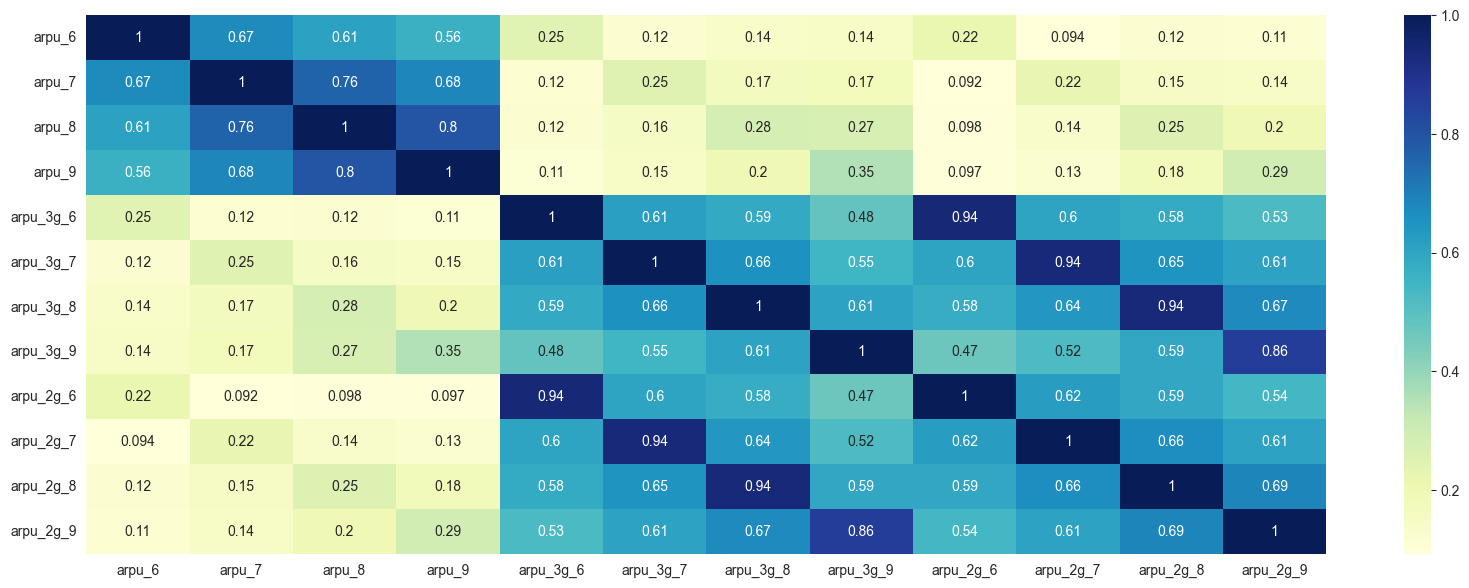

In [59]:
# Plot Heatmap
create_heatmap(data[revenue_columns])

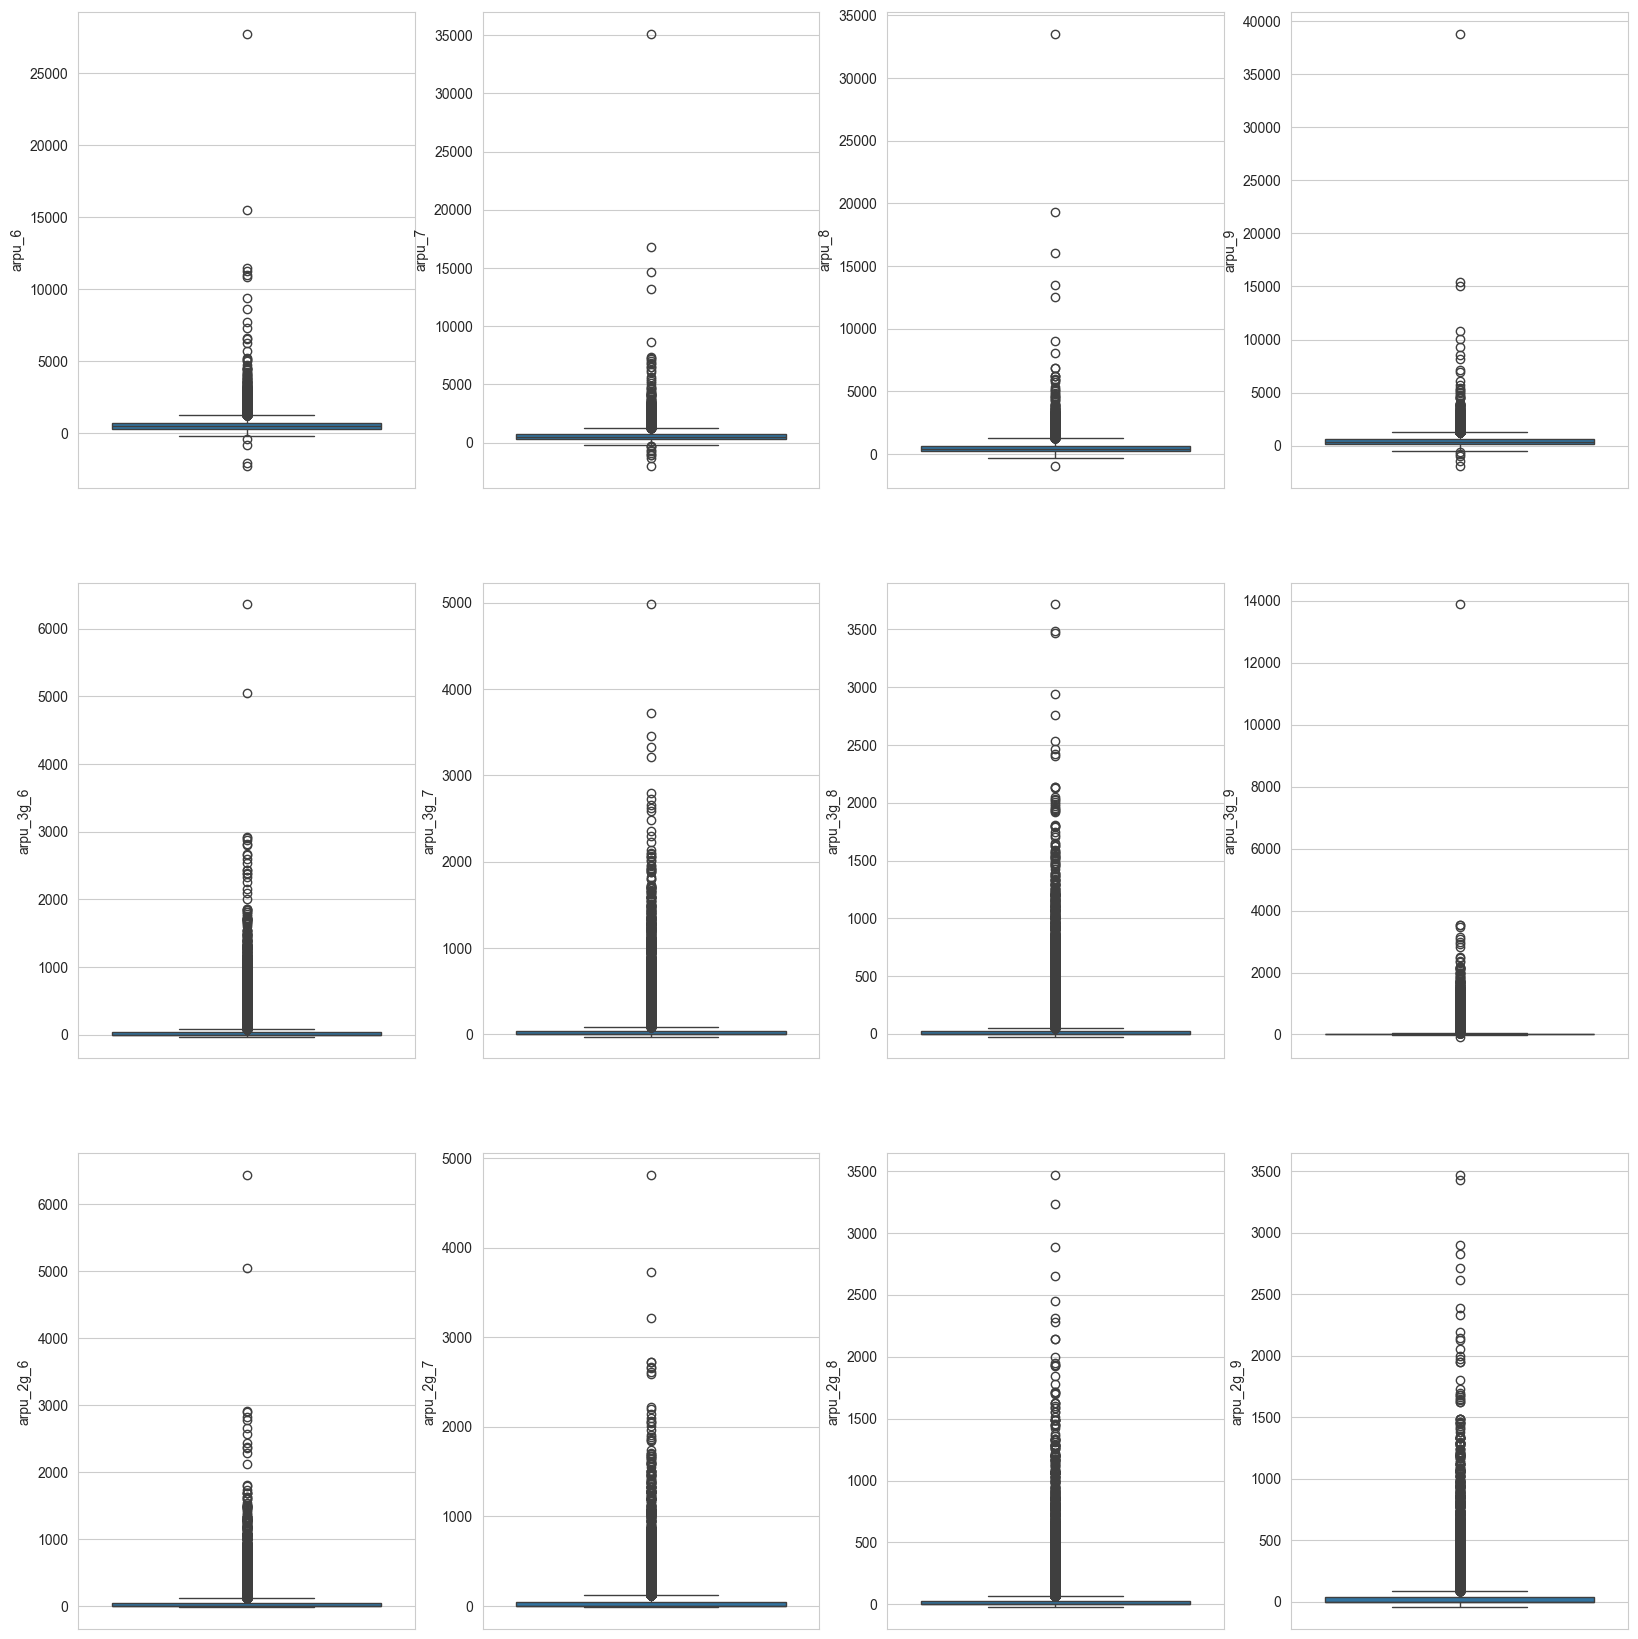

In [60]:
# Checking for outliers
# It iterates over each column, creating a subplot for each one, and displays any potential outliers or anomalies in the data distribution.
i = 0
plt.figure(figsize=(20, 21))
for col in revenue_columns:
    i+=1
    plt.subplot(3, 4, i)
    sns.boxplot(data[col])

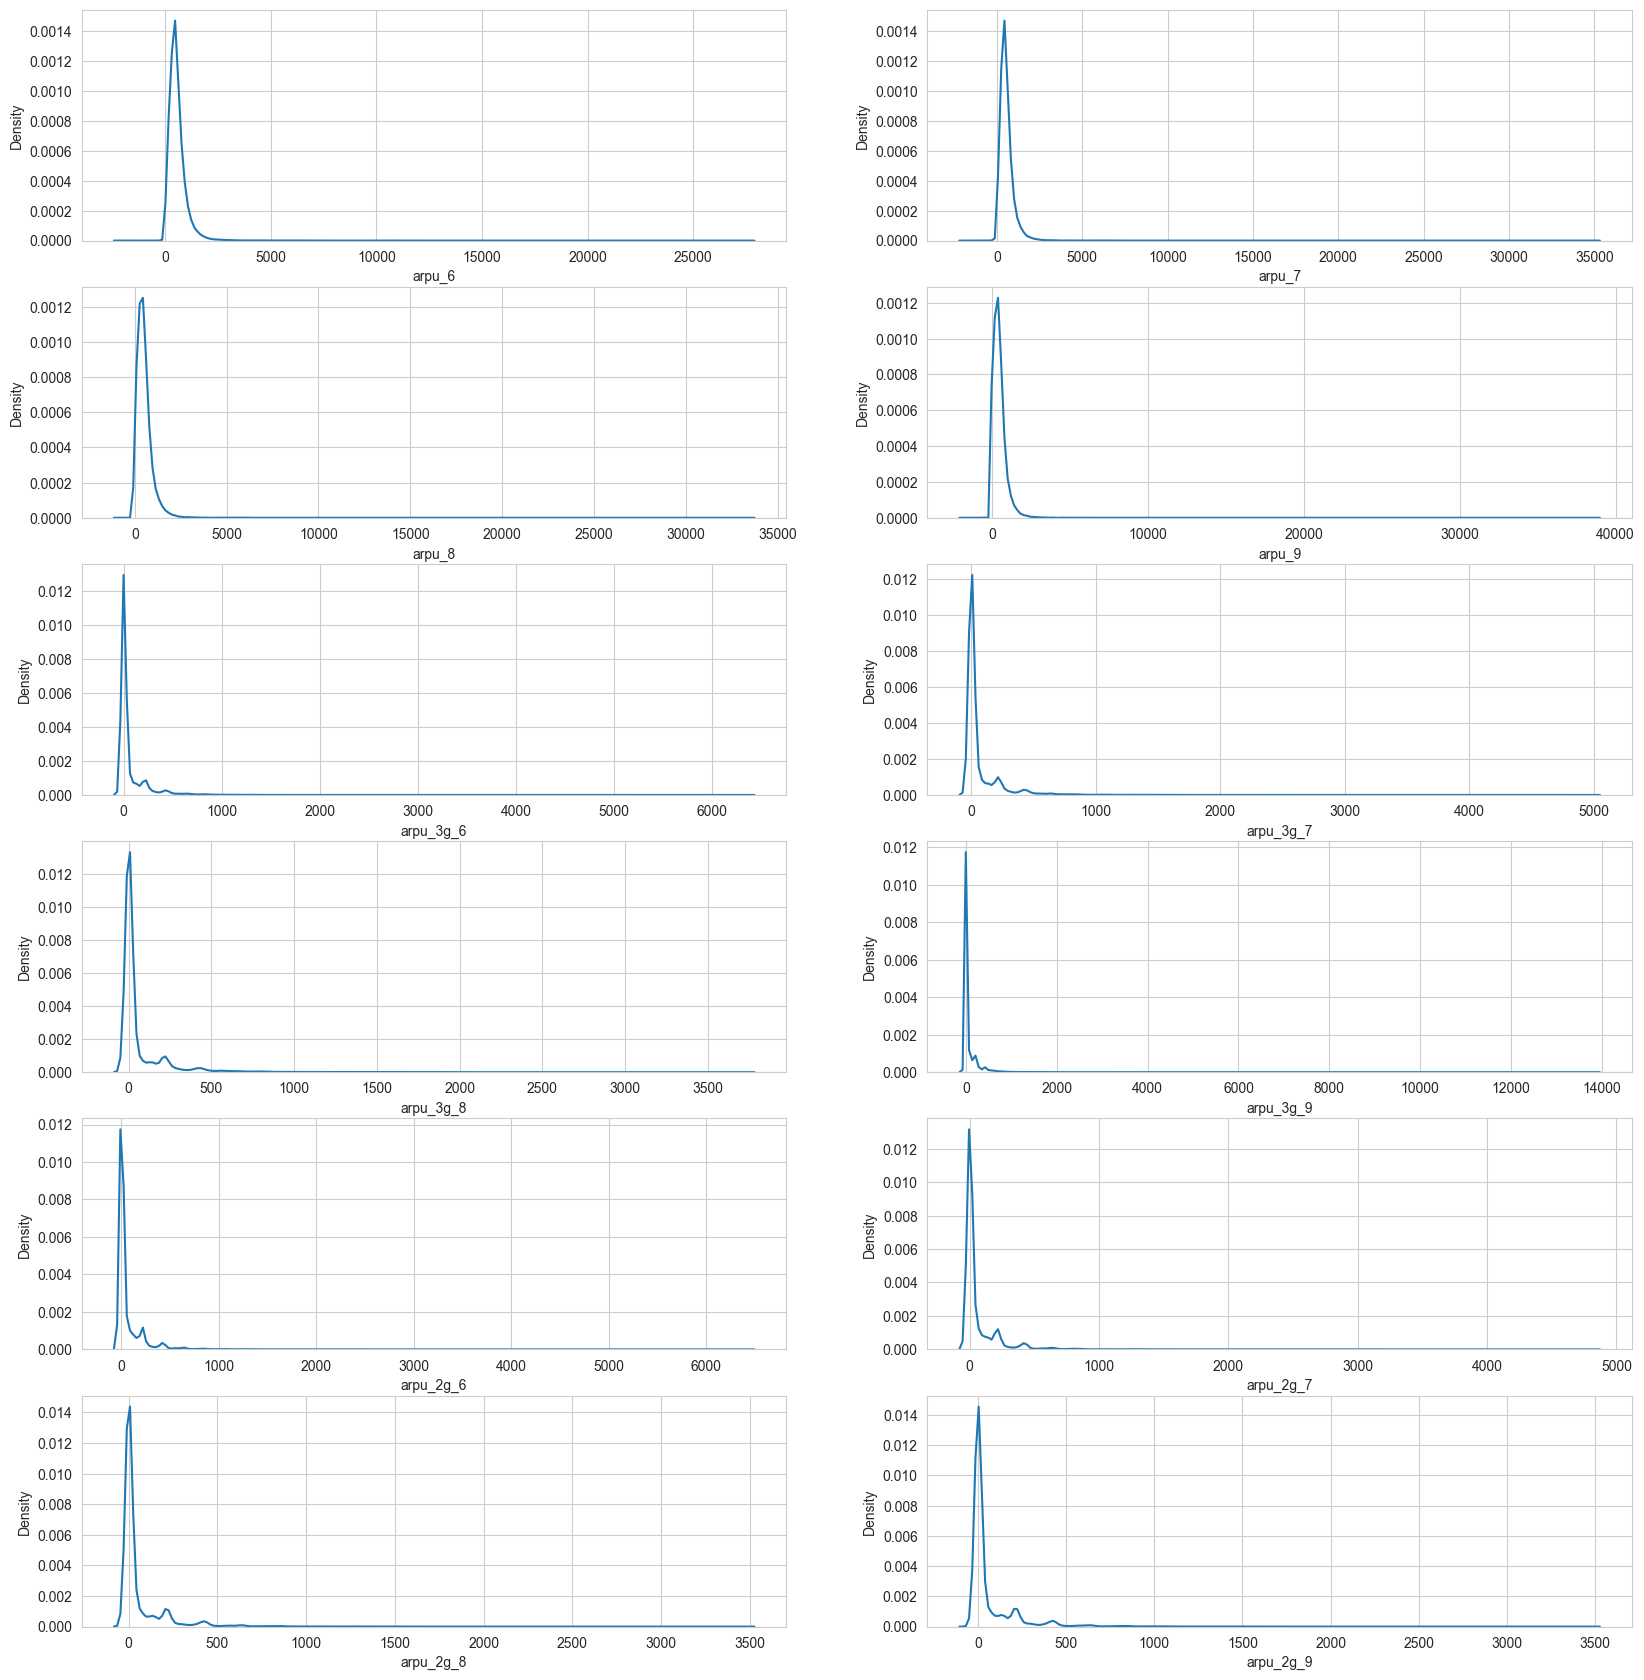

In [61]:
# Checking distribution
# It iterates over each column, creating a subplot for each one, and visualizes the underlying distribution of the data to identify any potential skewness or non-normality issues.
i = 0
plt.figure(figsize=(20, 21))
for col in revenue_columns:
    i+=1
    plt.subplot(6, 2, i)
    sns.kdeplot(data[col])

In [62]:
# Reshape the DataFrame
data_revenue = data[revenue_columns].melt(var_name='Month', value_name='Revenue')

In [63]:
# Add an empty 'Category' column
data_revenue['Category'] = None

In [64]:
# Assign values to 'Category' column based on conditions
data_revenue.loc[
    data_revenue['Month'].str.contains('3g') | data_revenue['Month'].str.contains('2g'),                                    # Month column contains either 2g or 3g
    'Category'
] = 'Data'

In [65]:
# Fill NaN values with 'Call' and modify original DataFrame
data_revenue.fillna('Call', inplace=True)

In [66]:
# Extract last character of 'Month' column, convert to categorical
data_revenue['Month'] = data_revenue['Month'].apply(lambda x: x[-1]).astype('category')

In [67]:
# Define a dictionary to map month numbers to month names
month_map = {
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September'
}

In [68]:
# Map month numbers to month names using the defined dictionary
data_revenue['Month'] = data_revenue['Month'].map(month_map)

In [69]:
# View the first 5 rows of the updated DataFrame
data_revenue.head()

Month   Revenue Category
0  June   197.385     Call
1  June  1069.180     Call
2  June   378.721     Call
3  June   514.453     Call
4  June    74.350     Call

In [70]:
# Pivot the DataFrame to create a table with Month as the index, 
# Category as the column labels, and Revenue summed up for each month
data_revenue.pivot_table(
    index=['Month'],
    columns=['Category'],
    values='Revenue',
    aggfunc='sum'
)

Category           Call        Data
Month                              
June       1.675528e+07  3913540.66
July       1.682403e+07  3999815.95
August     1.525845e+07  3635184.58
September  1.401419e+07  3879905.78

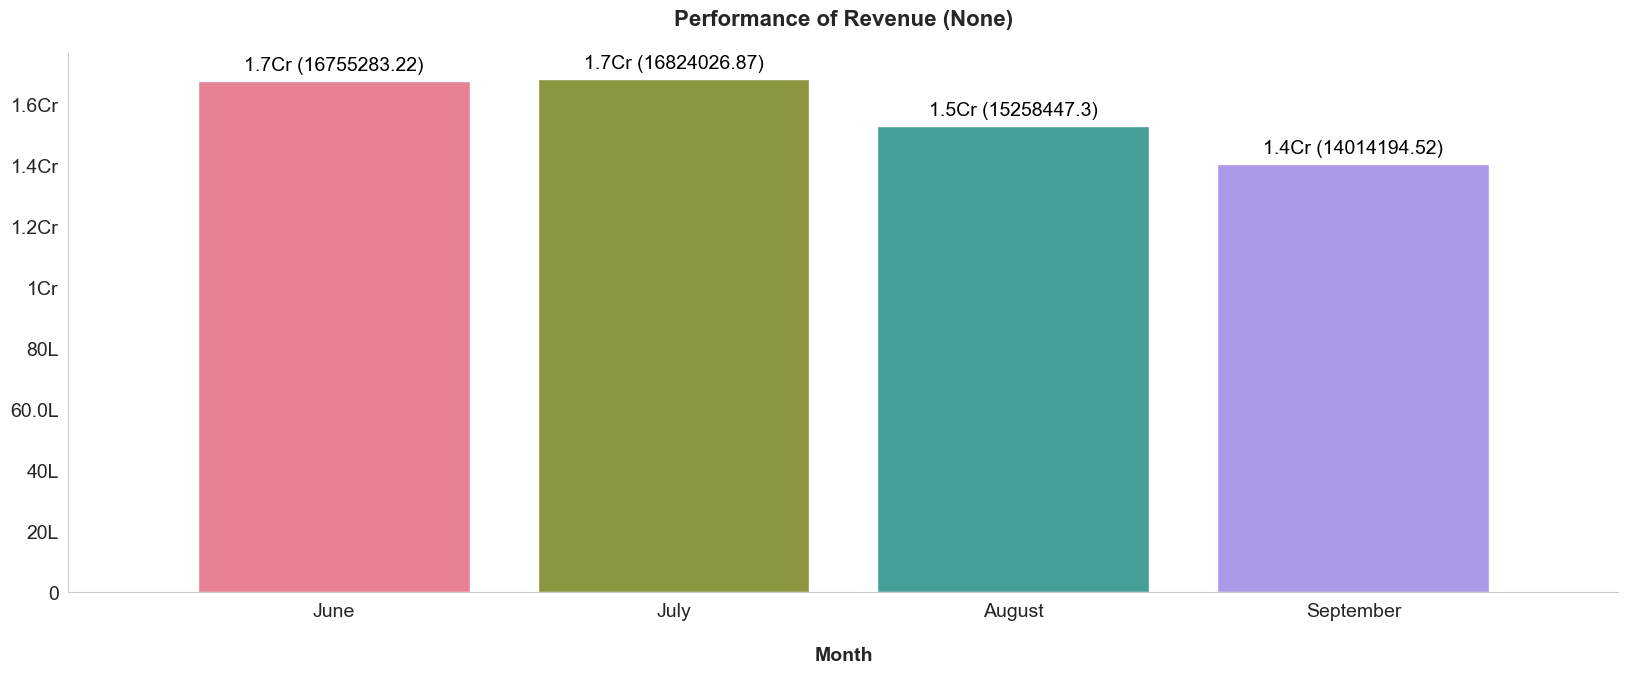

In [71]:
# Create plot for revenue with calls
create_bar_plot(data_revenue.loc[data_revenue['Category'] == 'Call'], 'Revenue')

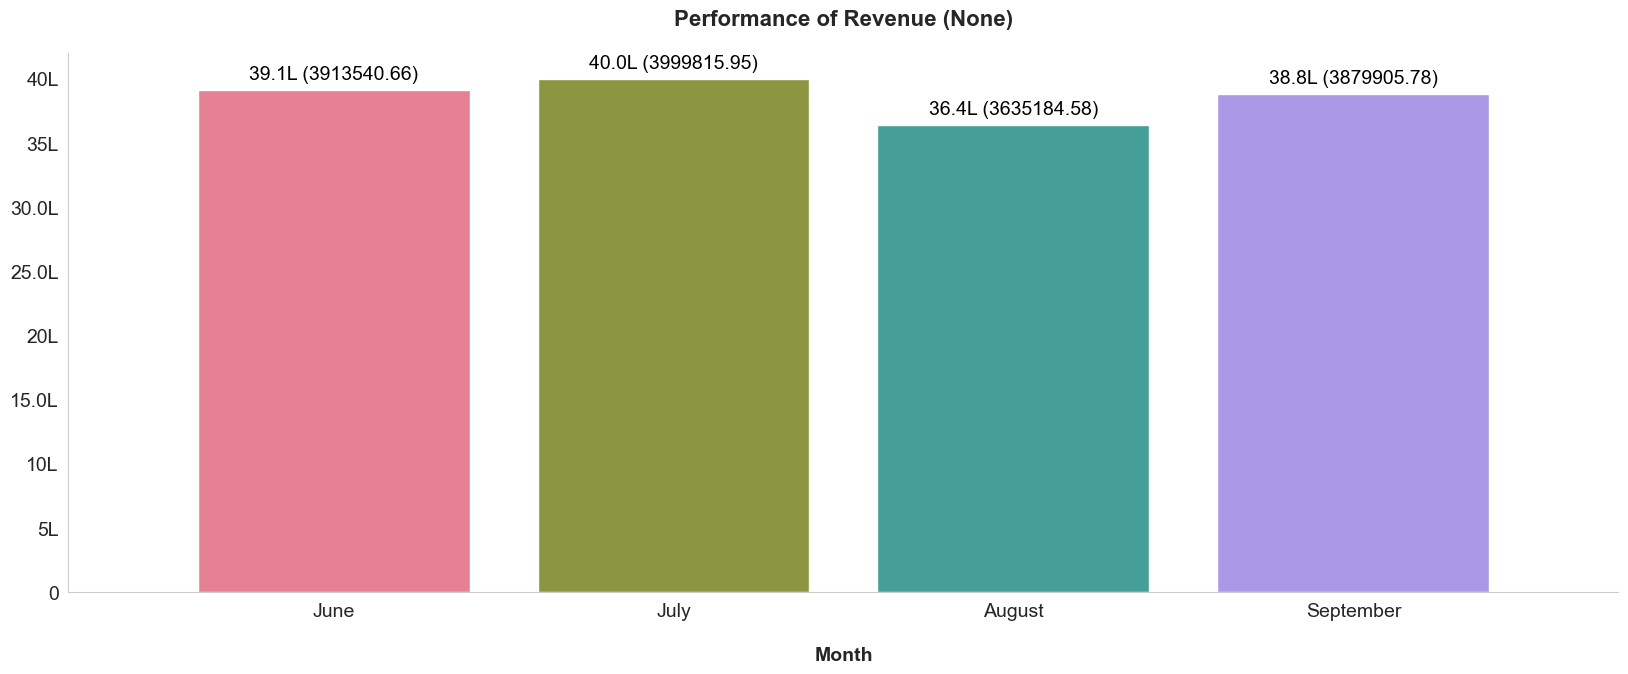

In [72]:
# Create plot for revenue with data
create_bar_plot(data_revenue.loc[data_revenue['Category'] == 'Data'], 'Revenue')

**Remarks:**
- There seems to be a strong co-relation between 2G & 3G revenues for each month.
- Good co-relation observed between revenue from calls for this and subsequent month.
- The Average revenue per user seems to be declining since July for Calls.
- The Average revenue per user dipped in the month of August, but has improved a bit in September.

#### Volume Based Cost columns

In [73]:
# Select columns that contain 'vbc' in their names
vbc_columns = data.columns[data.columns.str.contains('vbc')]

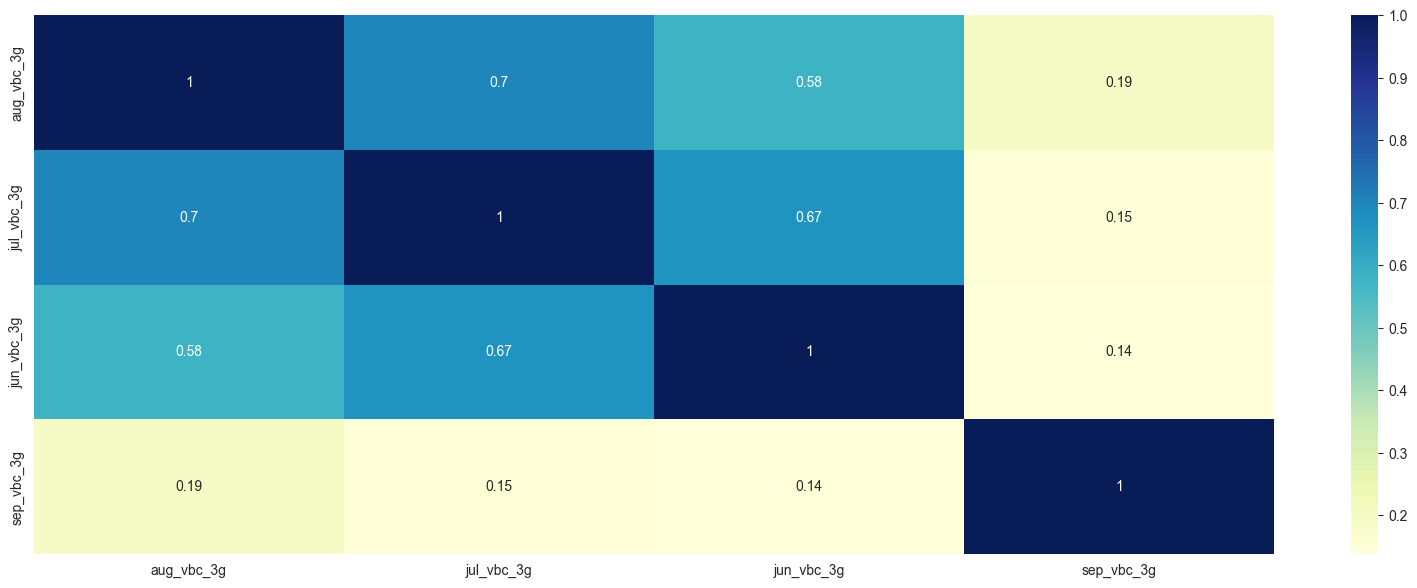

In [74]:
# Plot Heatmap
create_heatmap(data[vbc_columns])

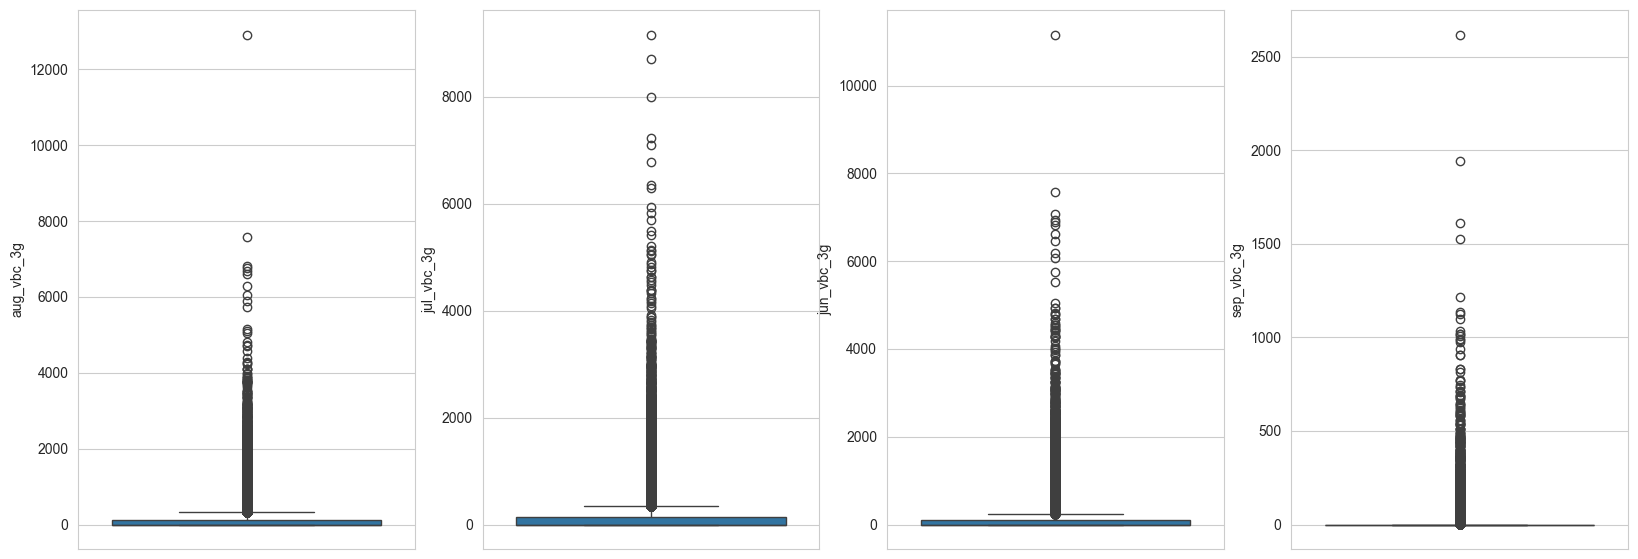

In [75]:
# Checking for outliers
# Create a figure to plot box plots for each column that contains 'vbc'
i = 0
plt.figure(figsize=(20, 7))
for col in vbc_columns:
    i+=1
    plt.subplot(1, 4, i)
    sns.boxplot(data[col])                                                                                          # Plot the box plot for each column

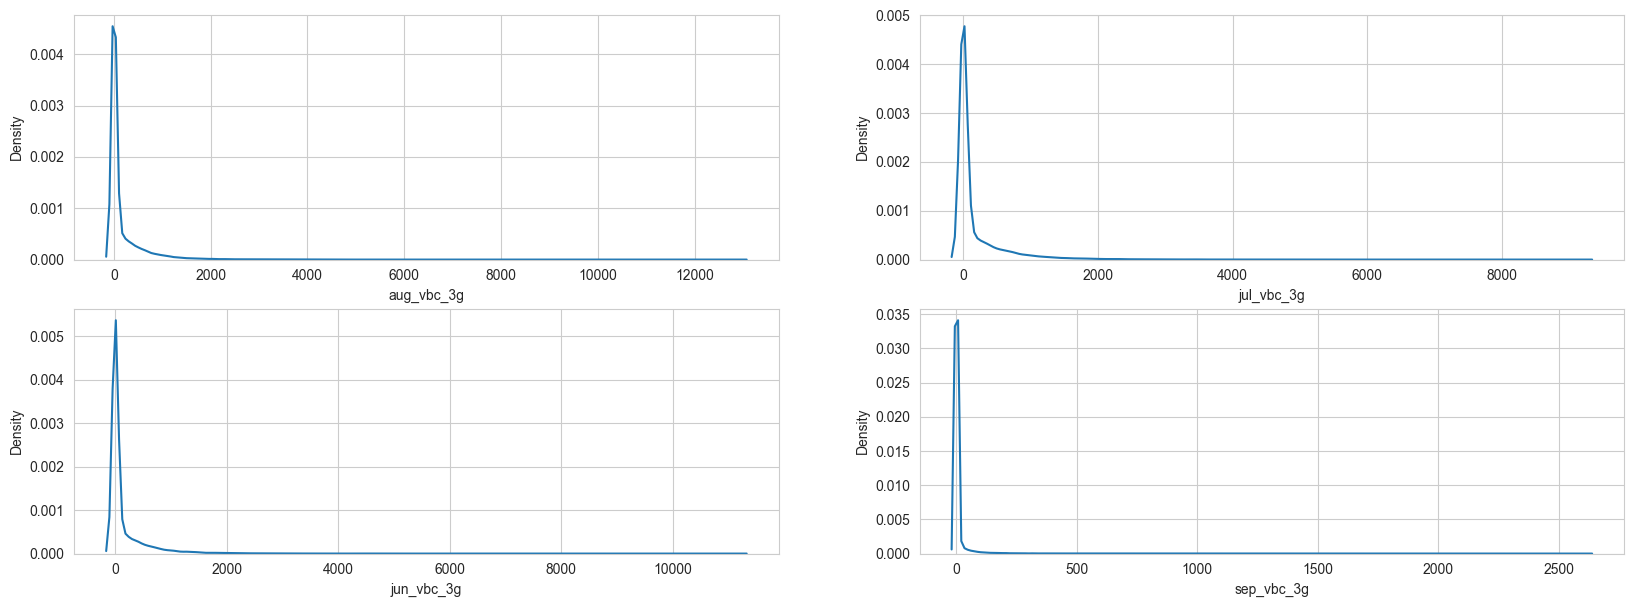

In [76]:
# Checking distribution
# Create a figure to plot kernel density plots for each column that contains 'vbc'
i = 0
plt.figure(figsize=(20, 7))
for col in vbc_columns:
    i+=1
    plt.subplot(2, 2, i)
    sns.kdeplot(data[col])                                                                                      # Plot the kernel density plot for each column

In [77]:
# View the first few rows of the DataFrame that contains 'vbc' columns
data[vbc_columns].head()

aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
mobile_number                                                
7000842753          30.40        0.00      101.20        3.58
7000701601          57.74       19.38       18.74        0.00
7001524846          21.03      910.65      122.16        0.00
7002124215           0.00        0.00        0.00        0.00
7000887461          40.45       51.86        0.00        0.00

In [78]:
# Reshape the DataFrame that contains 'vbc' columns
data_vbc = data[vbc_columns].melt(var_name='Month', value_name='Cost')

In [79]:
# Remove '_vbc_3g' from 'Month' column
data_vbc['Month'] = data_vbc['Month'].str.replace('_vbc_3g', '')

In [80]:
# Define a dictionary to map month abbreviations to full month names
month_map_1 = {
    'aug': 'June',
    'jul': 'July',
    'jun': 'August',
    'sep': 'September'
}

In [81]:
# Map month abbreviations to full month names using the defined dictionary
data_vbc['Month'] = data_vbc['Month'].map(month_map_1)

In [82]:
# View the first few rows of the updated DataFrame
data_vbc.head()

Month   Cost
0  June  30.40
1  June  57.74
2  June  21.03
3  June   0.00
4  June  40.45

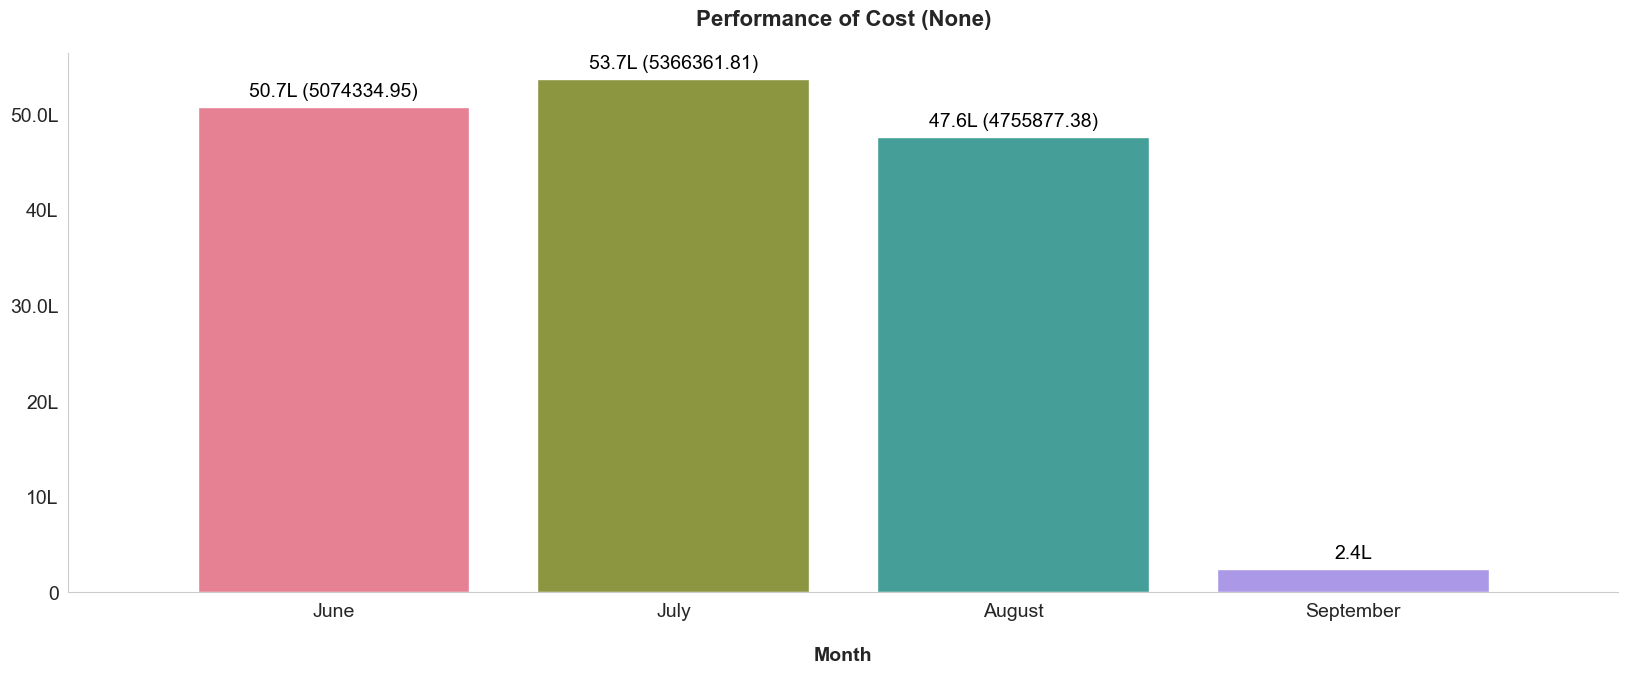

In [83]:
# Get Volume based cost performance
create_bar_plot(data_vbc, 'Cost')

**Remarks:**
- There's a drastic decline in Volume costs for 3G in September. Also, noticeable by a very weak co-relation between September and other months.
- There was a rise in cost in July and have been declining since.
- There exists outliers in the vbs columns and the distribution is skewed to the left.

#### Sales Columns

In [84]:
# Dropping engineered columns
data.drop(columns=['overall_rech_amt_6', 'overall_rech_amt_7',
                   'avg_rech_amount_good_months'], inplace=True)

In [85]:
# Update Recharge columns
rech_columns = data.columns[data.columns.str.contains('rech')]
rech_columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_amt_data_6',
       'total_rech_amt_data_7', 'total_rech_amt_data_8',
       'total_rech_amt_data_9'],
      dtype='object')

In [86]:
# Define two lists of column names
rech_columns_1 = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                  'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
                  'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
                  'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9']

rech_columns_2 = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                  'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
                  'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
                  'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                  'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                  'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
                  'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_amt_data_6',
                  'total_rech_amt_data_7', 'total_rech_amt_data_8',
                  'total_rech_amt_data_9']

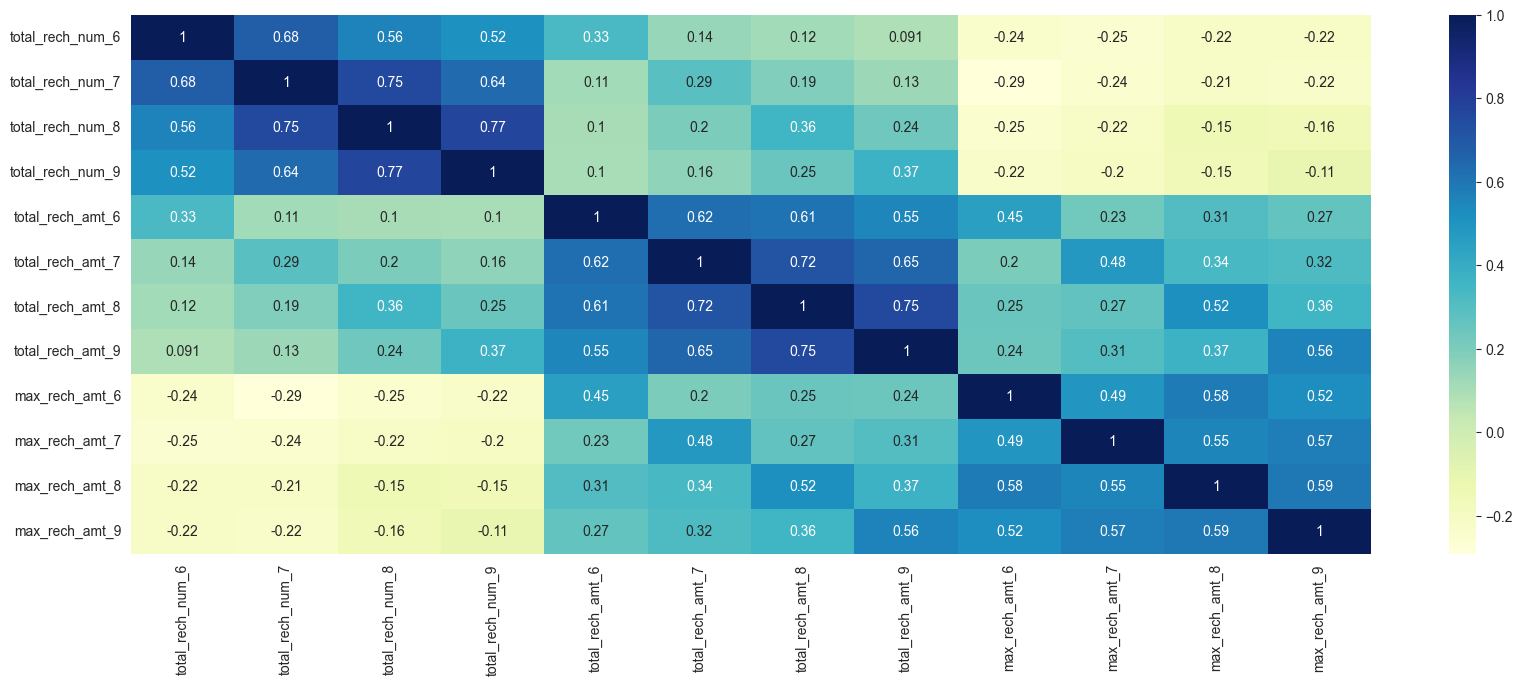

In [87]:
# Heatmaps for regular calls recharges
create_heatmap(data[rech_columns_1])

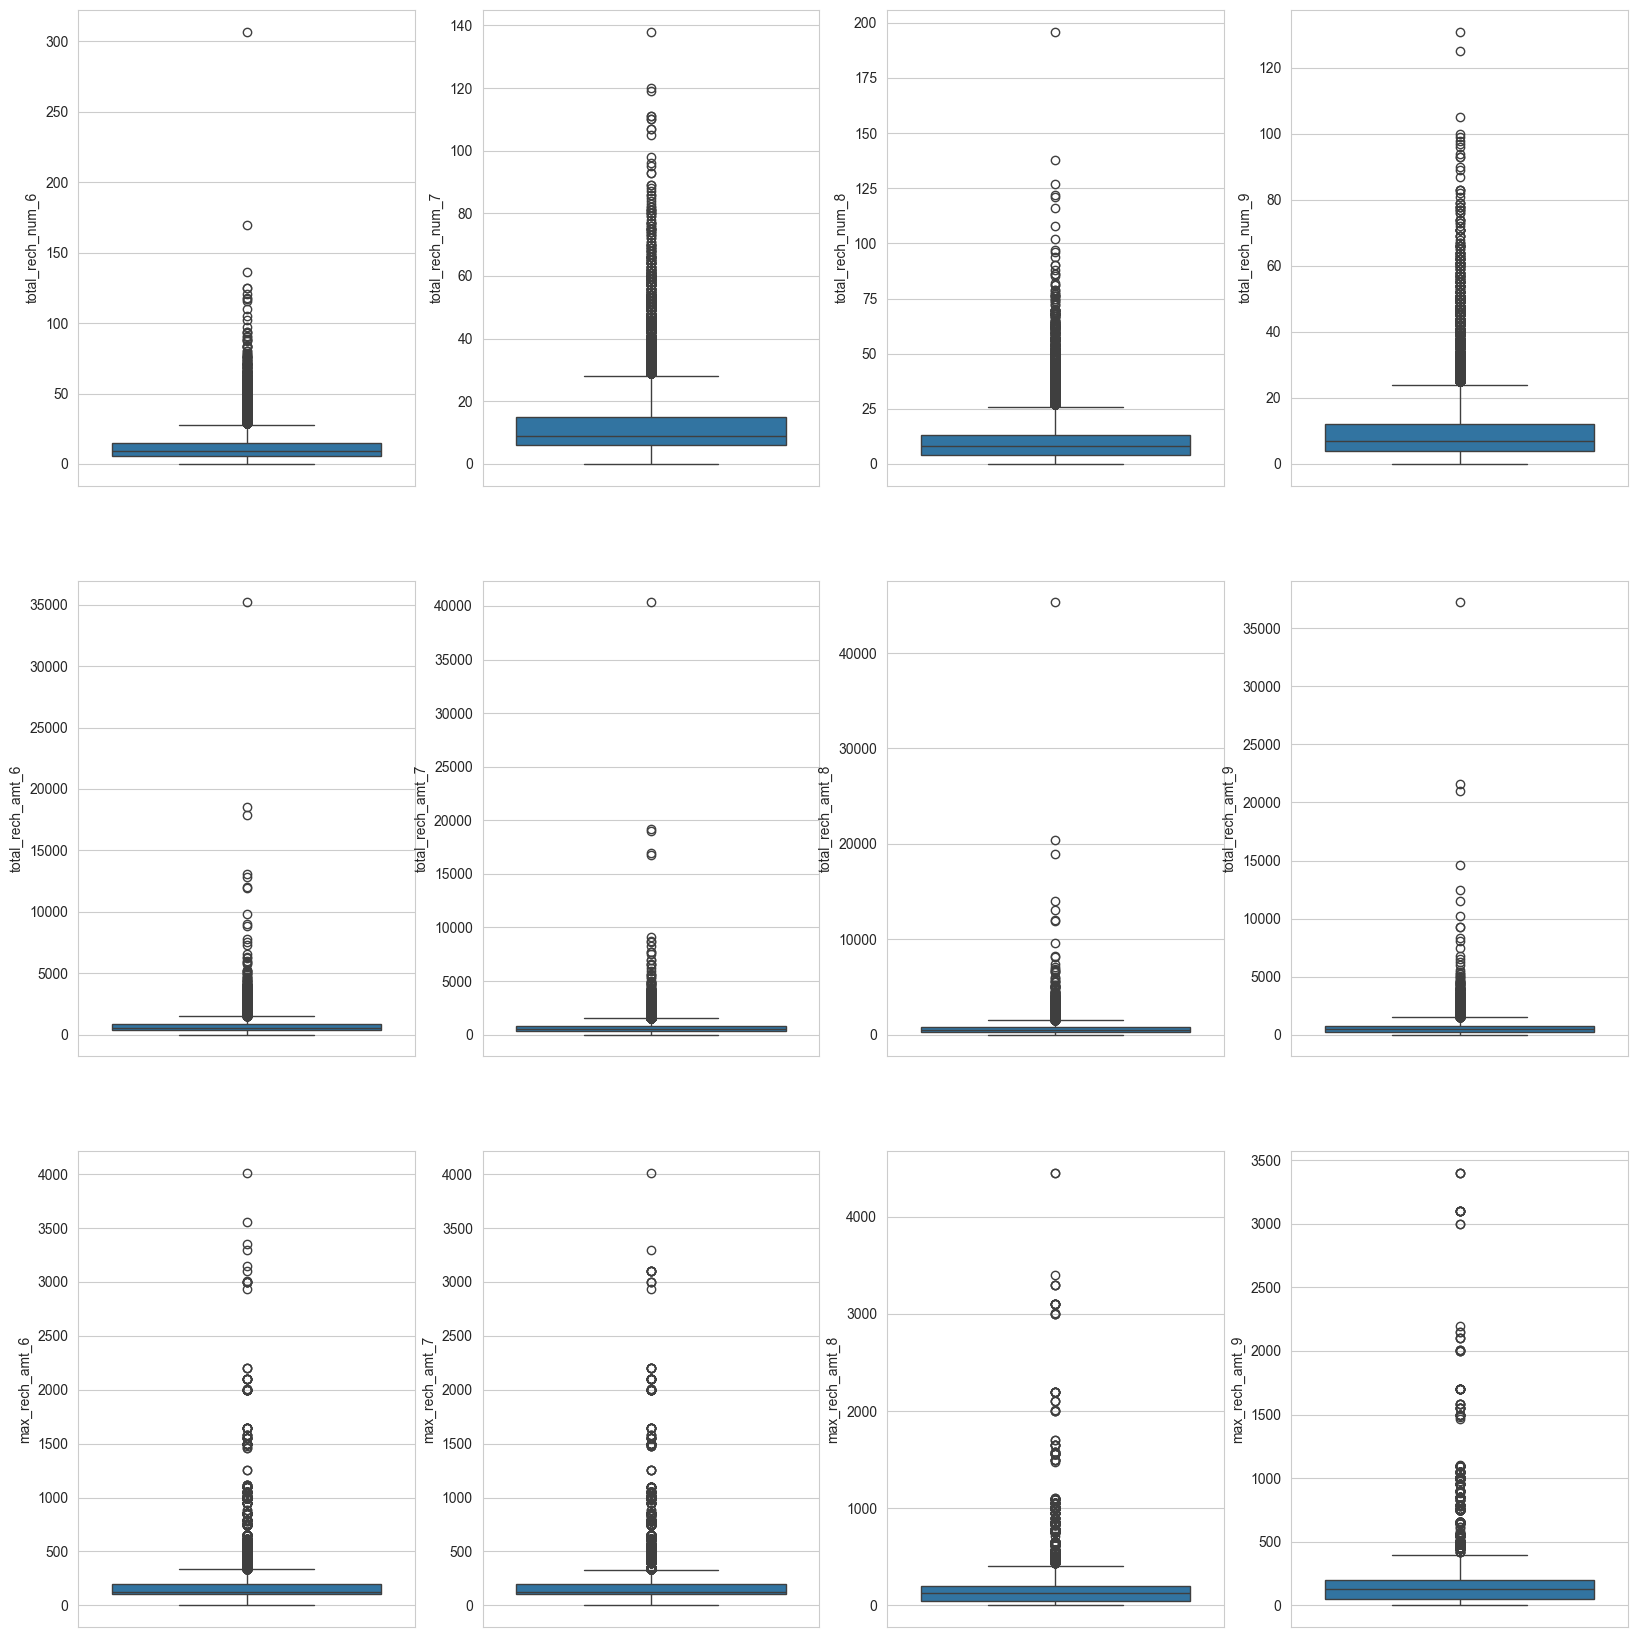

In [88]:
# Check outliers
i = 0
plt.figure(figsize=(20, 21))
for col in rech_columns_1:
    i += 1
    plt.subplot(3, 4, i)
    sns.boxplot(data[col])

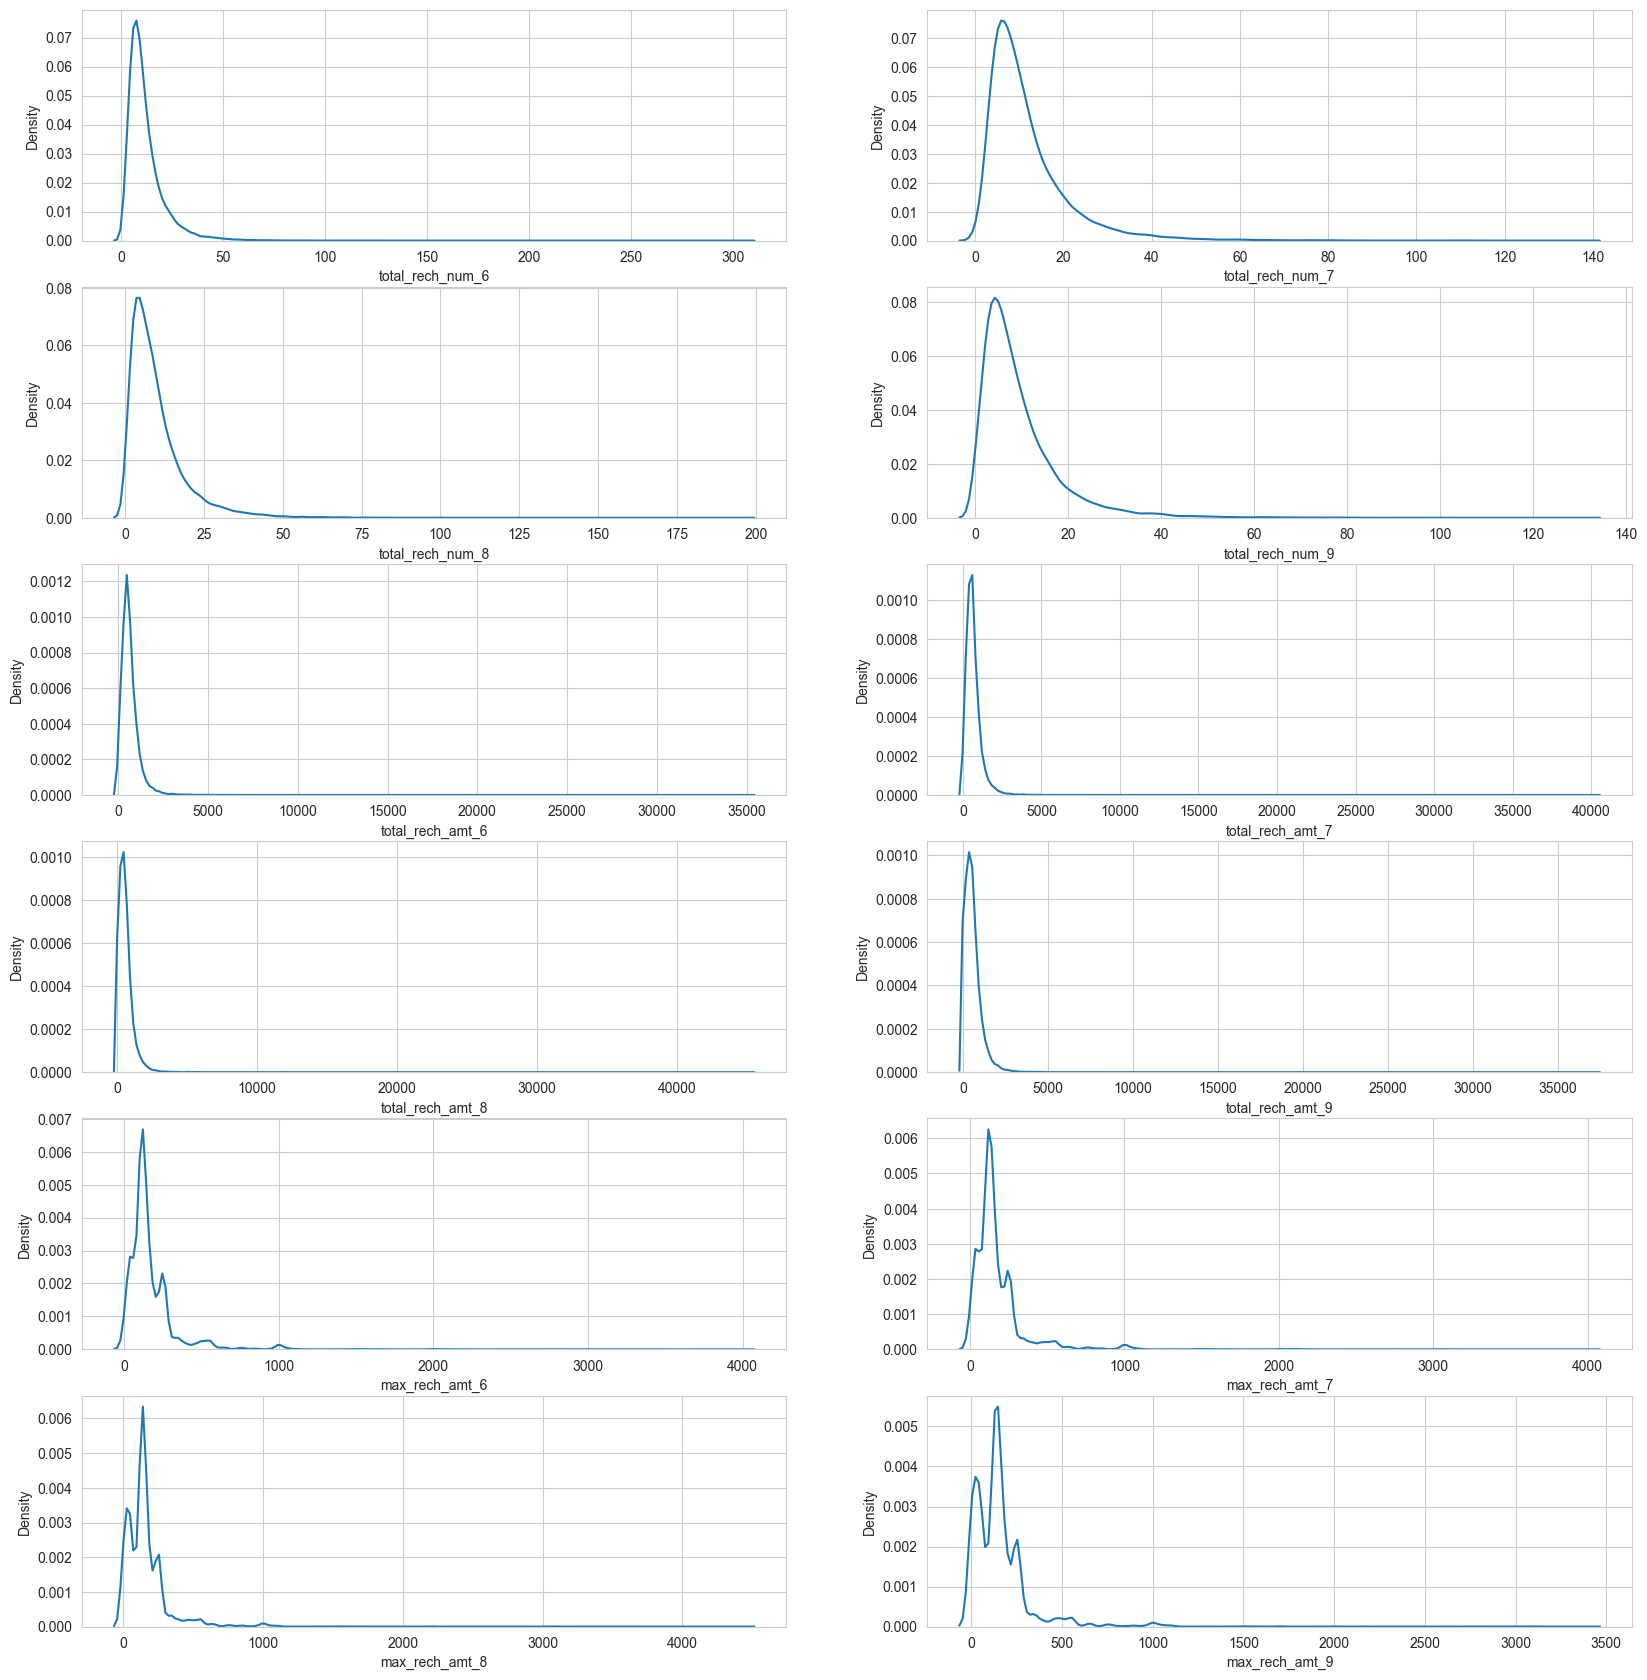

In [89]:
# Check outliers
i = 0
plt.figure(figsize=(20, 21))
for col in rech_columns_1:
    i += 1
    plt.subplot(6, 2, i)
    sns.kdeplot(data[col])

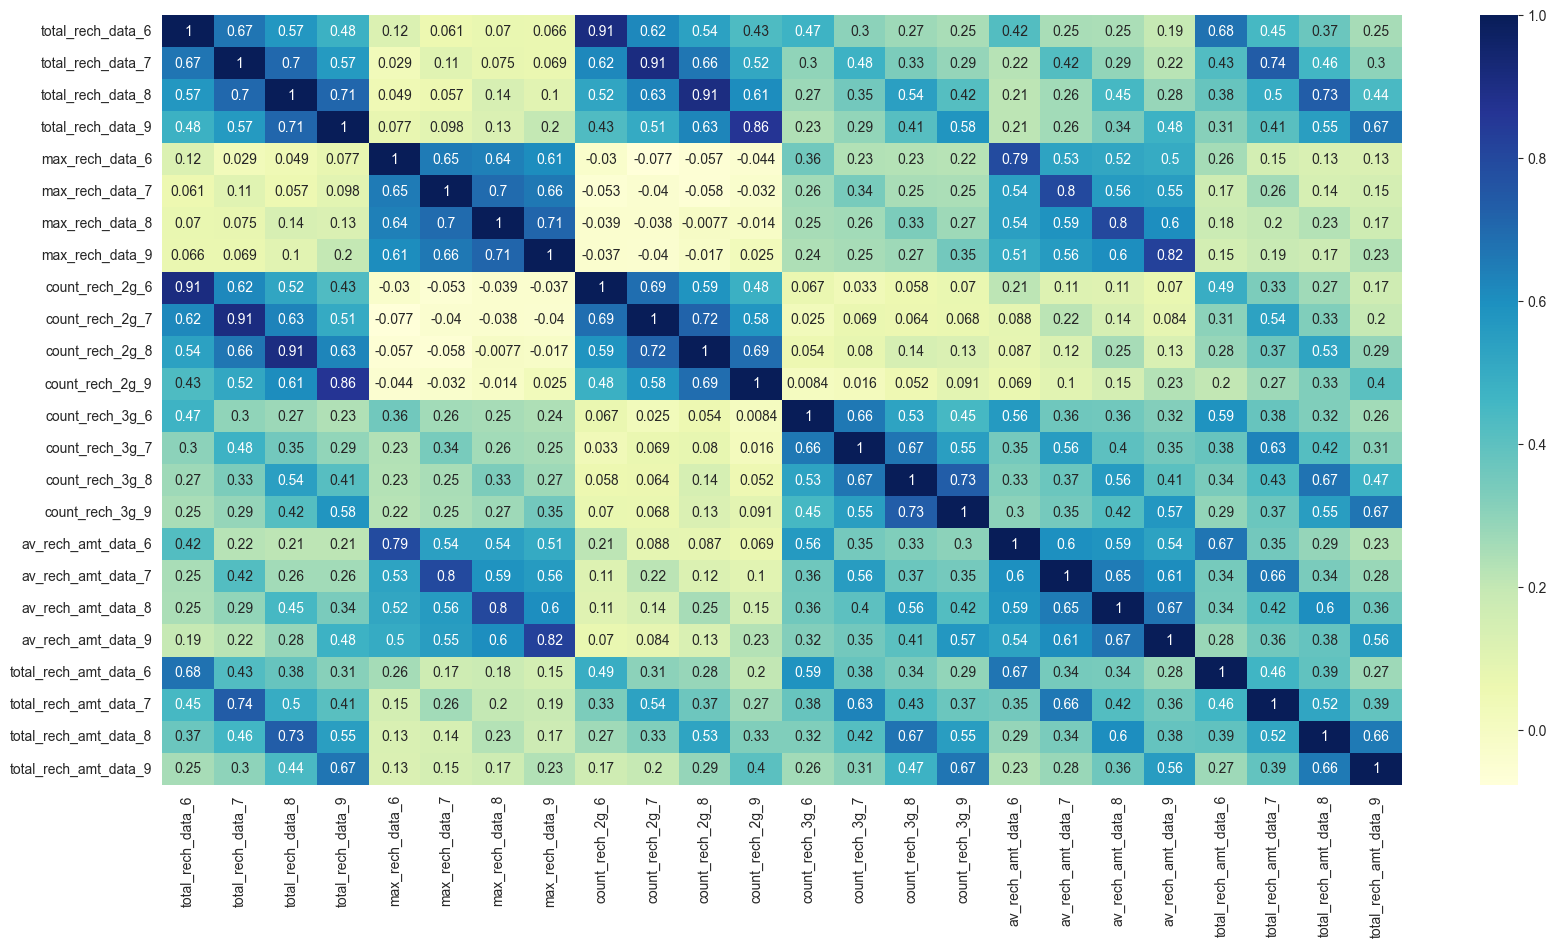

In [90]:
# Heatmaps for regular calls recharges
create_heatmap(data[rech_columns_2], fig_size=(20, 10))

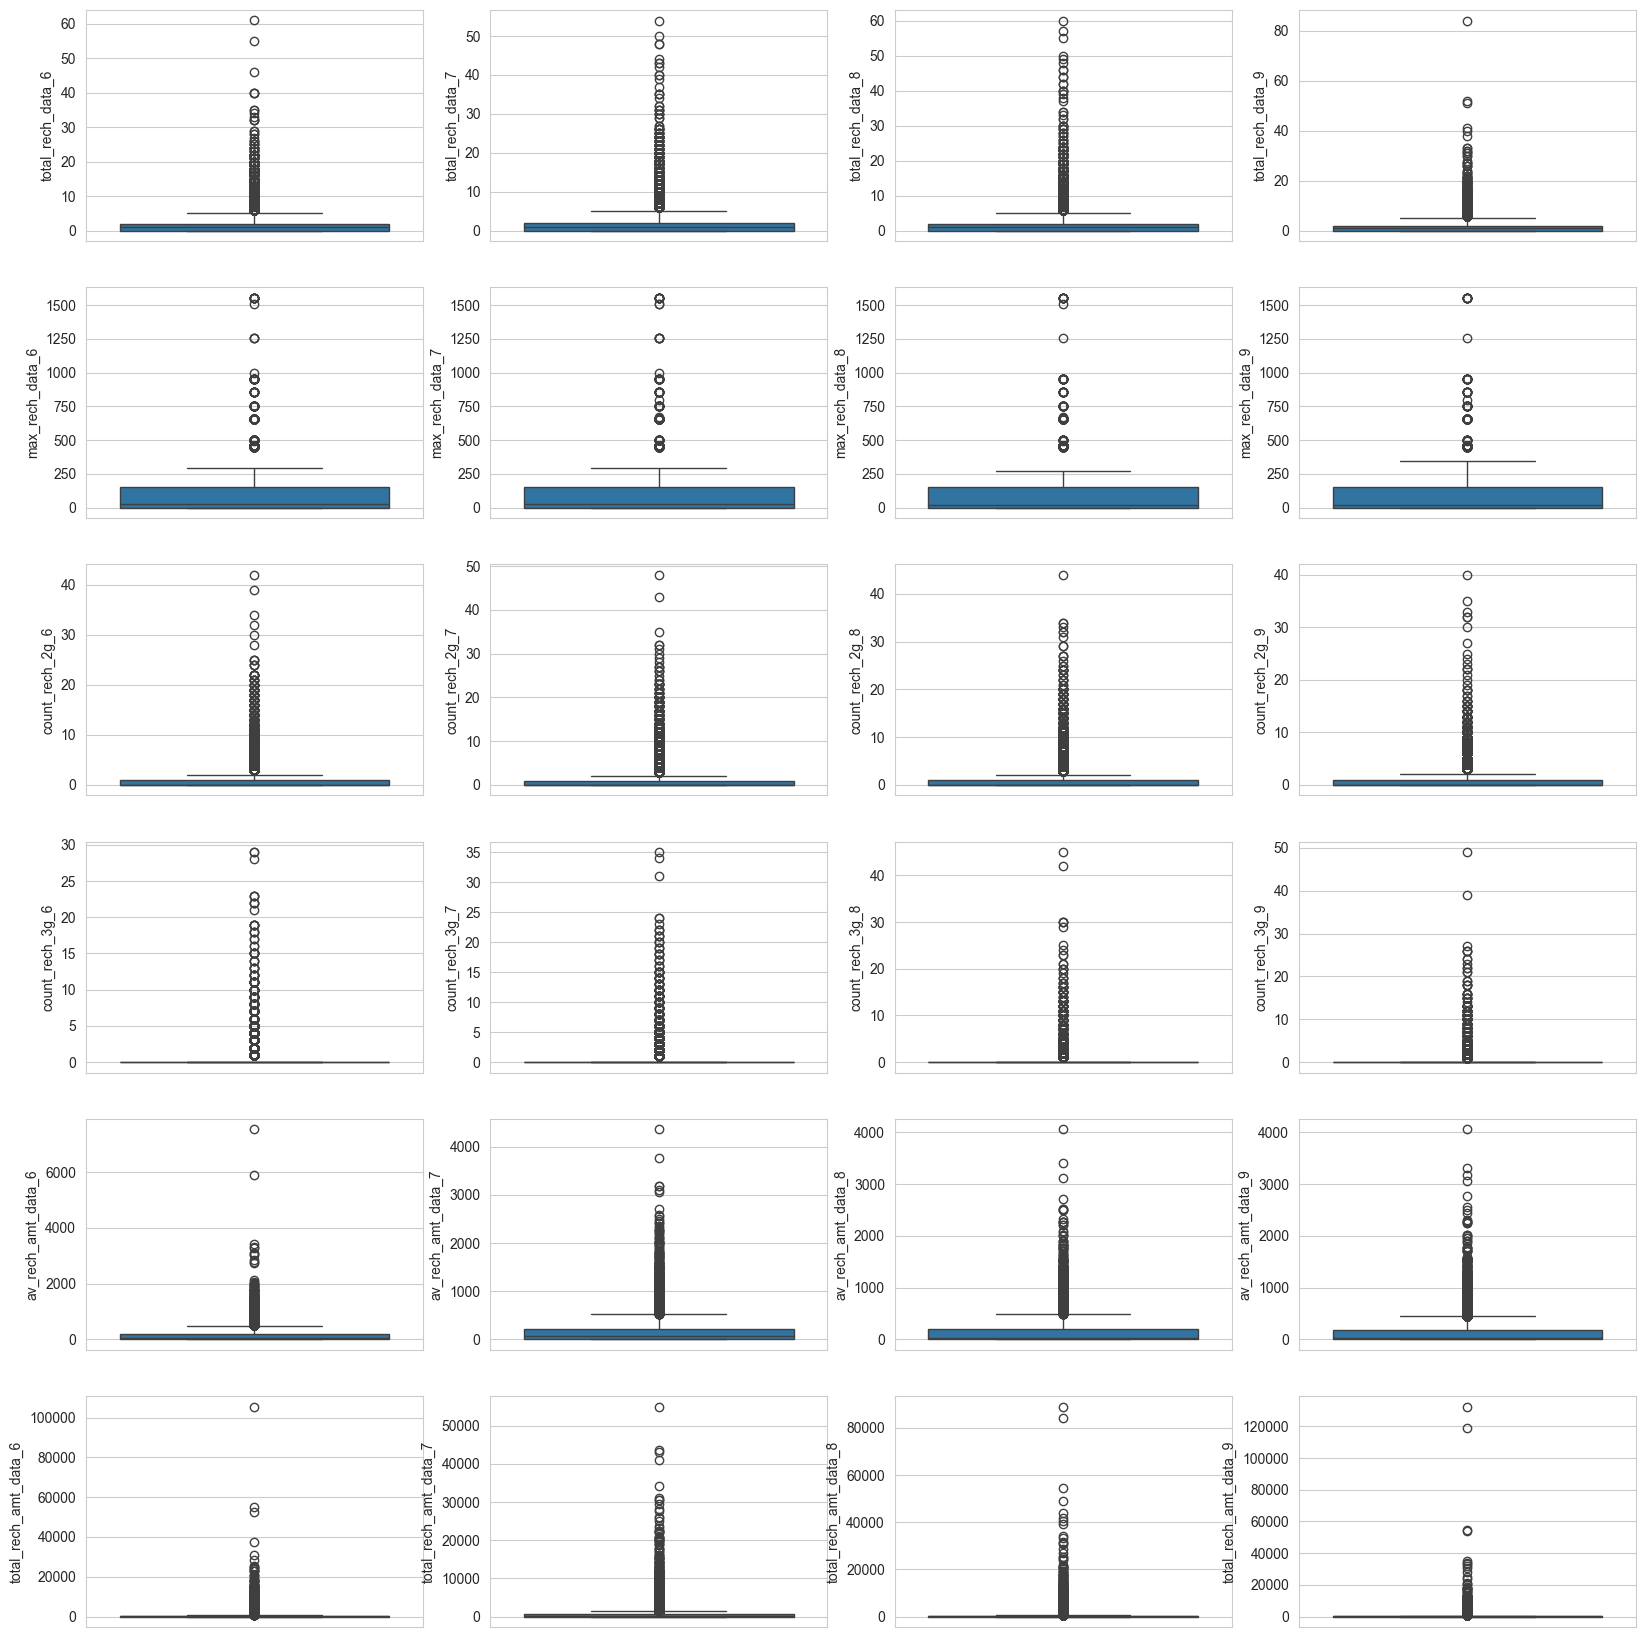

In [91]:
# Check outliers
i = 0
plt.figure(figsize=(20, 21))
for col in rech_columns_2:
    i += 1
    plt.subplot(6, 4, i)
    sns.boxplot(data[col])

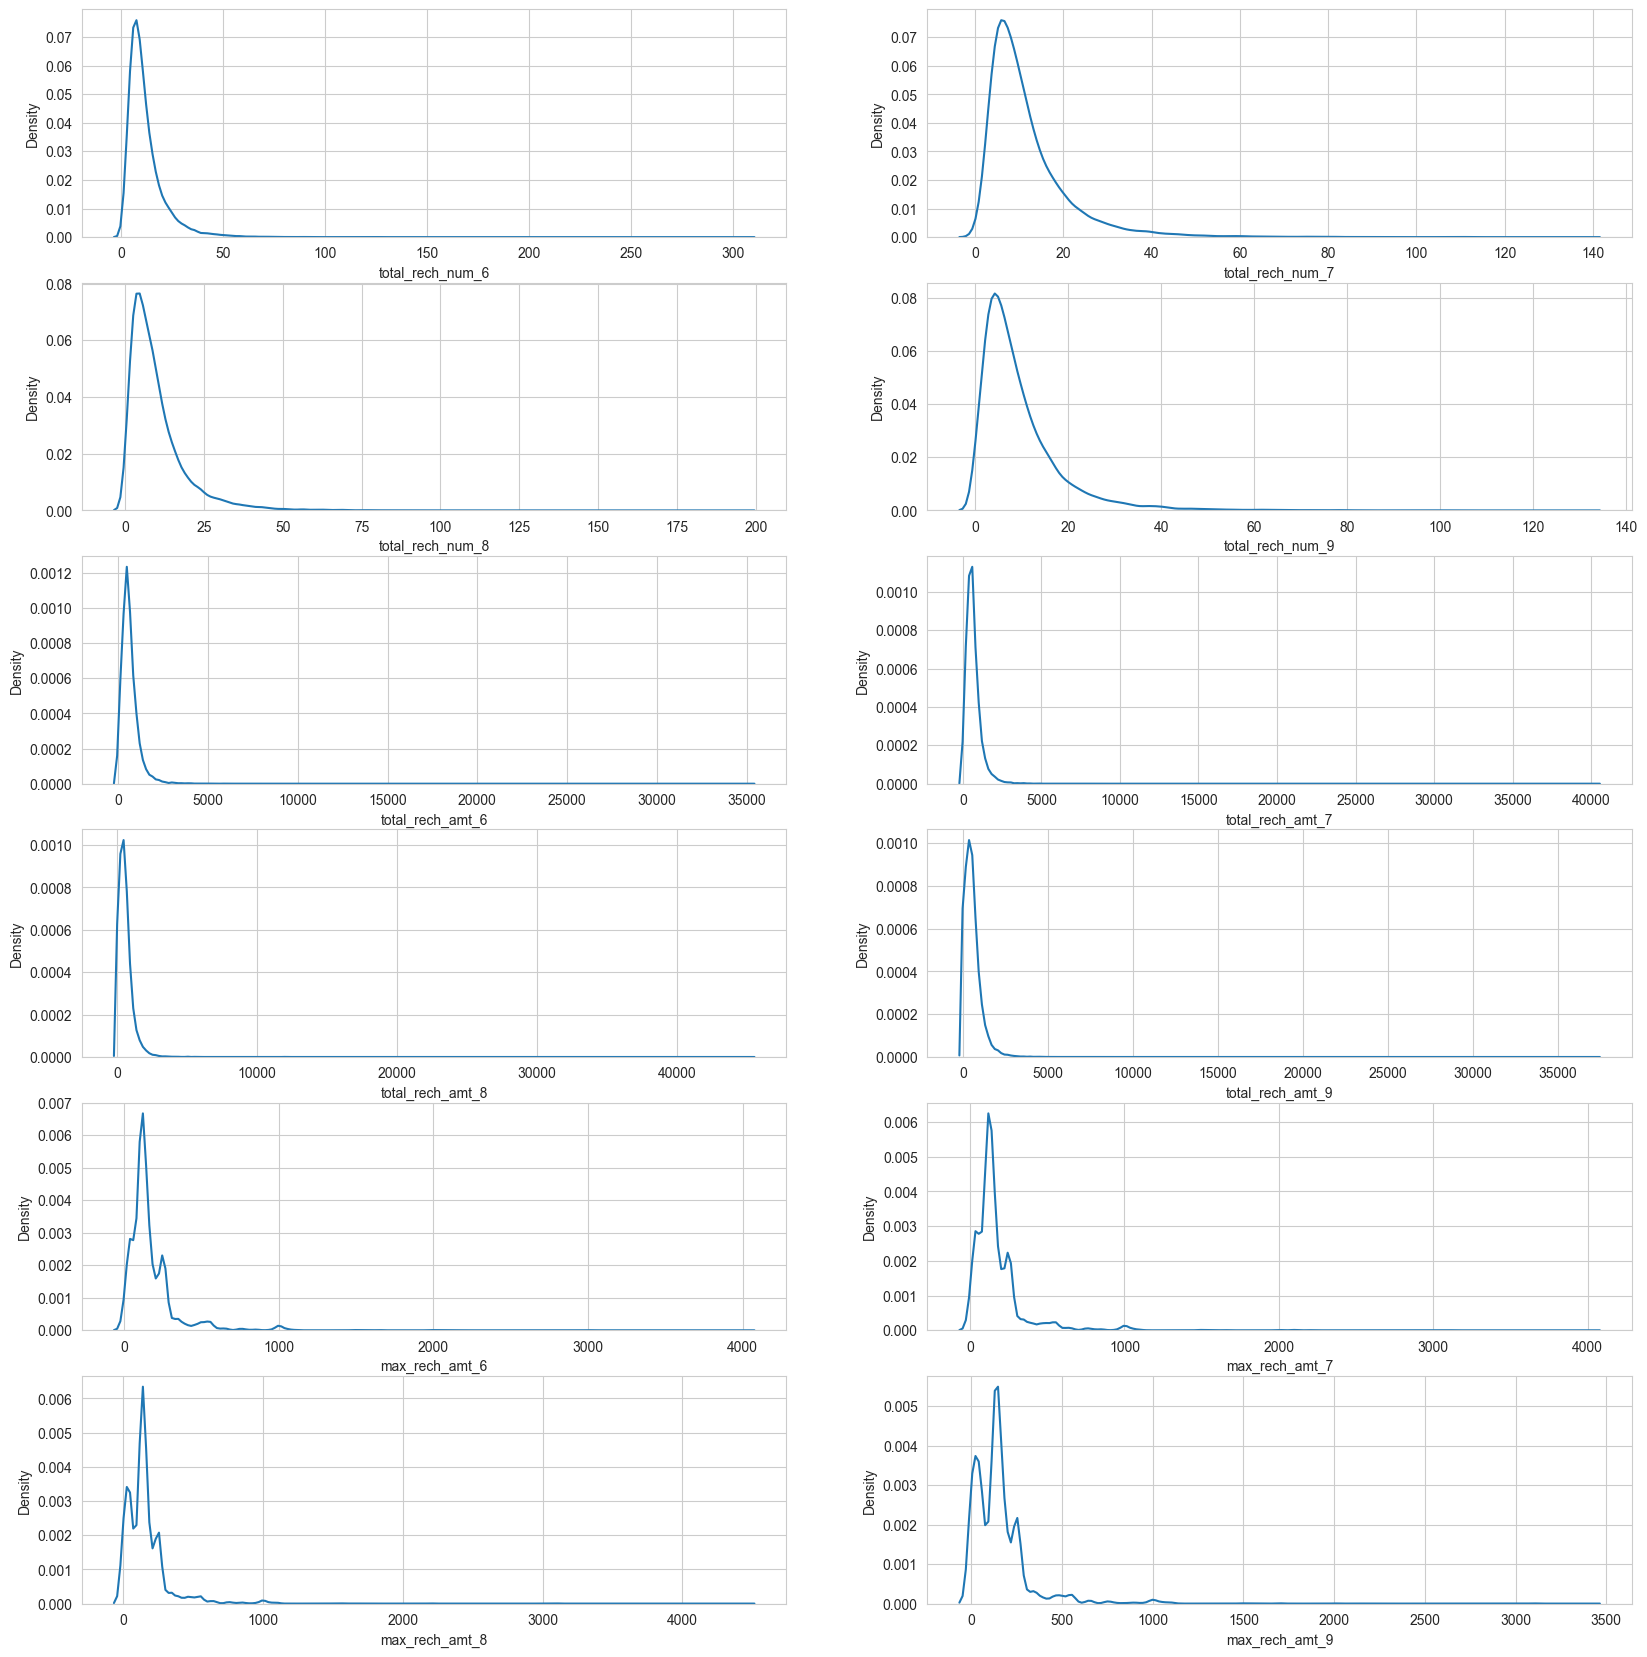

In [92]:
# Check outliers
i = 0
plt.figure(figsize=(20, 42))
for col in rech_columns_1:
    i += 1
    plt.subplot(12, 2, i)
    sns.kdeplot(data[col])

In [93]:
# Reshape the DataFrame that contains rech columns
data_sale_rech = data[rech_columns].melt(var_name='Month', value_name='Sales')

In [94]:
# Add new columns to the DataFrame for category details
data_sale_rech[['Category', 'Type_1', 'Type_2']] = data_sale_rech.apply(lambda row: get_category(row['Month']), axis=1, result_type='expand')

In [95]:
# Extract the last character from each 'Month' value and assign it to a new column
data_sale_rech['Month'] = data_sale_rech['Month'].str[-1]

In [96]:
# Map 'Month' values to a predefined dictionary and assign it back to the DataFrame
data_sale_rech['Month'] = data_sale_rech['Month'].map(month_map)

In [97]:
# Get information about the DataFrame, including data types and summary statistics
data_sale_rech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080036 entries, 0 to 1080035
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Month     1080036 non-null  object 
 1   Sales     1080036 non-null  float64
 2   Category  1080036 non-null  object 
 3   Type_1    1080036 non-null  object 
 4   Type_2    240008 non-null   object 
dtypes: float64(1), object(4)
memory usage: 41.2+ MB


In [98]:
# Display the first 5 rows of the DataFrame
data_sale_rech.head()

Month  Sales              Category Type_1 Type_2
0  June    4.0  Total Recharge Count  Calls   None
1  June    5.0  Total Recharge Count  Calls   None
2  June   19.0  Total Recharge Count  Calls   None
3  June   22.0  Total Recharge Count  Calls   None
4  June    3.0  Total Recharge Count  Calls   None

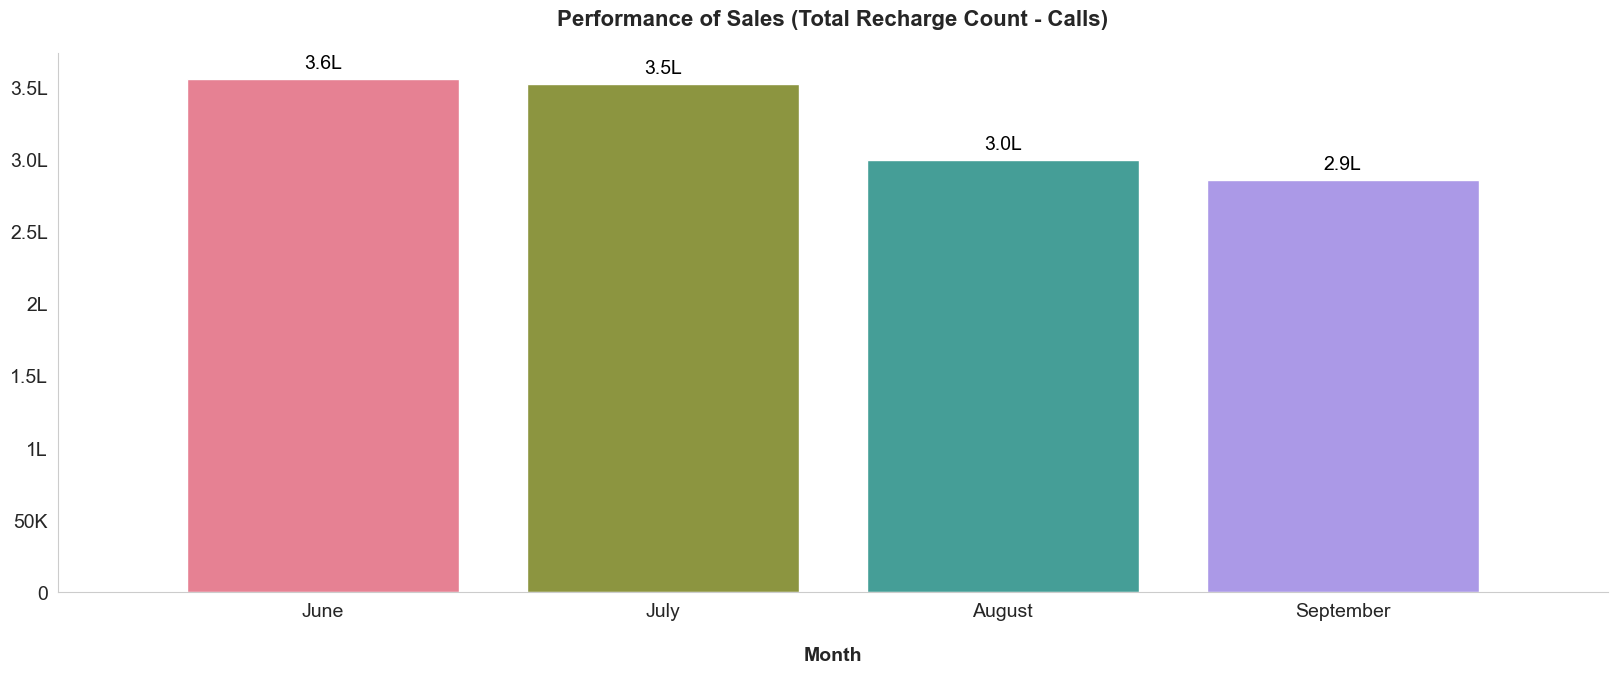

In [99]:
# Performance of Total Recharge count for calls across months
create_bar_plot(data_sale_rech.loc[(data_sale_rech['Category'] == 'Total Recharge Count') & (data_sale_rech['Type_1'] == 'Calls')], 'Sales', 'Total Recharge Count - Calls')

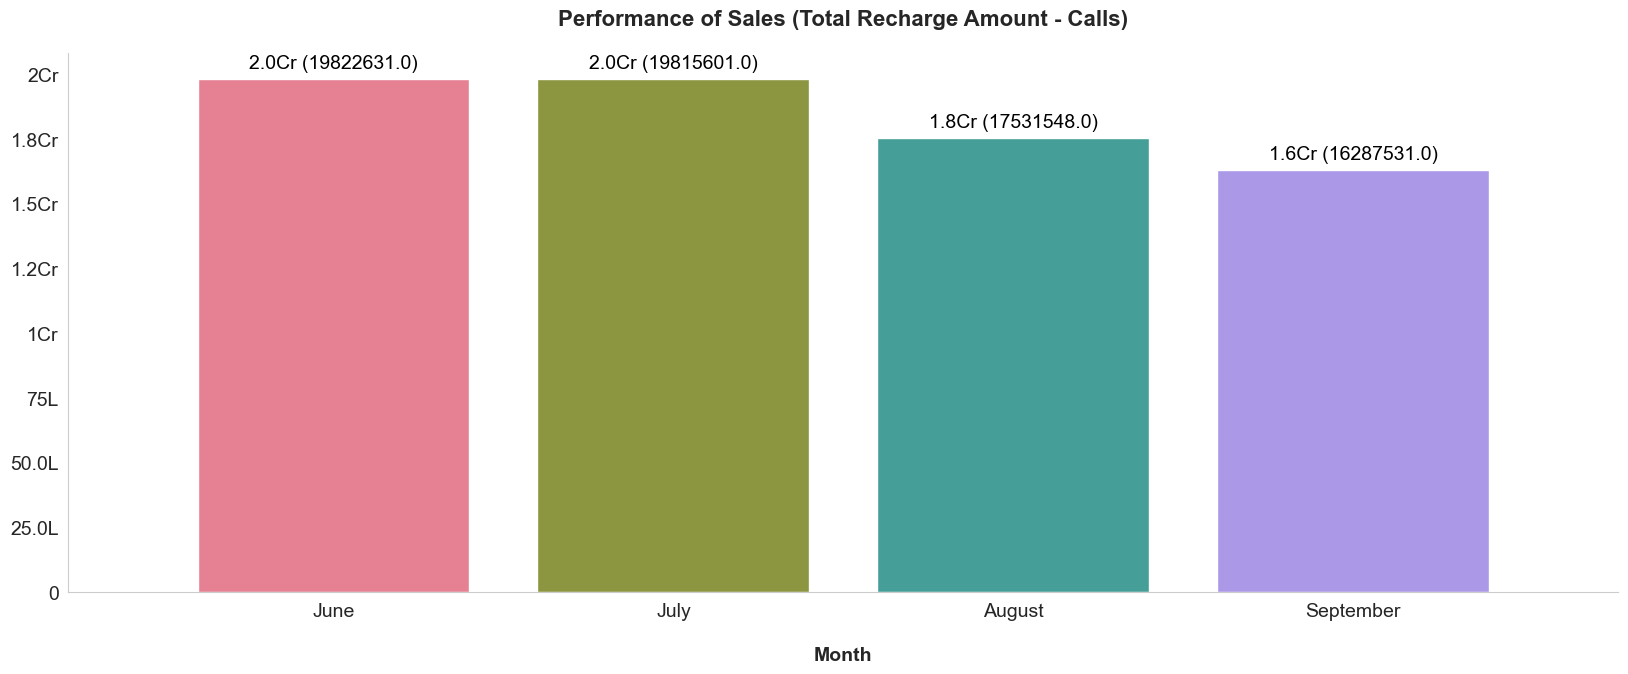

In [100]:
# Performance of Total Recharge Amount for calls across months
create_bar_plot(data_sale_rech.loc[(data_sale_rech['Category'] == 'Total Recharge Amount') & (data_sale_rech['Type_1'] == 'Calls')], 'Sales', 'Total Recharge Amount - Calls')

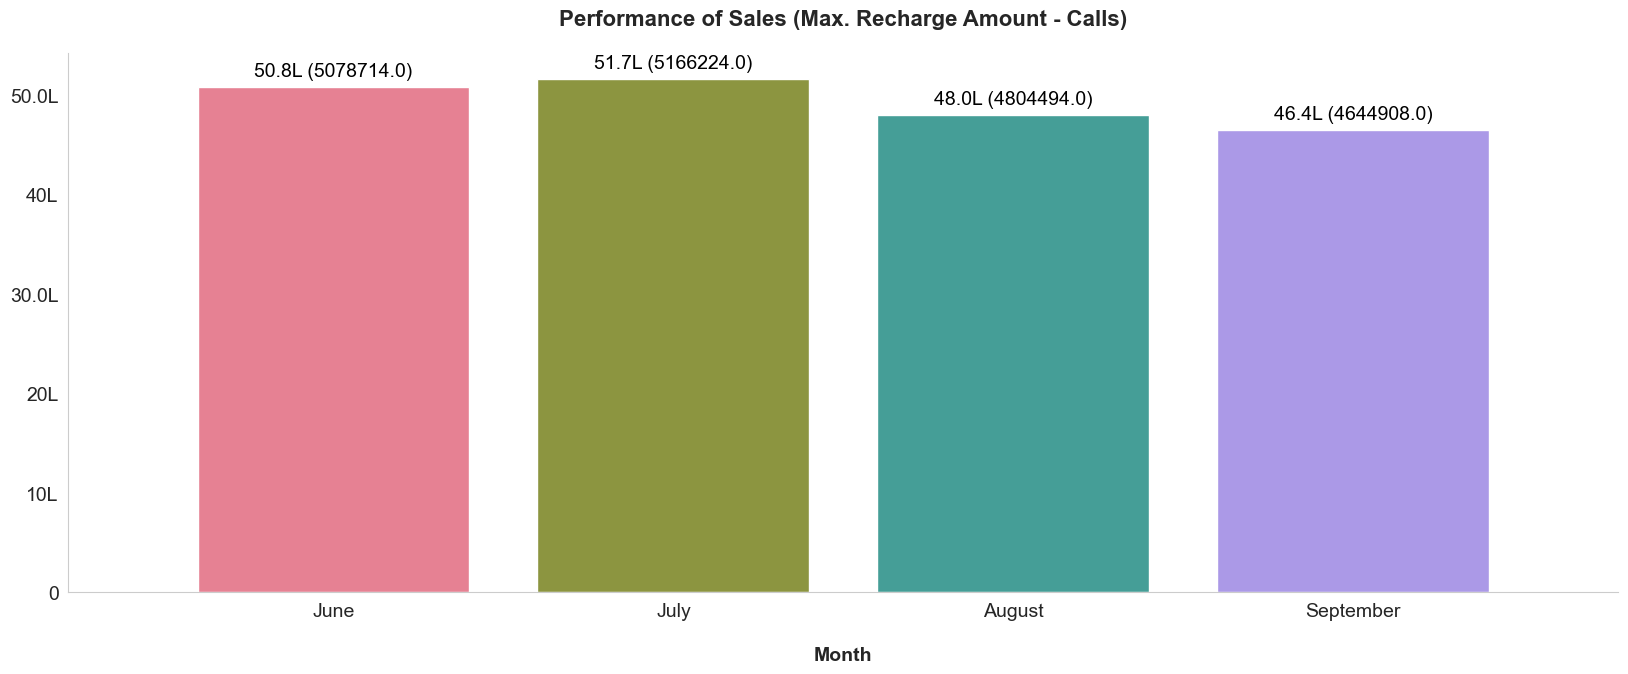

In [101]:
# Performance of Max. Recharge Amount for calls across months
create_bar_plot(data_sale_rech.loc[(data_sale_rech['Category'] == 'Max. Recharge Amount') & (data_sale_rech['Type_1'] == 'Calls')], 'Sales', 'Max. Recharge Amount - Calls')

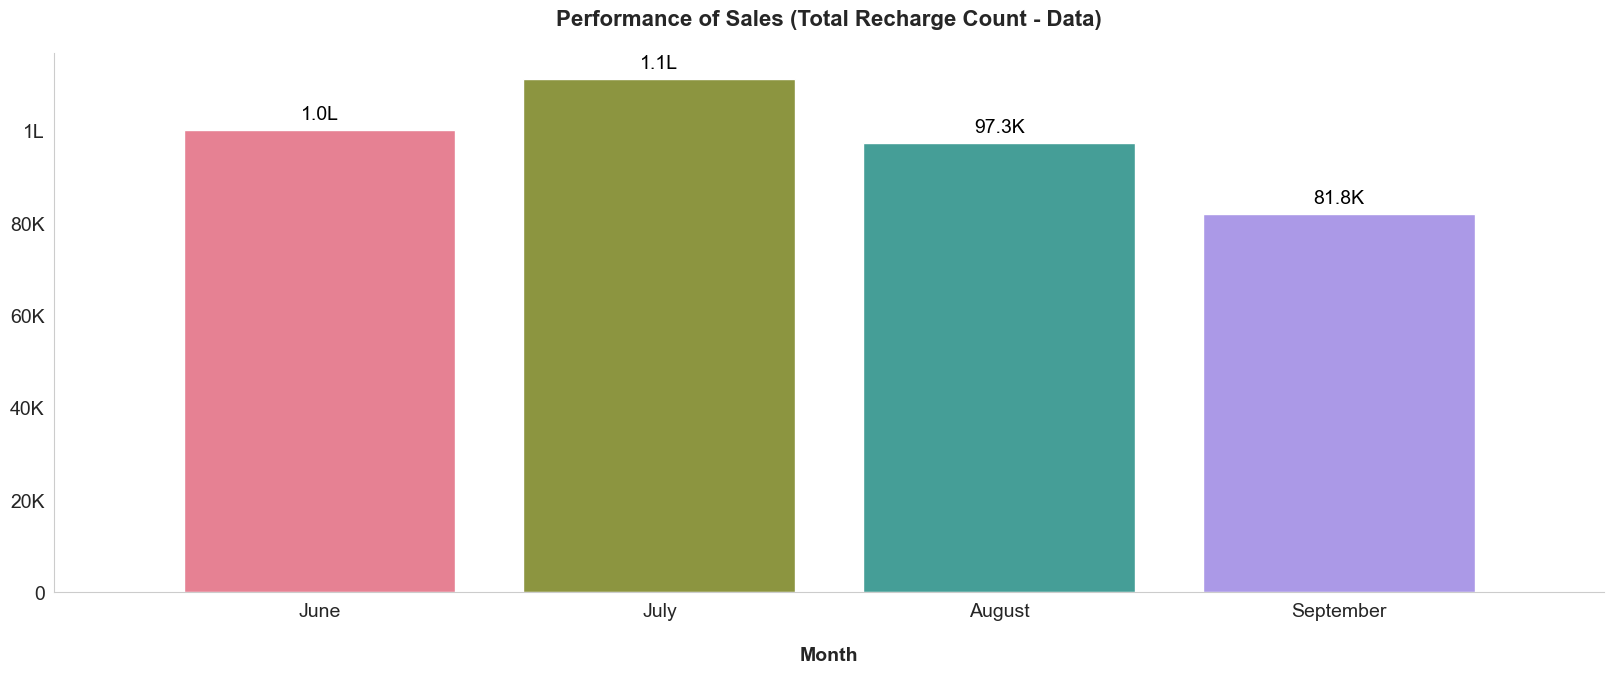

In [102]:
# Performance of Total Recharge count for data across months
create_bar_plot(data_sale_rech.loc[(data_sale_rech['Category'] == 'Total Recharge Count') & (data_sale_rech['Type_1'] == 'Data')], 'Sales', 'Total Recharge Count - Data')

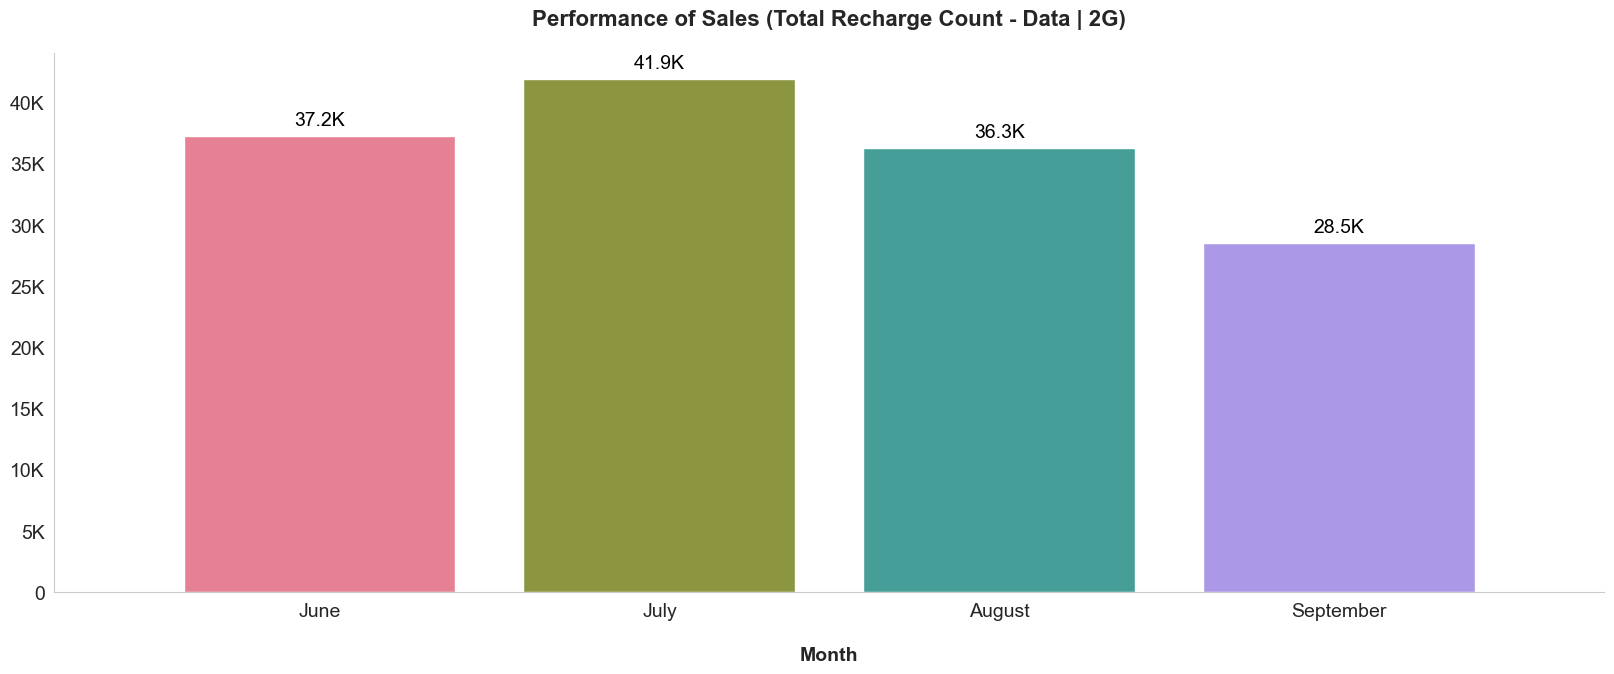

In [103]:
# Performance of Total Recharge count for data across months for 2G
create_bar_plot(data_sale_rech.loc[(data_sale_rech['Category'] == 'Total Recharge Count') & (data_sale_rech['Type_1'] == 'Data') & (data_sale_rech['Type_2'] == '2G')], 'Sales', 'Total Recharge Count - Data | 2G')

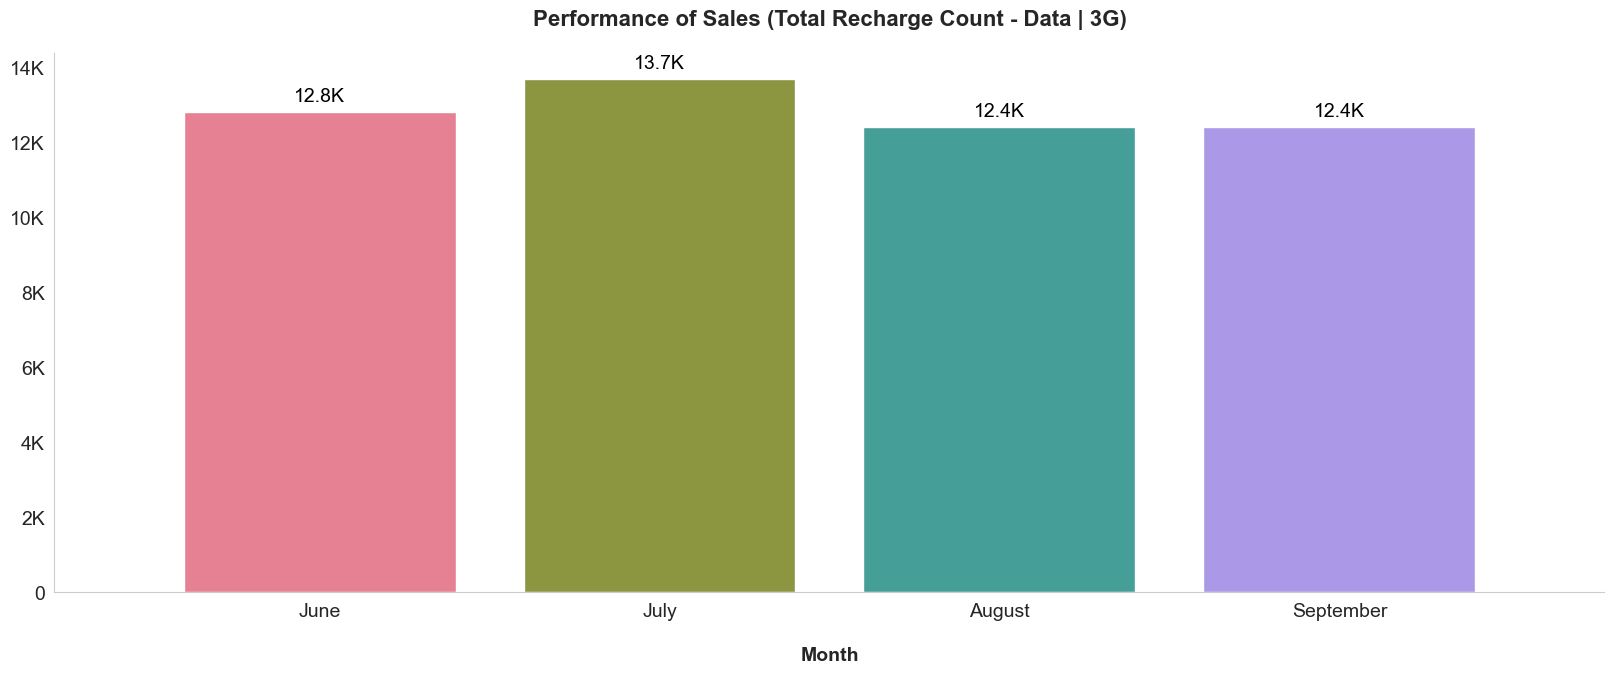

In [104]:
# Performance of Total Recharge count for data across months for 3G
create_bar_plot(data_sale_rech.loc[(data_sale_rech['Category'] == 'Total Recharge Count') & (data_sale_rech['Type_1'] == 'Data') & (data_sale_rech['Type_2'] == '3G')], 'Sales', 'Total Recharge Count - Data | 3G')

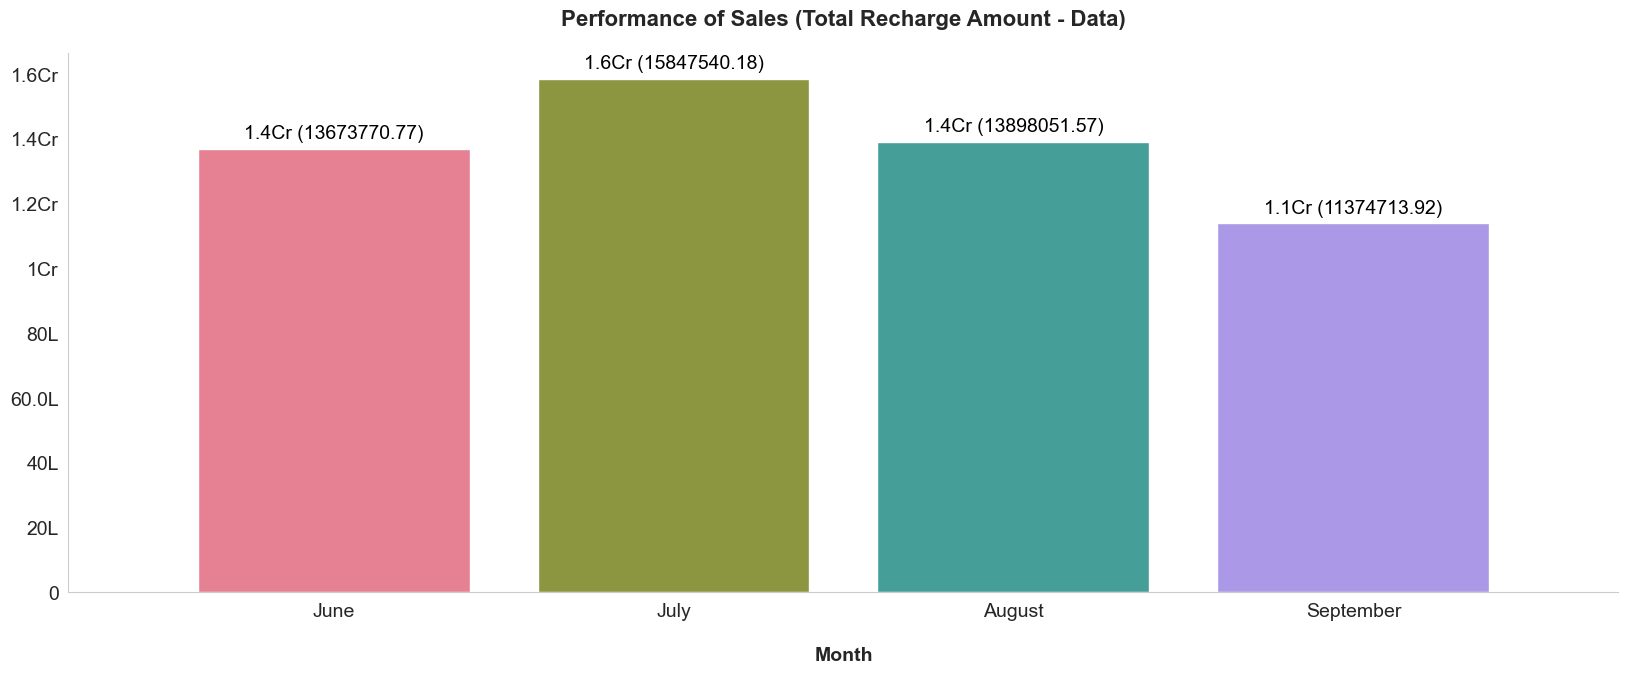

In [105]:
# Performance of Total Recharge Amount for data across months
create_bar_plot(data_sale_rech.loc[(data_sale_rech['Category'] == 'Total Recharge Amount') & (data_sale_rech['Type_1'] == 'Data')], 'Sales', 'Total Recharge Amount - Data')

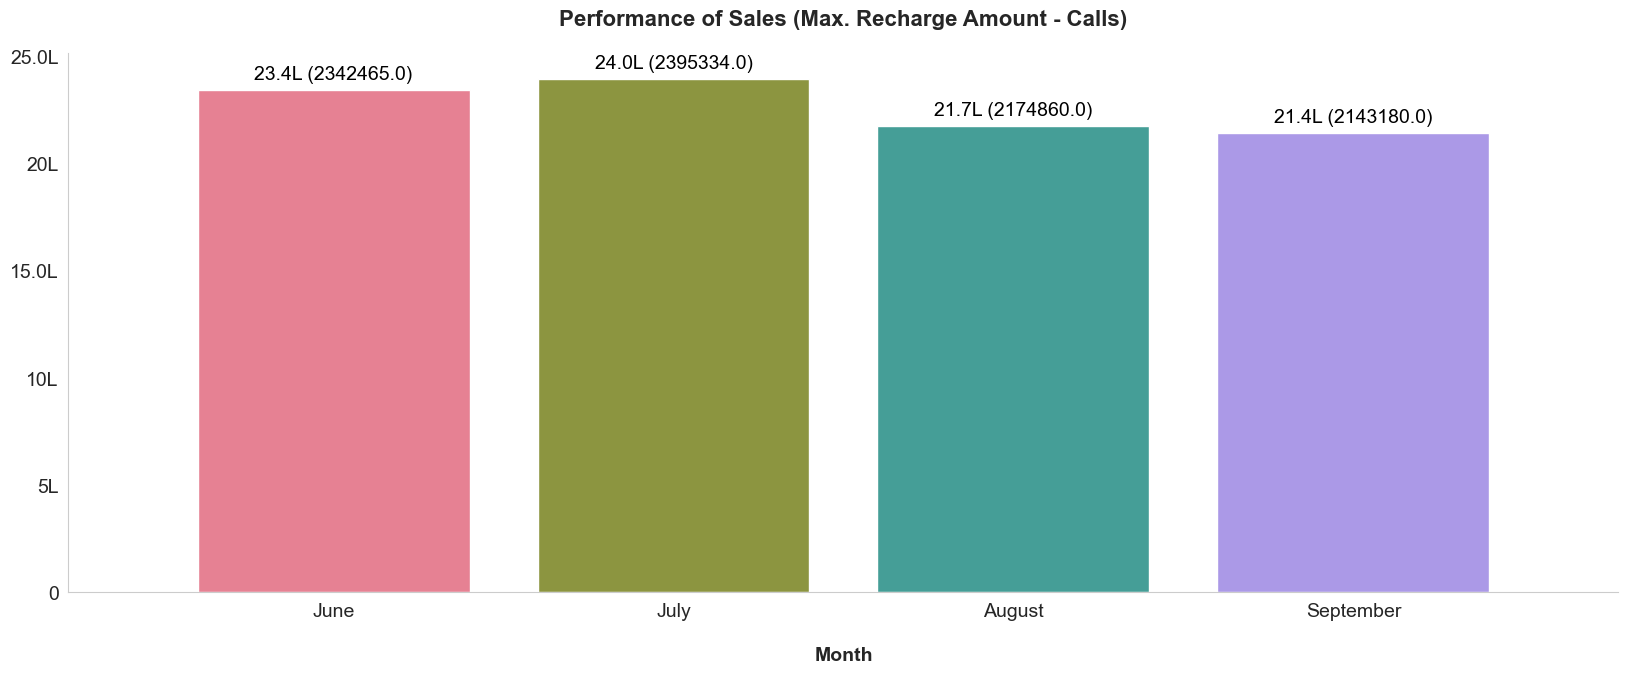

In [106]:
# Performance of Max. Recharge Amount for data across months
create_bar_plot(data_sale_rech.loc[(data_sale_rech['Category'] == 'Max. Recharge Amount') & (data_sale_rech['Type_1'] == 'Data')], 'Sales', 'Max. Recharge Amount - Calls')

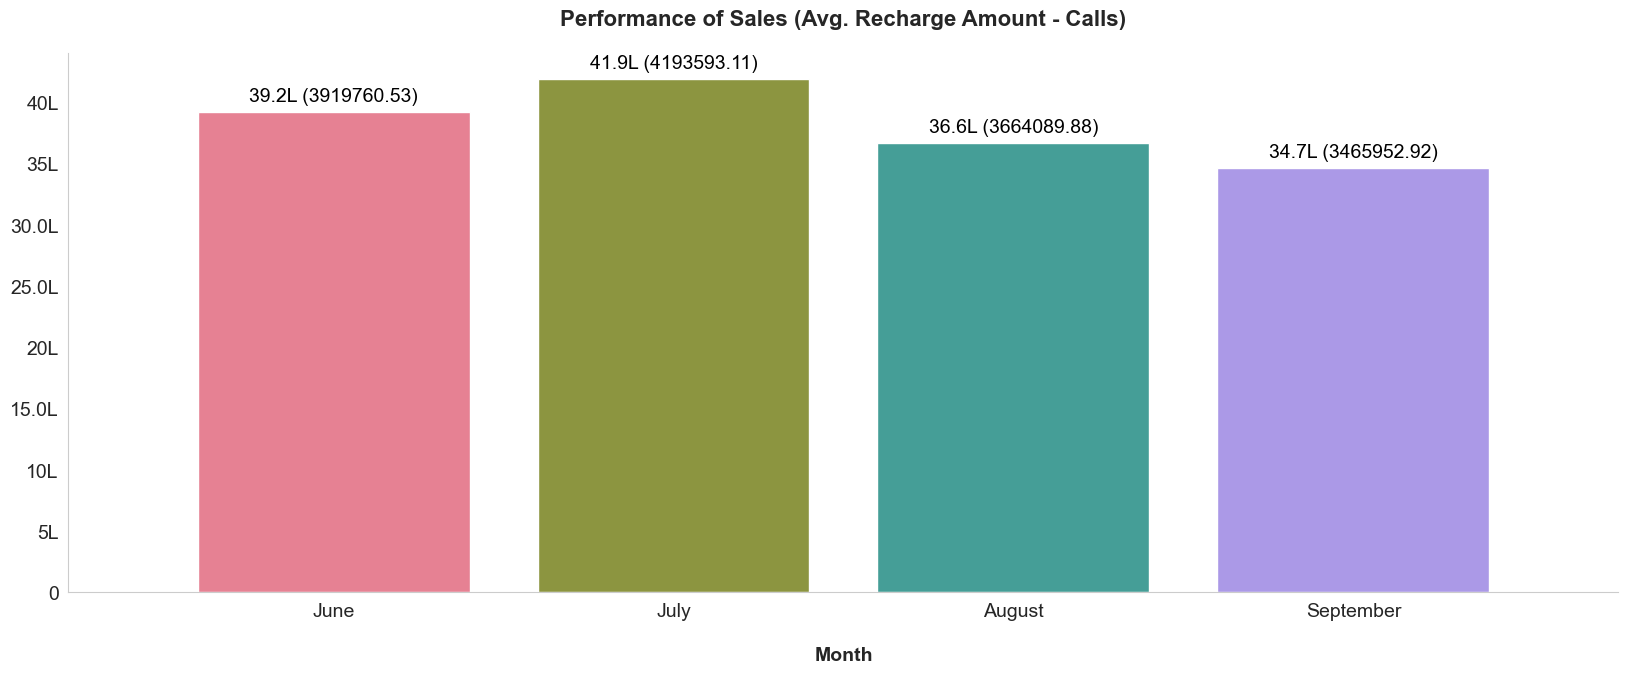

In [107]:
# Performance of Avg. Recharge Amount for data across months
create_bar_plot(data_sale_rech.loc[(data_sale_rech['Category'] == 'Average Recharge Amount') & (data_sale_rech['Type_1'] == 'Data')], 'Sales', 'Avg. Recharge Amount - Calls')

`Since, Avg. recharge amount for data was engineered, yet shows a similar pattern with other columns - hence, to reduce multi-collinearity and dimensions, we will drop it.`

In [108]:
# Drop columns that start with 'av_rech_amt_data' from the DataFrame
data.drop(columns=data.columns[data.columns.str.startswith('av_rech_amt_data')], inplace=True)

In [109]:
# Checking non-rech columns
non_rech_columns = data.columns[data.columns.str.contains('monthly_|sachet_|night_pck_user')]
non_rech_columns

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9'],
      dtype='object')

In [110]:
# Plot for binary columns - night_pck_user
data_sale_night_pck = data[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8','night_pck_user_9']].melt(var_name='Month', value_name='Subscribers')

In [111]:
# Extract the last character from each 'Month' value and assign it to a new column
data_sale_night_pck['Month'] = data_sale_night_pck['Month'].str[-1]

In [112]:
# Map 'Month' values to a predefined dictionary and assign it back to the DataFrame
data_sale_night_pck['Month'] = data_sale_night_pck['Month'].map(month_map)

In [113]:
# Display the first 5 rows of the DataFrame
data_sale_night_pck.head()

Month  Subscribers
0  June          0.0
1  June          0.0
2  June          0.0
3  June          0.0
4  June          0.0

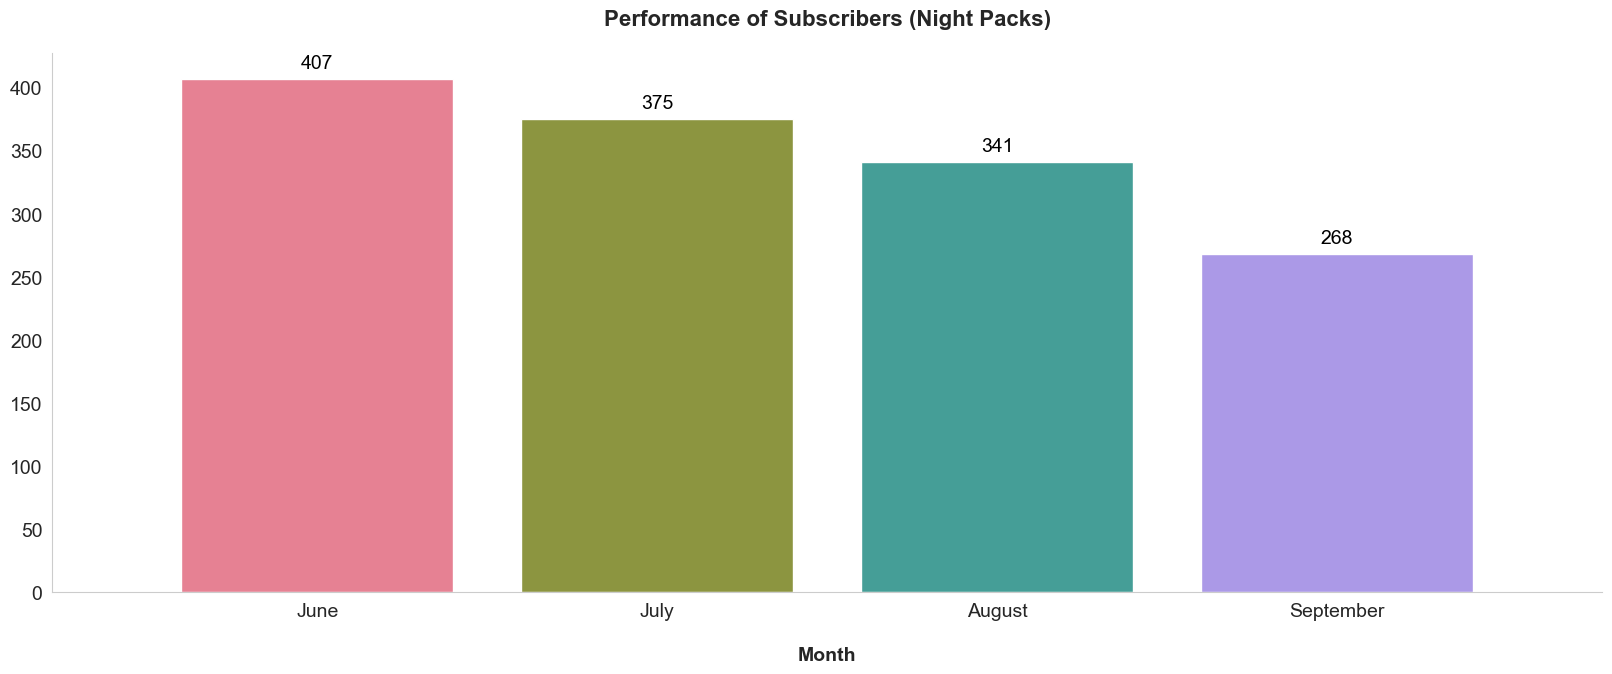

In [114]:
# Create the bar plot with the specified DataFrame and axis names
create_bar_plot(data_sale_night_pck, 'Subscribers', 'Night Packs')

In [115]:
# Melt the DataFrame to create a new one with one column for all months
data_sale_2G_monthly = data[['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
                             'monthly_2g_9']].melt(var_name='Month', value_name='Subscribers')

In [116]:
# Extract the last character from each 'Month' value and assign it to a new column
data_sale_2G_monthly['Month'] = data_sale_2G_monthly['Month'].str[-1]

In [117]:
# Map 'Month' values to a predefined dictionary and assign it back to the DataFrame
data_sale_2G_monthly['Month'] = data_sale_2G_monthly['Month'].map(month_map)

In [118]:
# Display the top 5 rows of dataframe
data_sale_2G_monthly.head()

Month  Subscribers
0  June            0
1  June            0
2  June            0
3  June            0
4  June            0

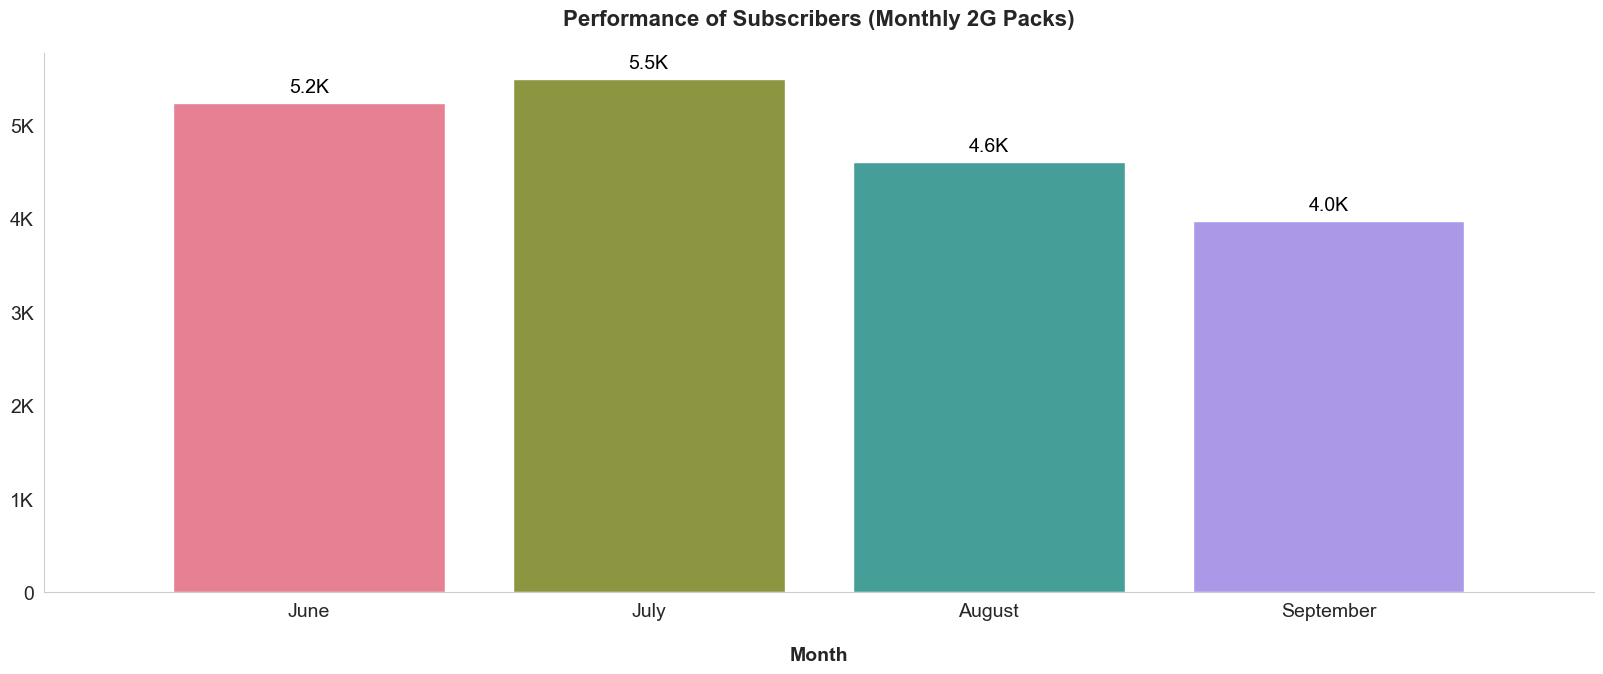

In [119]:
create_bar_plot(data_sale_2G_monthly, 'Subscribers', 'Monthly 2G Packs')

In [120]:
# Melt the DataFrame to create a new one with one column for all months
data_sale_2G_sachet = data[['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
                            'sachet_2g_9']].melt(var_name='Month', value_name='Subscribers')

In [121]:
# Extract the last character from each 'Month' value and assign it to a new column
data_sale_2G_sachet['Month'] = data_sale_2G_sachet['Month'].str[-1]

In [122]:
# Map 'Month' values to a predefined dictionary and assign it back to the DataFrame
data_sale_2G_sachet['Month'] = data_sale_2G_sachet['Month'].map(month_map)

In [123]:
# Display the first 5 rows of the DataFrame
data_sale_2G_sachet.head()

Month  Subscribers
0  June            0
1  June            0
2  June            0
3  June            0
4  June            0

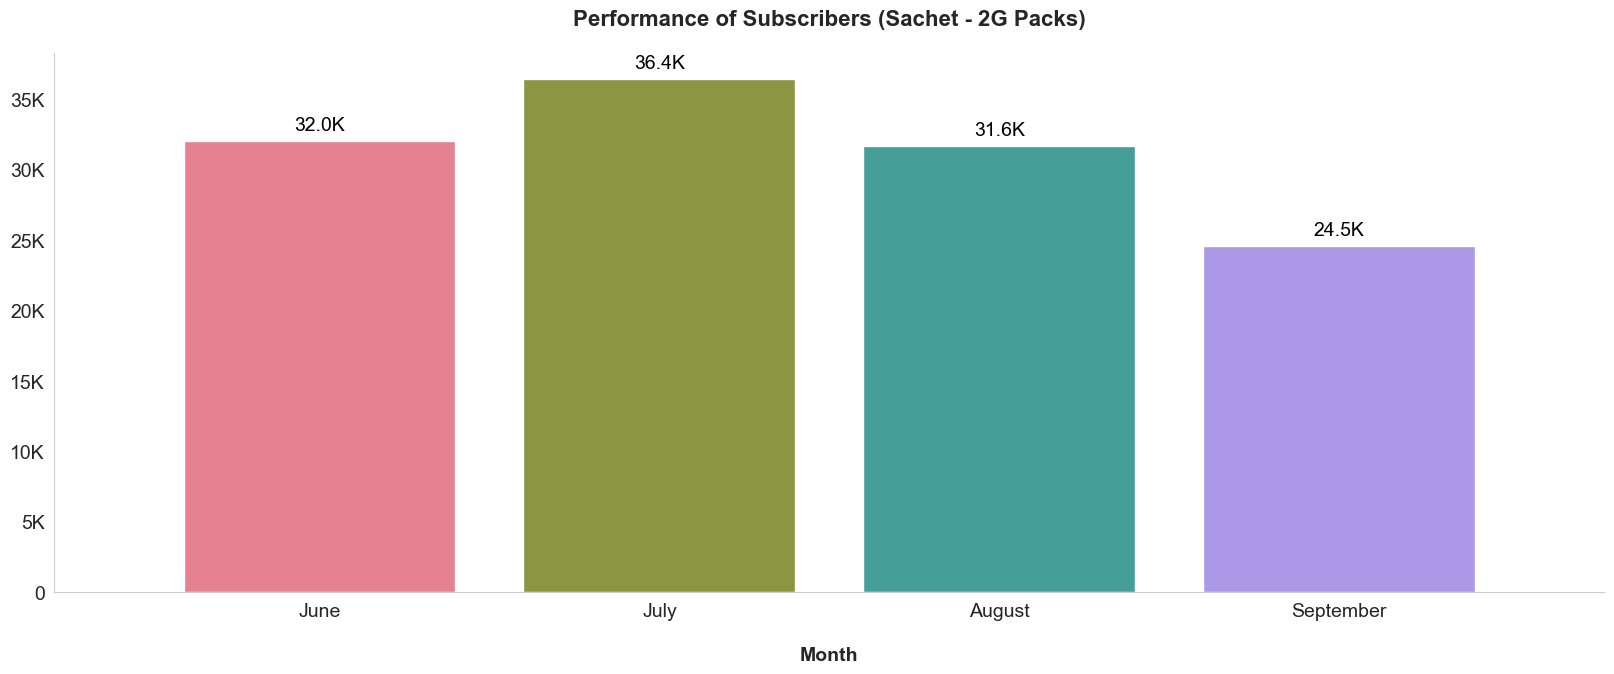

In [124]:
# Create the bar plot with the specified DataFrame and axis labels
create_bar_plot(data_sale_2G_sachet, 'Subscribers', 'Sachet - 2G Packs')

In [125]:
# Melt the DataFrame to create a new one with one column for all months
data_sale_3G_monthly = data[['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9']].melt(var_name='Month', value_name='Subscribers')

In [126]:
# Extract the last character from each 'Month' value and assign it to a new column
data_sale_3G_monthly['Month'] = data_sale_3G_monthly['Month'].str[-1]

In [127]:
# Map 'Month' values to a predefined dictionary and assign it back to the DataFrame
data_sale_3G_monthly['Month'] = data_sale_3G_monthly['Month'].map(month_map)

In [128]:
# Display the first 5 rows of the DataFrame
data_sale_3G_monthly.head()

Month  Subscribers
0  June            1
1  June            0
2  June            0
3  June            0
4  June            0

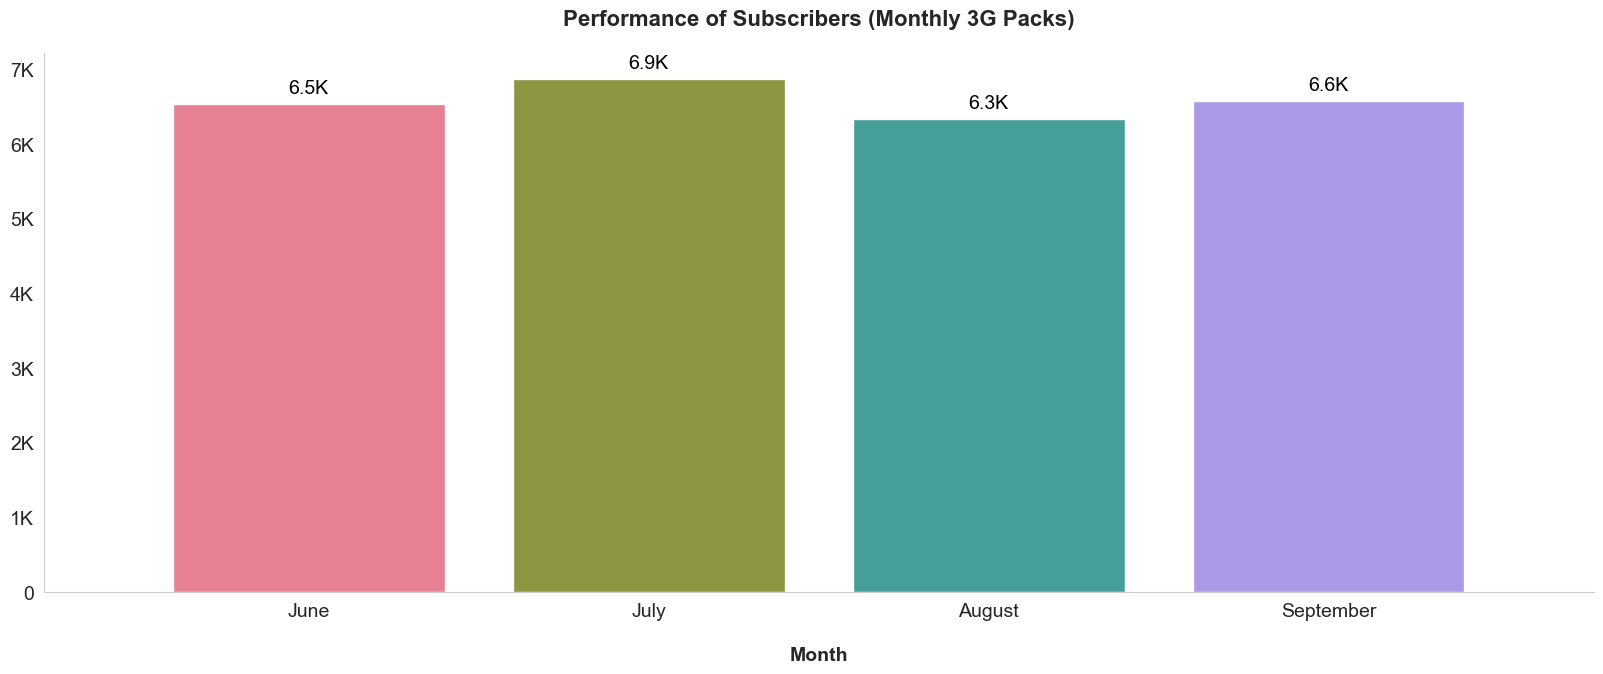

In [129]:
# Create the bar plot with the specified DataFrame and axis labels
create_bar_plot(data_sale_3G_monthly, 'Subscribers', 'Monthly 3G Packs')

In [130]:
# Melt the DataFrame to create a new one with one column for all months
data_sale_3G_sachet = data[['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
                            'sachet_3g_9']].melt(var_name='Month', value_name='Subscribers')

In [131]:
# Extract the last character from each 'Month' value and assign it to a new column
data_sale_3G_sachet['Month'] = data_sale_3G_sachet['Month'].str[-1]

In [132]:
# Map 'Month' values to a predefined dictionary and assign it back to the DataFrame
data_sale_3G_sachet['Month'] = data_sale_3G_sachet['Month'].map(month_map)

In [133]:
# Display the first 5 rows of the DataFrame
data_sale_3G_sachet.head()

Month  Subscribers
0  June            0
1  June            0
2  June            0
3  June            0
4  June            0

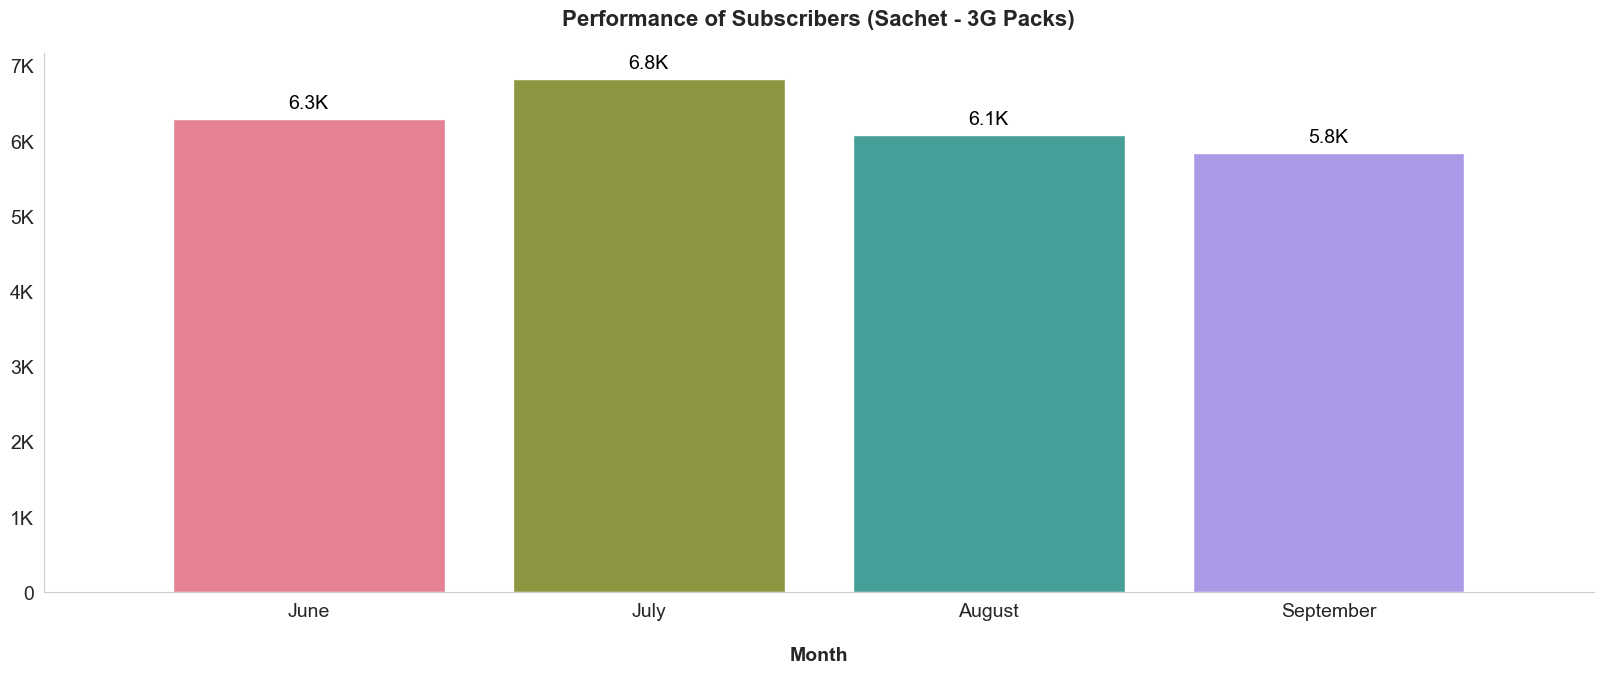

In [134]:
# Create the bar plot with the specified DataFrame and axis labels
create_bar_plot(data_sale_3G_sachet, 'Subscribers', 'Sachet - 3G Packs')

**Remarks:**
- Herein, we notice again, a co-relation between subsequent months in terms of total and max recharge amount and count.
- There exists multi-collinearity between columns. We will let PCA handle it.
- The data is skewed to the left. The distribution is not normally distribution for max recharge amounts.
- The recharge for calls has been in decline since June.
- However, for Data there's a slight spike in July and have been declining since. The count of 2G packs bought (monthly & sachet) have been declining.
- With that said, count of monthly 3G packs bought over the months aren't declining as such. Even sachet packs have only shown a marginal decline over the months for 3G packs.
- The night pack subscribers are also in decline.
- Every column has outliers. Since, all columns have an outlier we will prefer models that isn't sensitive to Outliers like Decision tress.

#### Services Columns

In [135]:
# Define a tuple of keywords to check
keywords_to_check = ('std', 'isd', 'mou', 'ic_', '_mb', 'fb_user')

In [136]:
# Use list comprehension to create a list of columns that contain any of the specified keywords
services_columns = [col for key in keywords_to_check for col in data.columns if key in col]
services_columns

['std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2f_mou_9',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'std_ic_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_ic_mou_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 '

In [137]:
# Filter data to include only columns containing specific keywords
data_services = data[services_columns]

In [138]:
# Melt the DataFrame to create separate rows for each month and metric
data_services = data_services.melt(var_name='Month', value_name='Usage')

In [139]:
# Initialize a 'Service' column with default values of None
data_services['Service'] = None

In [140]:
# Define 'Service' based on specific months (e.g., 'Calls' for 'mou' or 'others')
data_services.loc[
    data_services['Month'].str.contains('mou|others'),
    'Service'
] = 'Calls'

In [141]:
# Fill missing values in the 'Service' column with default value of 'Data'
data_services['Service'] = data_services['Service'].fillna('Data')

In [142]:
# Initialize a 'Metric' column with default values of None
data_services['Metric'] = None

In [143]:
# Define 'Metric' based on specific months (e.g., 'Minutes of Usage' for 'mou', etc.)
data_services.loc[
    data_services['Month'].str.contains('mou'),
    'Metric'
] = 'Minutes of Usage'

In [144]:
data_services.loc[
    data_services['Month'].str.contains('others'),
    'Metric'
] = 'Count of Calls'

In [145]:
data_services.loc[
    data_services['Month'].str.contains('_mb_'),
    'Metric'
] = 'MB of Data used'

In [146]:
# Initialize a 'Flow' column with default values of None
data_services['Flow'] = None

In [147]:
# Define 'Flow' based on specific months (e.g., 'Incoming' for 'ic_', etc.)
data_services.loc[data_services['Month'].str.contains('ic_'), 'Flow'] = 'Incoming'

In [148]:
data_services.loc[data_services['Month'].str.contains('og_'), 'Flow'] = 'Outgoing'

In [149]:
# Display the first 5 rows of the transformed DataFrame
data_services.head()

Month   Usage Service            Metric      Flow
0  std_og_t2t_mou_6    0.00   Calls  Minutes of Usage  Outgoing
1  std_og_t2t_mou_6    4.30   Calls  Minutes of Usage  Outgoing
2  std_og_t2t_mou_6  116.56   Calls  Minutes of Usage  Outgoing
3  std_og_t2t_mou_6   97.93   Calls  Minutes of Usage  Outgoing
4  std_og_t2t_mou_6    0.00   Calls  Minutes of Usage  Outgoing

In [150]:
# Checking Total MOU usage
# Filter data to include only rows with 'total' in the Month column
data_services_total_mou = data_services.loc[data_services['Month'].str.contains('total')]

In [151]:
# Create a copy of the filtered DataFrame
data_services_total_mou = data_services_total_mou.copy()

In [152]:
# Extract the last character from each month string and assign it to a new 'Month' column
data_services_total_mou['Month'] = data_services_total_mou['Month'].str[-1]

In [153]:
# Map the last character values to their corresponding month names using the month_map dictionary
data_services_total_mou['Month'] = data_services_total_mou['Month'].map(month_map)

In [154]:
# Display the first 5 rows of the transformed DataFrame
data_services_total_mou.head()

Month   Usage Service            Metric      Flow
3000100  June    0.00   Calls  Minutes of Usage  Outgoing
3000101  June  487.53   Calls  Minutes of Usage  Outgoing
3000102  June  508.36   Calls  Minutes of Usage  Outgoing
3000103  June  860.34   Calls  Minutes of Usage  Outgoing
3000104  June  134.38   Calls  Minutes of Usage  Outgoing

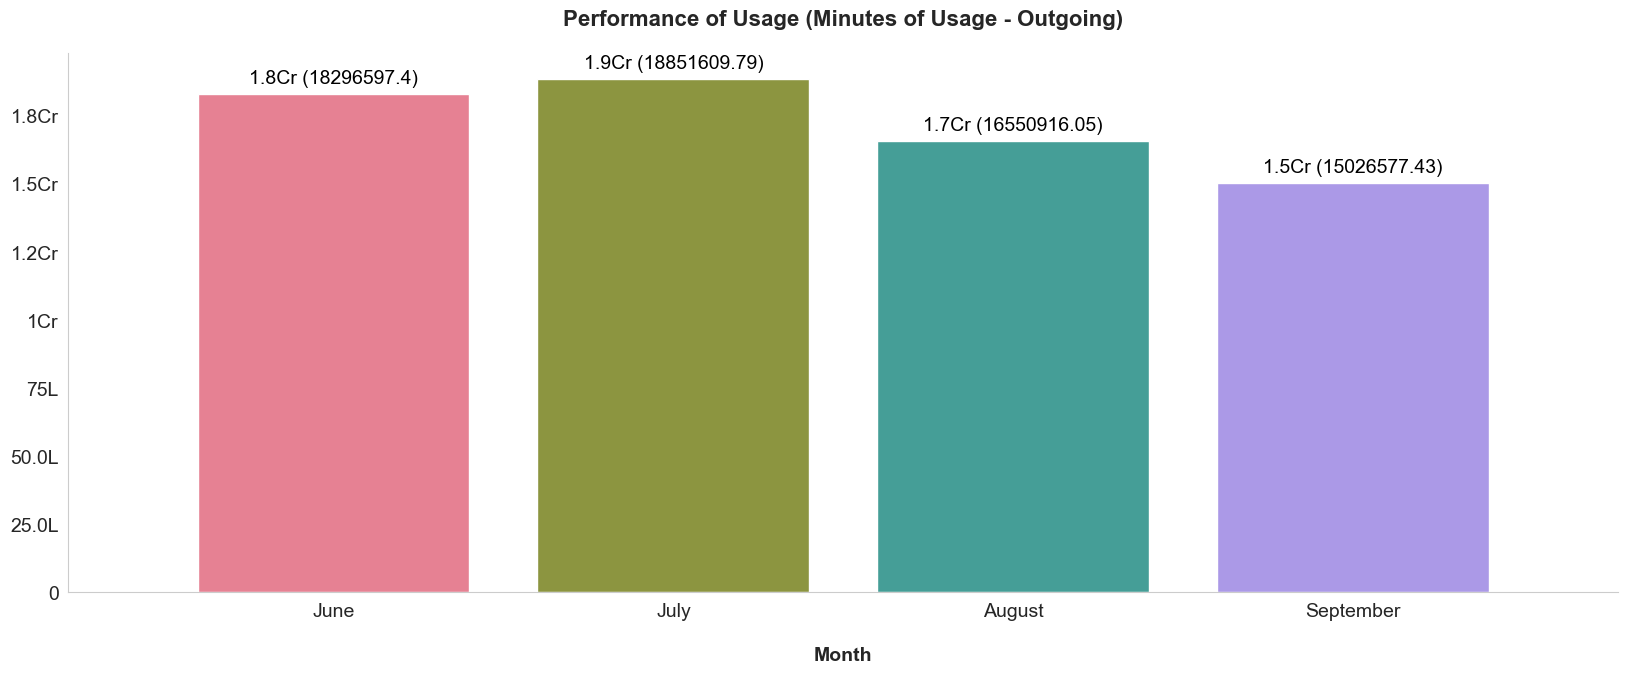

In [155]:
# Create a bar plot for outgoing minutes of usage
create_bar_plot(data_services_total_mou[data_services_total_mou['Flow'] == 'Outgoing'], 'Usage', 'Minutes of Usage - Outgoing')

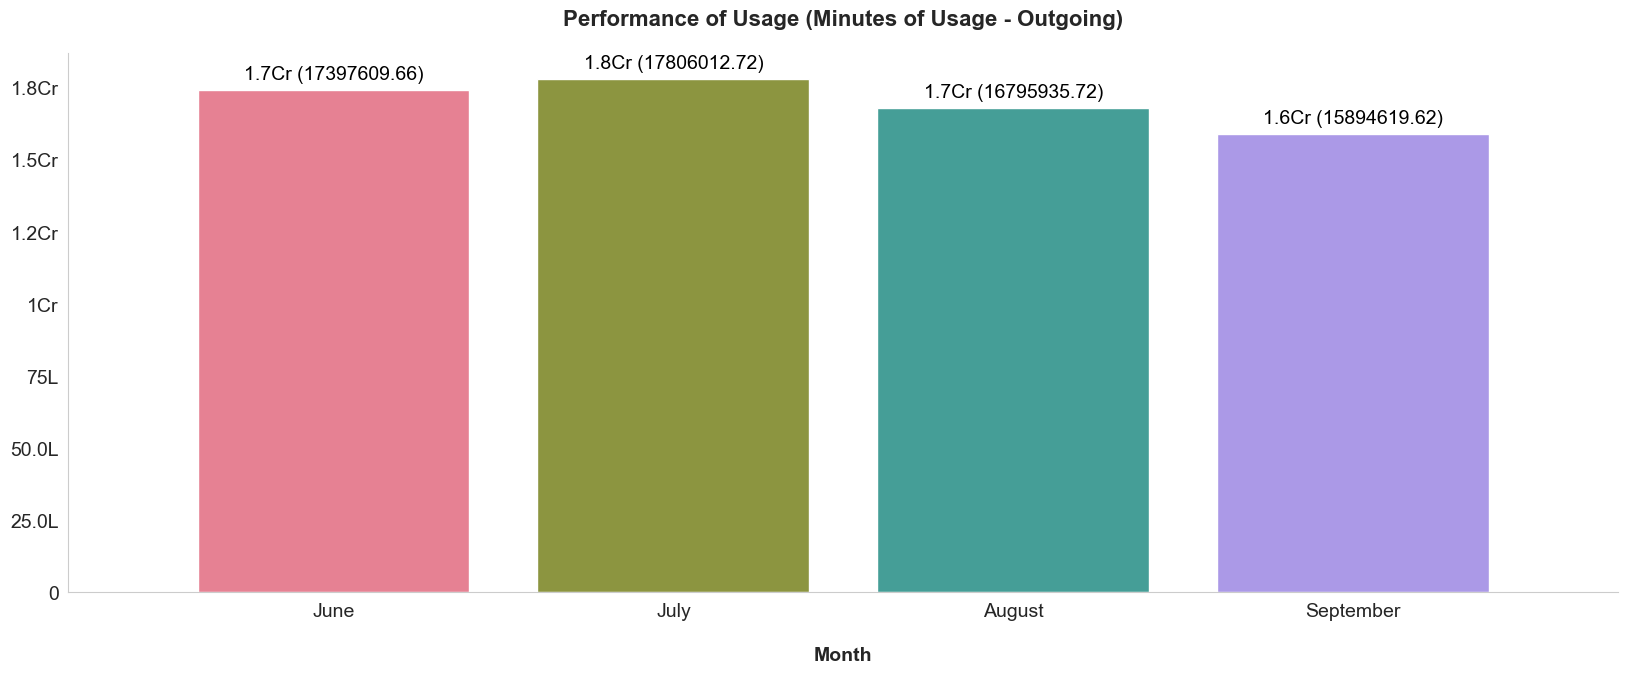

In [156]:
# Create a bar plot for incoming minutes of usage
create_bar_plot(data_services_total_mou[data_services_total_mou['Flow'] == 'Incoming'], 'Usage', 'Minutes of Usage - Outgoing')

In [157]:
# Filter data to include only rows with Service equal to 'Data'
data_services_data_usage = data_services.loc[data_services['Service'] == 'Data']

In [158]:
# Rename the 'Flow' column to 'Type'
data_services_data_usage = data_services_data_usage.rename(columns={'Flow': 'Type'})

In [159]:
# Define the type of service based on specific months (e.g., '2G' for '2g', etc.)
data_services_data_usage['Type'] = data_services_data_usage['Month'].apply(lambda x: '2G' if '2g' in x else '3G')

In [160]:
# Extract the last character from each month string and assign it to a new 'Month' column
data_services_data_usage['Month'] = data_services_data_usage['Month'].str[-1]

In [161]:
# Map the last character values to their corresponding month names using the month_map dictionary
data_services_data_usage['Month'] = data_services_data_usage['Month'].map(month_map)

In [162]:
# Display the first 5 rows of the transformed DataFrame
data_services_data_usage.head()

Month  Usage Service           Metric Type
6000200  June  30.13    Data  MB of Data used   2G
6000201  June   0.00    Data  MB of Data used   2G
6000202  June   0.00    Data  MB of Data used   2G
6000203  June   0.00    Data  MB of Data used   2G
6000204  June   0.00    Data  MB of Data used   2G

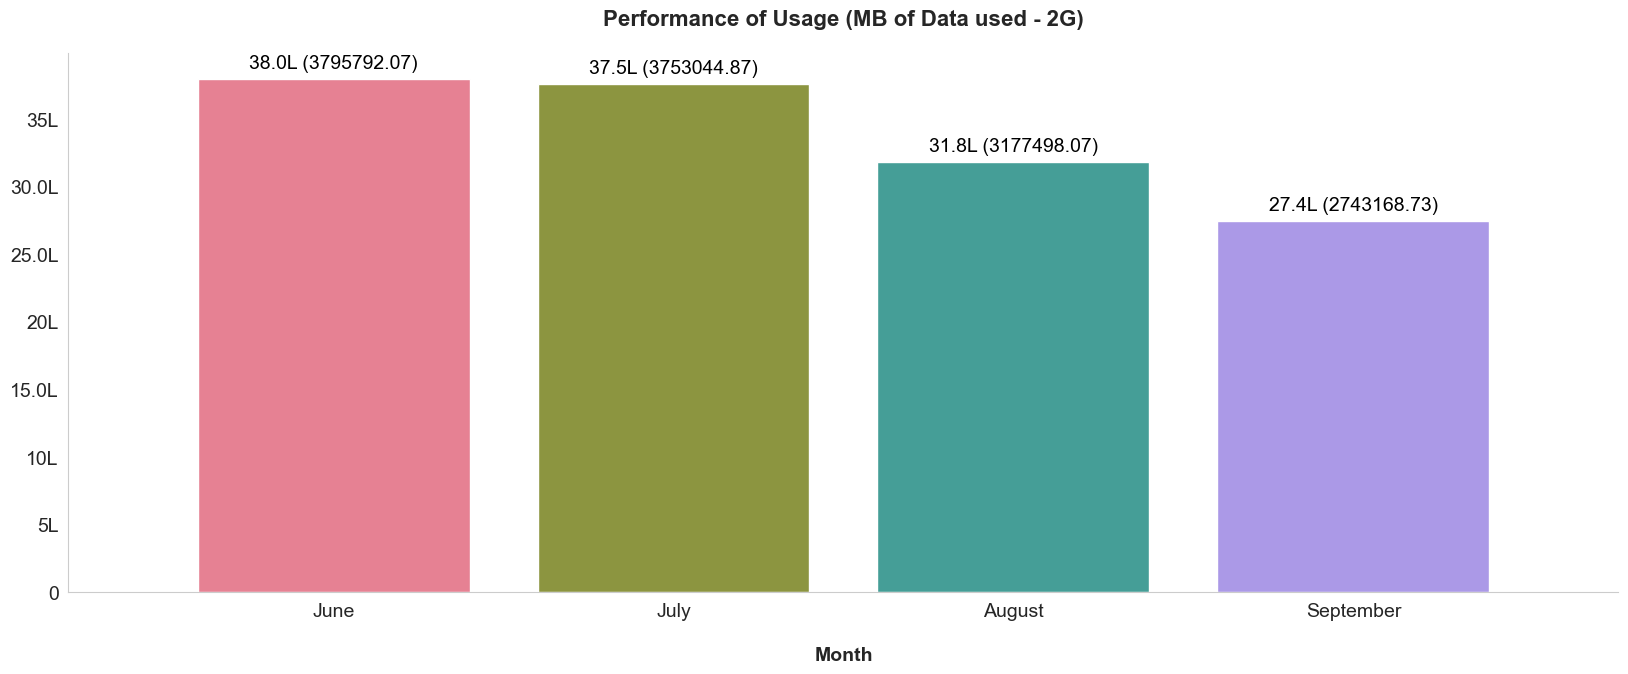

In [163]:
# Create a bar plot for 2G data usage
create_bar_plot(data_services_data_usage[data_services_data_usage['Type'] == '2G'], 'Usage', 'MB of Data used - 2G')

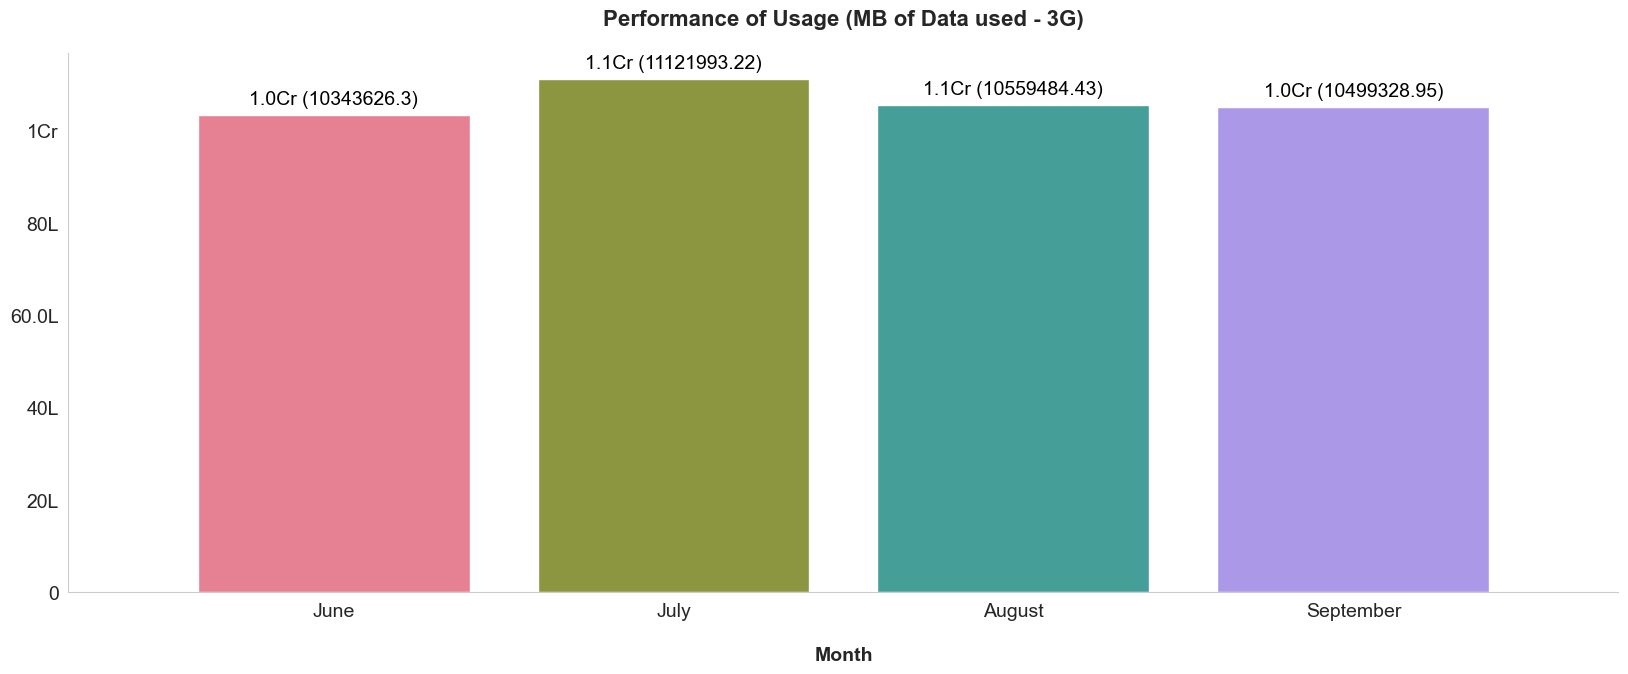

In [164]:
# Create a bar plot for 3G data usage
create_bar_plot(data_services_data_usage[data_services_data_usage['Type'] == '3G'], 'Usage', 'MB of Data used - 3G')

In [165]:
# Filter data to include only rows with Service equal to 'Data' and Month starting with 'fb_user'
data_services_fb_user = data_services.loc[(data_services['Service'] == 'Data') & (data_services['Month'].str.startswith('fb_user')), ['Month', 'Usage']]

In [166]:
# Extract the last character from each month string and assign it to a new 'Month' column
data_services_fb_user['Month'] = data_services_fb_user['Month'].str[-1]

In [167]:
# Map the last character values to their corresponding month names using the month_map dictionary
data_services_fb_user['Month'] = data_services_fb_user['Month'].map(month_map)

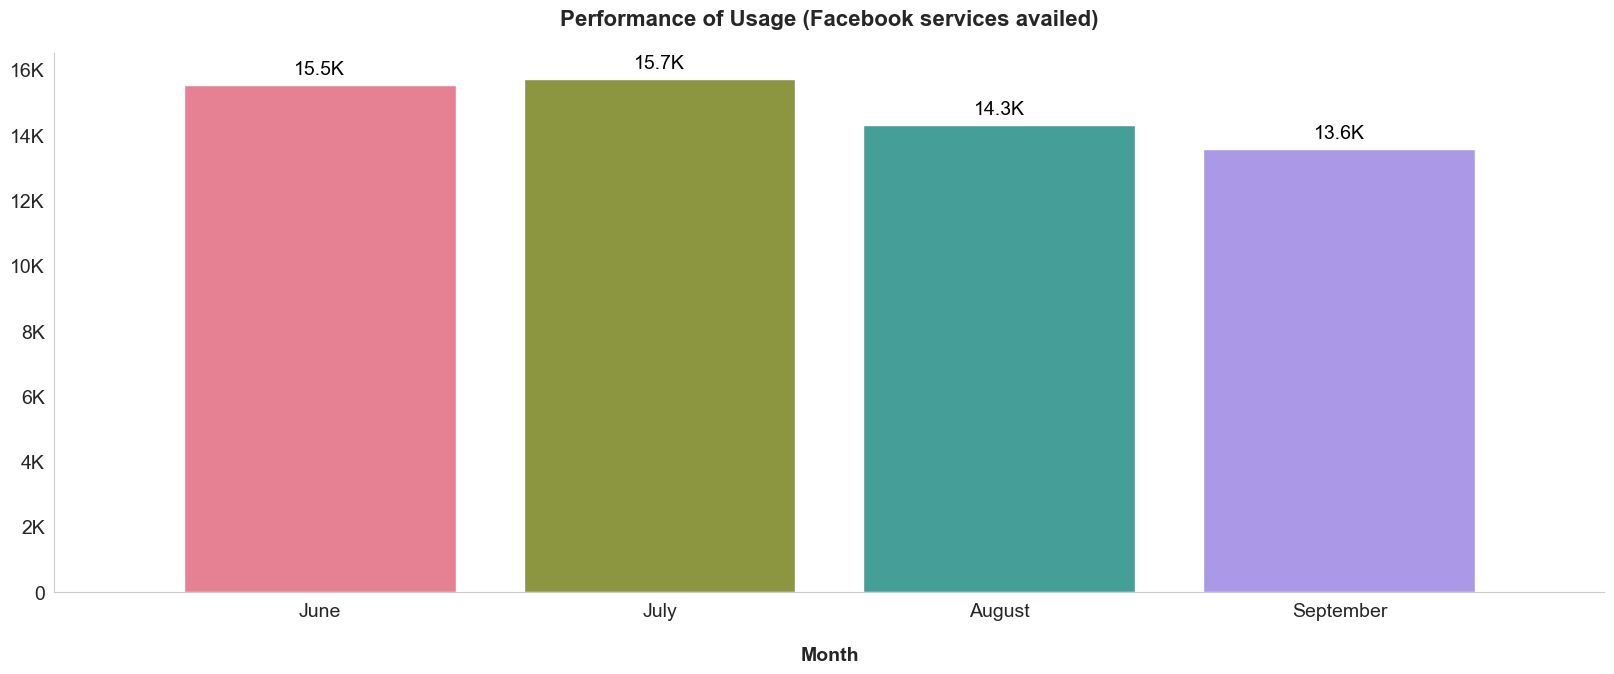

In [168]:
# Create a bar plot for Facebook services availed
create_bar_plot(data_services_fb_user, 'Usage', 'Facebook services availed')

**Remarks:**
- The MOU for both Incoming & Outgoing calls have decreased over the months although there was a very slight jump in July.
- Usage of 2G data have also decreased over the month.
- However, usage of 3G data haven't declined as such. The usage has been flat over the months.
- There's also decline in users who avail the facebook services.

#### Age on Network

In [169]:
# Calculate descriptive statistics for column 'aon'
data['aon'].describe([.25, .5, .75, .8, .85, .95, .99])

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
80%       2204.000000
85%       2491.000000
95%       3140.000000
99%       3651.000000
max       4321.000000
Name: aon, dtype: float64

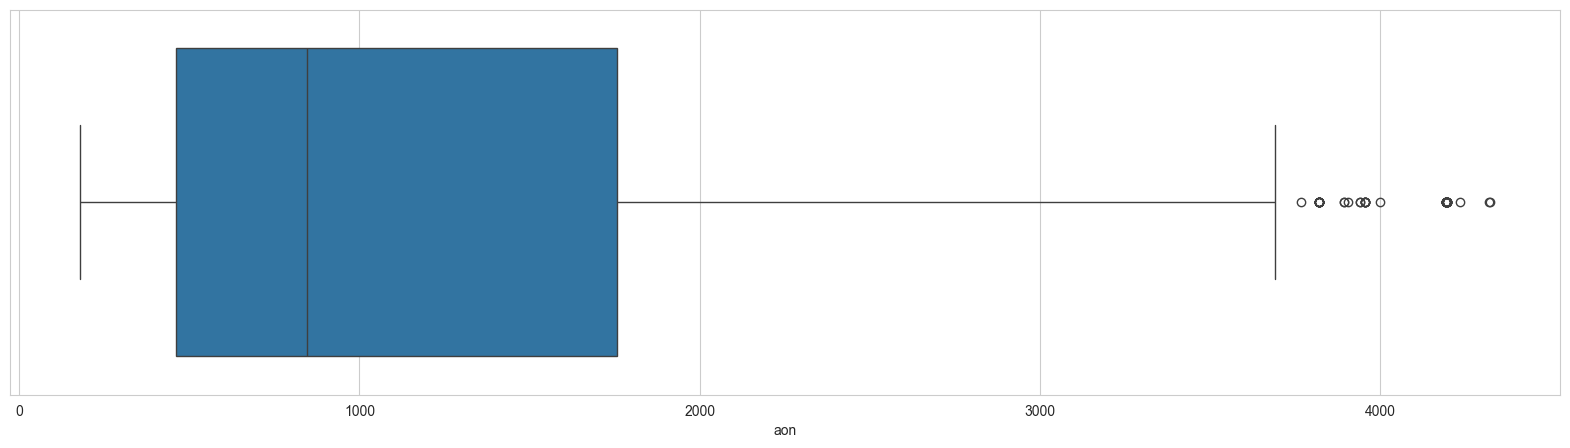

In [170]:
# Create a box plot for column 'aon' with horizontal orientation
plt.figure(figsize=(20, 5))
sns.boxplot(data['aon'], orient='h')
plt.show()

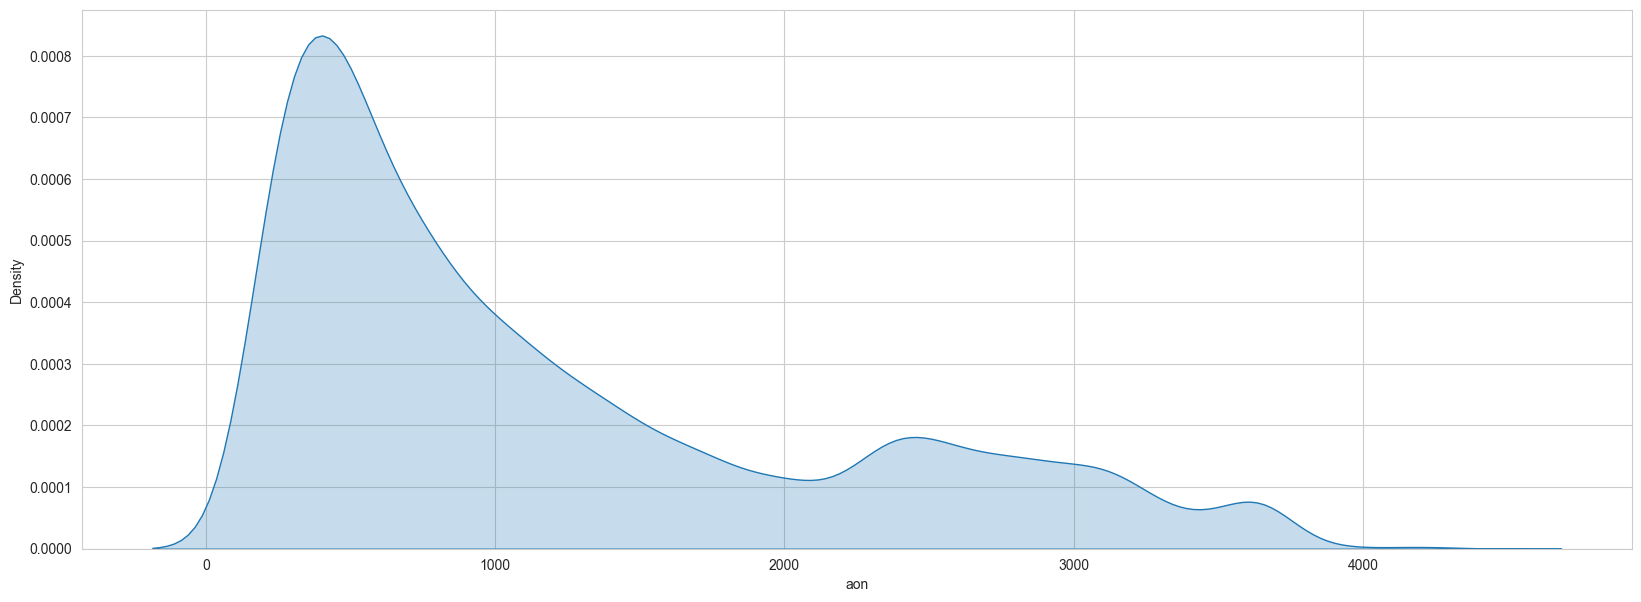

In [171]:
# Create a kernel density estimation (KDE) plot for column 'aon'
plt.figure(figsize=(20, 7))
sns.kdeplot(data['aon'], fill=True)
plt.show()

**Remarks:**
- Above 20% of the users have been a customer of the network for more than 6 Years.
- The shortest lifespan of subscribers is 6 months, and highest of close to 12 Years.
- Average lifespan of customers is of 3 Years.

## Data Preparation

In [172]:
# Columns to be used for tagging of churned accounts
churned_tags = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

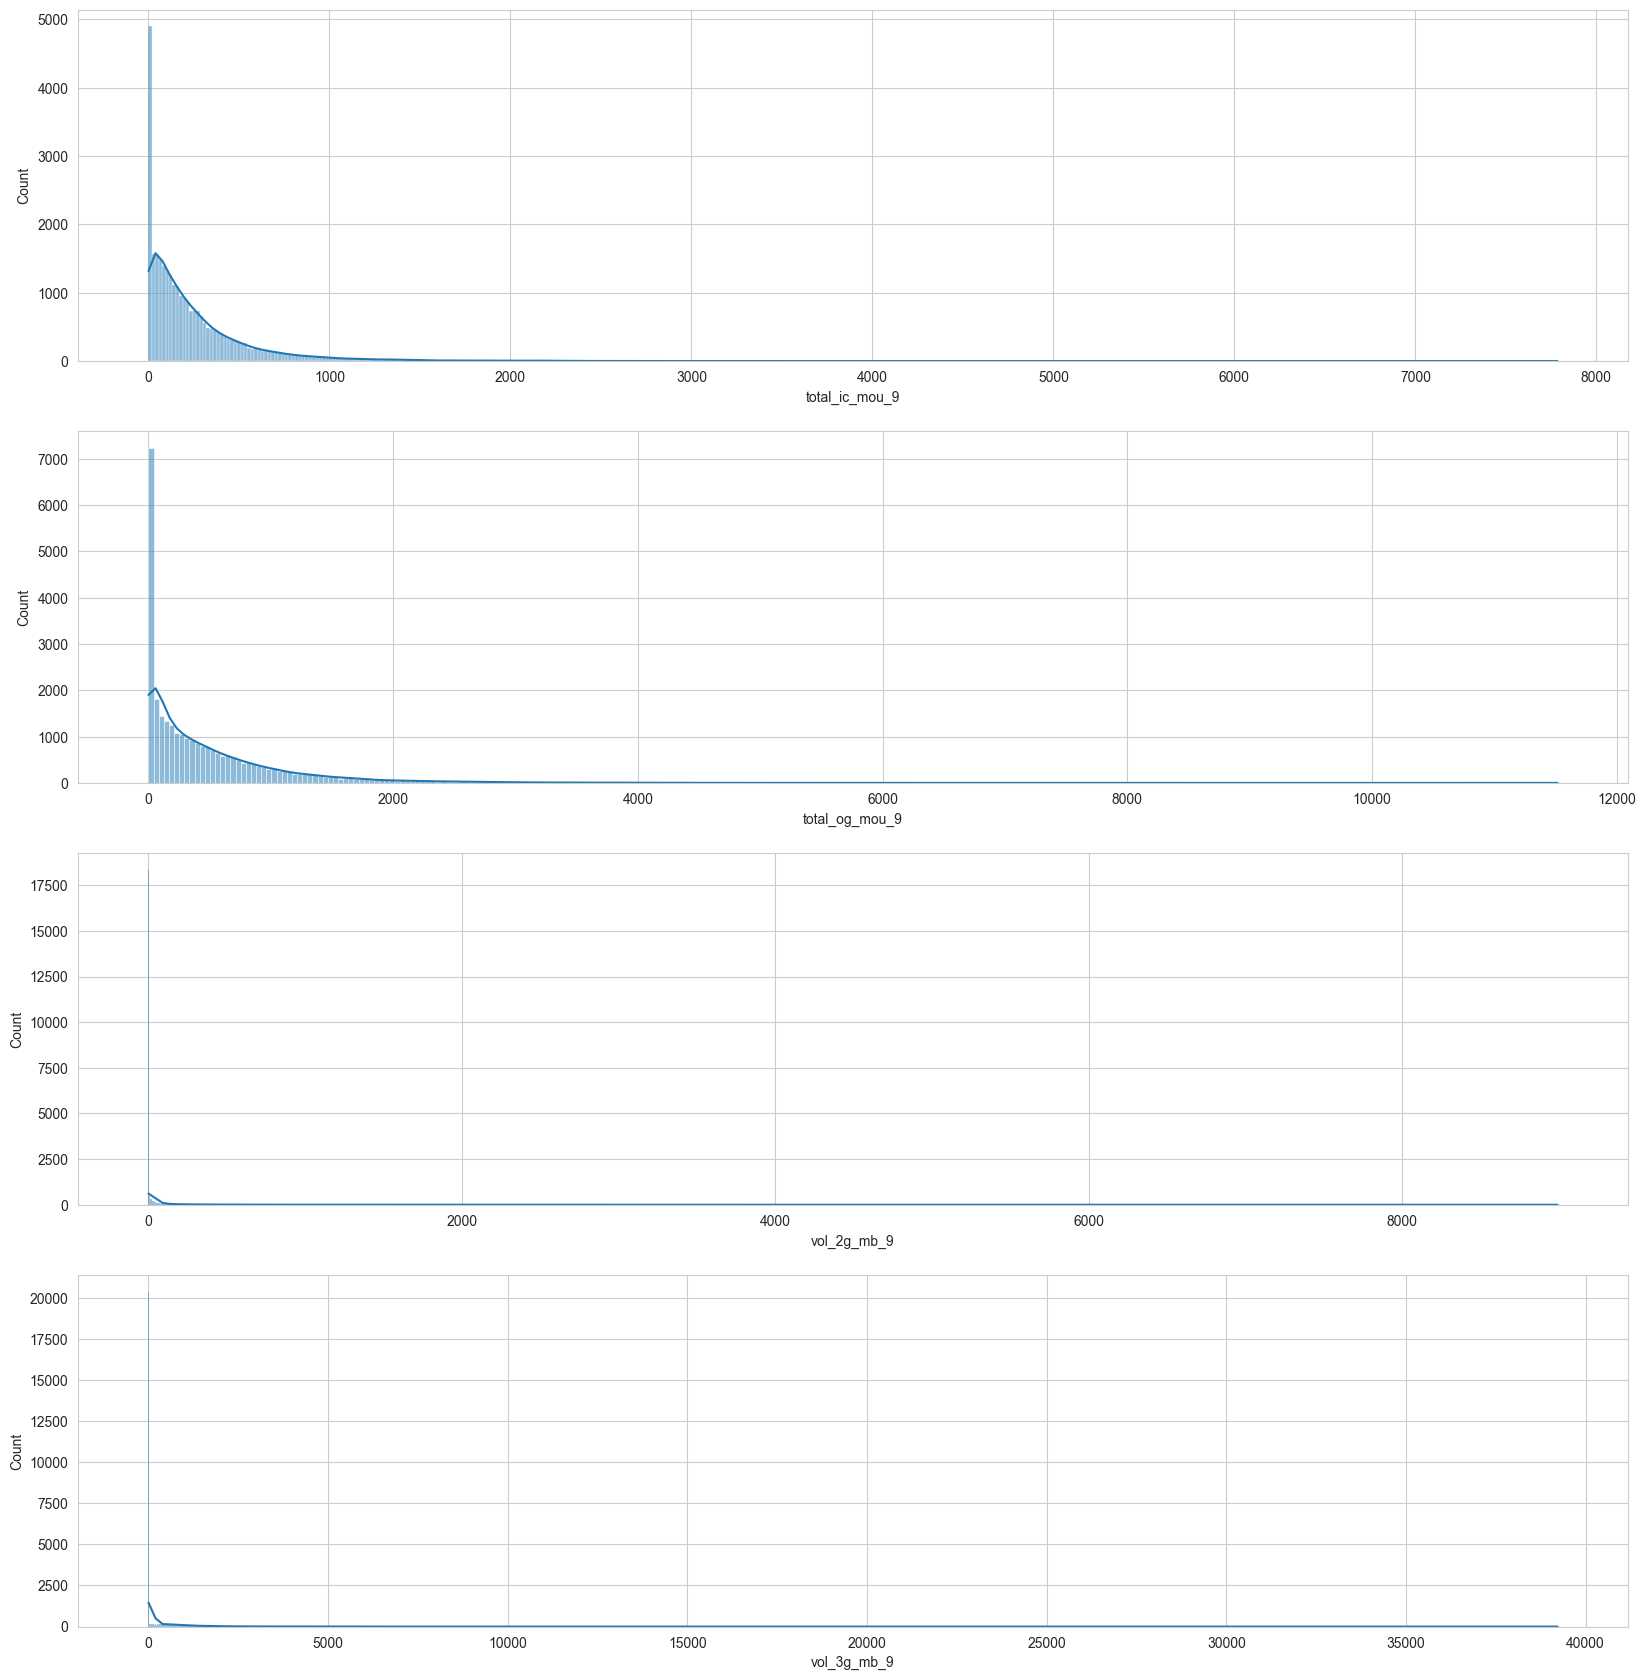

In [173]:
# Initialize a counter variable 'i' to zero
i = 0

# Create a figure with four subplots
plt.figure(figsize=(20, 21))

# Loop through each tag in churned_tags
for tags in churned_tags:
    # Increment the counter variable 'i'
    i += 1

    # Create a subplot for each tag
    plt.subplot(4, 1, i)

    # Plot a histogram of the values in the current tag using seaborn's histplot function
    sns.histplot(data[tags], kde=True)

# Display the plot
plt.show()

In [174]:
# Tag Churners
# Create a new column 'Churned' with NaN values
data['Churned'] = np.nan

In [175]:
# Identify rows where all MOU, OG MOU, and volume metrics for September are zero
data.loc[
    (data['total_ic_mou_9'] == 0) &
    (data['total_og_mou_9'] == 0) &
    (data['vol_2g_mb_9'] == 0) &
    (data['vol_3g_mb_9'] == 0),
    'Churned'
] = 1

In [176]:
# Replace NaN values in the 'Churned' column with zero
data['Churned'] = data['Churned'].fillna(0)

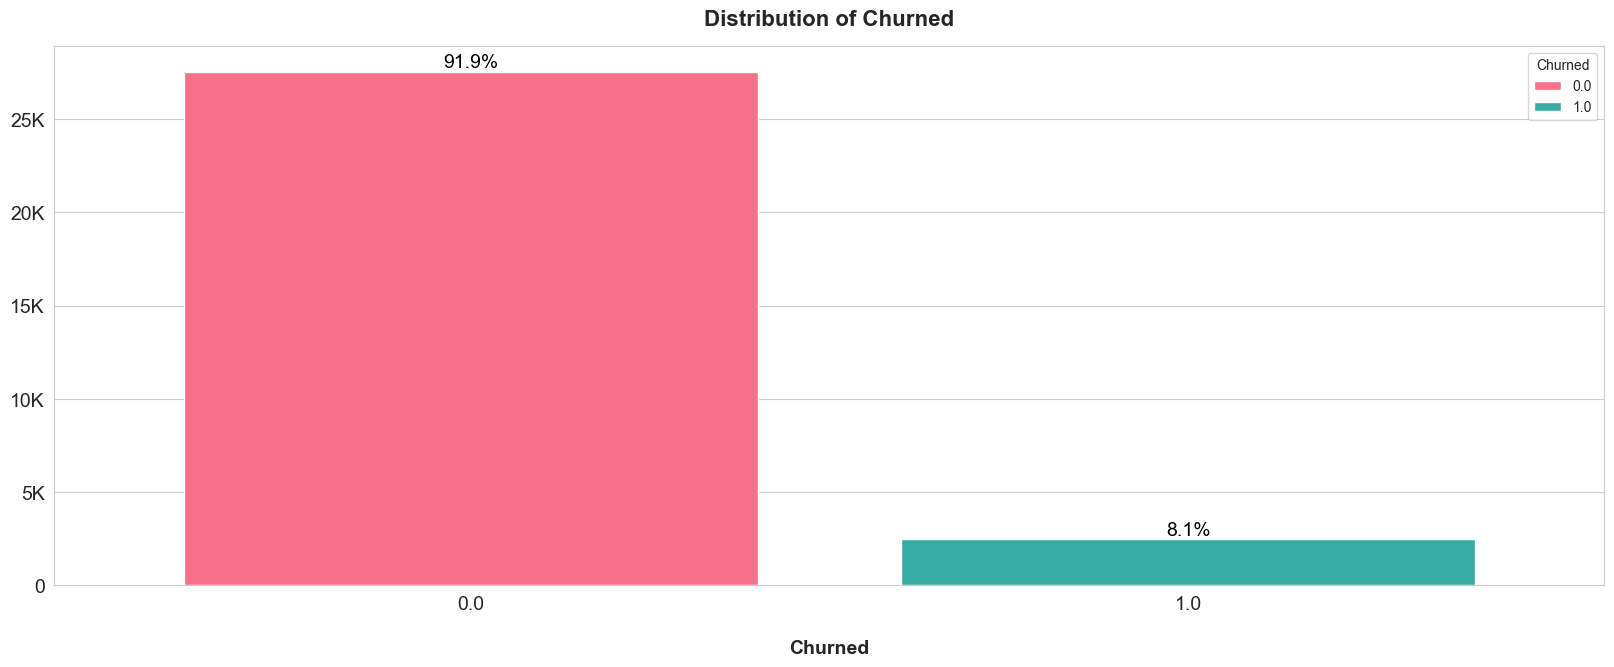

In [177]:
# Check for class imbalance using a count plot
count_plot(data, 'Churned')

In [178]:
# Taking a copy of data before dropping attributes corresponding to the churn phase
data_bak = data.copy()

In [179]:
# Identify columns related to September (e.g., MOU, OG MOU, and volume metrics)
sep_columns = [col for col in data.columns if col.endswith('_9') or 'sep' in col]
sep_columns

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'sep_vbc_3g',
 'total_rech_amt_data_9']

In [180]:
# Drop all the attributes corresponding to the churn phase (all attributes having ‘_9’, etc. in their names)
data.drop(columns=sep_columns, inplace=True)

In [181]:
# Check if there are any non-numeric columns
data.select_dtypes('object').shape[1]

0

In [182]:
# Display a random sample of 5 rows from the updated data
data.sample(5)

arpu_6   arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                         
7002154905     881.435  311.563    44.680        27.31        21.31   
7001458554     627.759  783.374  1355.791       546.56       591.63   
7002274224     821.112  250.205     0.170      1327.28       223.66   
7000494802     359.083  379.728   312.276       153.79       178.08   
7000203047     564.444  478.266   134.176       108.56       219.28   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7002154905            4.83       1859.99        510.23         43.48   
7001458554         1059.44        166.66        116.59        452.86   
7002274224            0.00        744.11        270.06          0.03   
7000494802          279.63        253.48        188.03        192.61   
7000203047           65.68         89.43        188.43         40.39   

               roam_ic_mou_6  ...  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
mobile_number                 ...                                           
7002154905              0.00  ...        0.0        0.0  2169        0.00   
7001458554             71.91  ...        0.0        0.0  1354        0.00   
7002274224             23.31  ...        0.0        0.0  1605        0.00   
7000494802              0.00  ...        1.0        0.0   445       65.76   
7000203047             50.93  ...        1.0        0.0   816        0.00   

               jul_vbc_3g  jun_vbc_3g  total_rech_amt_data_6  \
mobile_number                                                  
7002154905           0.00        0.00                  207.0   
7001458554           0.00        0.00                    0.0   
7002274224           0.00        0.00                    0.0   
7000494802         128.65      115.63                   91.0   
7000203047           0.00       92.81                  903.0   

               total_rech_amt_data_7  total_rech_amt_data_8  Churned  
mobile_number                                                         
7002154905                      96.0                    0.0      0.0  
7001458554                       0.0                    0.0      0.0  
7002274224                       0.0                    0.0      0.0  
7000494802                     179.0                    0.0      0.0  
7000203047                     154.0                    0.0      0.0  

[5 rows x 152 columns]

### Train-test split

In [183]:
# Get the target variable (Churned)
Y = data['Churned']

In [184]:
# Get the feature variables (all columns except Churned)
X = data.drop(columns='Churned')

In [185]:
# Split the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [186]:
# Print the shape of each dataset
for x in [x_train, x_test, y_train, y_test]:
    print(x.shape)

(21000, 151)
(9001, 151)
(21000,)
(9001,)


### Handling Imbalanced Target Variable

In [187]:
# Calculate the proportion of each class (Churned=0 and Churned=1) in the training set
y_train.value_counts(normalize=True) * 100

Churned
0.0    91.861905
1.0     8.138095
Name: proportion, dtype: float64

In [188]:
# Resample the training data using Synthetic Minority Over-sampling Technique (SMOTE)
# SMOTE is used to handle class imbalance by synthesizing new minority class samples
smote = SMOTE(random_state=1)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [189]:
# Calculate the proportion of each class (Churned=0 and Churned=1) in the resampled training set
y_train.value_counts(normalize=True)

Churned
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

## Modelling (churn prediction)

### 1. Baseline Model using DummyClassifier

In [190]:
# Create a baseline model using DummyClassifier with strategy 'most_frequent'
model_baseline = DummyClassifier(strategy='most_frequent')

In [191]:
# Train the baseline model on the training data
model_baseline.fit(x_train, y_train)

DummyClassifier(strategy='most_frequent')

In [192]:
# Predict the target variable for the training set
y_pred_train = model_baseline.predict(x_train)

In [193]:
# Predict the target variable for the test set
y_pred = model_baseline.predict(x_test)

In [194]:
# Print the baseline model metrics
print('-' * 60)
print("Baseline Model Metrics:")
print('-' * 60)
print(classification_report(y_test, y_pred, zero_division=0))

------------------------------------------------------------
Baseline Model Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      8269
         1.0       0.00      0.00      0.00       732

    accuracy                           0.92      9001
   macro avg       0.46      0.50      0.48      9001
weighted avg       0.84      0.92      0.88      9001



In [195]:
# Create a DataFrame for the model report
model_report = pd.DataFrame(data={
    'Model': 'Baseline Model',
    'Train_Accuracy': accuracy_score(y_train, y_pred_train),
    'Train_Precision': precision_score(y_train, y_pred_train, zero_division=0),
    'Train_Recall': recall_score(y_train, y_pred_train, zero_division=0),
    'Train_F1': f1_score(y_train, y_pred_train, zero_division=0),
    'Test_Accuracy': accuracy_score(y_test, y_pred),
    'Test_Precision': precision_score(y_test, y_pred, zero_division=0),
    'Test_Recall': recall_score(y_test, y_pred, zero_division=0),
    'Test_F1': f1_score(y_test, y_pred, zero_division=0),
}, index=[1])

### 2. Logistic Regression Model (Vanilla)

In [196]:
# Create a pipeline for vanilla logistic regression model with RobustScaler and PCA
model_logreg_vanilla = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('pca', PCA(0.95)),
    ('logistic', LogisticRegression(random_state=42))
])

In [197]:
# Train the vanilla logistic regression model on the training data
model_logreg_vanilla.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('pca', PCA(n_components=0.95)),
                ('logistic', LogisticRegression(random_state=42))])

In [198]:
# Predict the target variable for the training set
y_pred_train = model_logreg_vanilla.predict(x_train)

In [199]:
# Predict the target variable for the test set
y_pred = model_logreg_vanilla.predict(x_test)

In [200]:
# Print the metrics for the vanilla logistic regression model
print('-' * 60)
print('Logistic Regression Model (Vanilla) Metrics')
print('-' * 60)
print(classification_report(y_test, y_pred, zero_division=0))

------------------------------------------------------------
Logistic Regression Model (Vanilla) Metrics
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.32      0.49      8269
         1.0       0.11      0.93      0.19       732

    accuracy                           0.37      9001
   macro avg       0.55      0.63      0.34      9001
weighted avg       0.91      0.37      0.46      9001



In [201]:
# Update the model report with the vanilla logistic regression model's metrics
model_report = pd.concat([
    model_report,
    pd.DataFrame(data={
        'Model': 'Logistic Regression Model (Vanilla)',
        'Train_Accuracy': accuracy_score(y_train, y_pred_train),
        'Train_Precision': precision_score(y_train, y_pred_train, zero_division=0),
        'Train_Recall': recall_score(y_train, y_pred_train, zero_division=0),
        'Train_F1': f1_score(y_train, y_pred_train, zero_division=0),
        'Test_Accuracy': accuracy_score(y_test, y_pred),
        'Test_Precision': precision_score(y_test, y_pred, zero_division=0),
        'Test_Recall': recall_score(y_test, y_pred, zero_division=0),
        'Test_F1': f1_score(y_test, y_pred, zero_division=0),
    }, index=[2])
], axis=0)

### 3. Logistic Regression with Hyperparameter Tuning using GridSearchCV

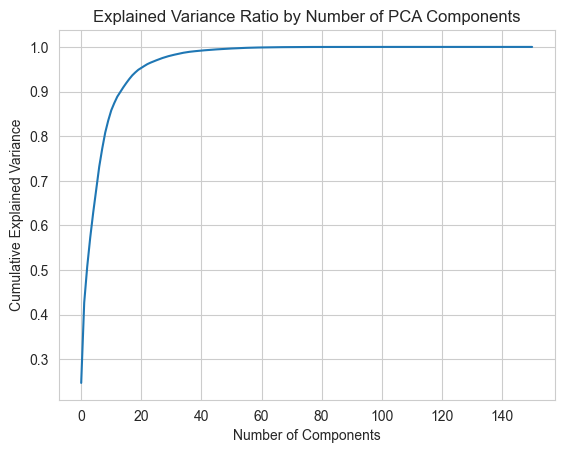

In [202]:
# Apply PCA to the training data and transform it
pca = PCA()
X_pca = pca.fit_transform(x_train)  # Use training data

# Plot the explained variance ratio by number of components
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Number of PCA Components')
plt.grid(True)
plt.show()

#### Handle Multi-collinearity

In [203]:
# Remove multi-collinearity from the training data
x_train_1 = remove_multi_collinearity(x_train)

In [204]:
# Apply the same transformation to the test set
x_test_1 = x_test[x_train.columns]                                                          # Keep the same features in the test set

In [205]:
# Define a parameter grid for hyperparameter tuning
param_grid_logreg = {
    'pca__n_components': [5, 10, 20, 30, 50, 100],                                          # Recommended values for PCA components
    'logistic__C': [0.1, 1, 10, 100],                                                       # Regularization strength
    'logistic__penalty': ['l1', 'l2']                                                       # L1 for Lasso, L2 for Ridge
}

In [206]:
pipeline_logreg_cv = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=0.95)),
    ('logistic', LogisticRegression(random_state=12, solver='liblinear', max_iter=1000000))
])

In [207]:
# Define the file path for the saved model
model_filename = 'Logistic Regression with Hyperparameter Tuning using GridSearchCV.joblib'

In [208]:
# Check if the model file already exists
if os.path.exists(f'Models/{model_filename}'):
    # Load the model from file
    model_logreg_cv = joblib.load(f'Models/{model_filename}')
    print("Model loaded from file.")
else:
    # # Set up GridSearchCV with the pipeline and the parameter grid
    model_logreg_cv = GridSearchCV(
        estimator=pipeline_logreg_cv,
        param_grid=param_grid_logreg,
        cv=5,                                                                               # Number of cross-validation folds
        scoring={'recall': 'recall', 'accuracy': 'accuracy'},                               # Multiple scoring metrics
        refit='recall',                                                                     # Refit the model using the metric with the highest recall score
    )

    # Fit the model
    model_logreg_cv.fit(x_train, y_train)

    # Save the model to a file
    joblib.dump(model_logreg_cv, f'Models/{model_filename}')
    print('Model trained and saved to file.')

Model loaded from file.


In [209]:
# Display the best parameters and model performance
print("Best Hyperparameters for Logistic Regression with PCA:", model_logreg_cv.best_params_)

Best Hyperparameters for Logistic Regression with PCA: {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 5}


In [210]:
# Make predictions using the tuned model
y_pred_train = model_logreg_cv.predict(x_train)

In [211]:
y_pred = model_logreg_cv.predict(x_test)

In [212]:
# Evaluate the model's performance
print('-' * 70)
print('Logistic Regression with Hyperparameter Tuning using GridSearchCV Metrics')
print('-' * 70)
print(classification_report(y_test, y_pred, zero_division=0))

----------------------------------------------------------------------
Logistic Regression with Hyperparameter Tuning using GridSearchCV Metrics
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.36      0.53      8269
         1.0       0.11      0.90      0.20       732

    accuracy                           0.40      9001
   macro avg       0.54      0.63      0.36      9001
weighted avg       0.91      0.40      0.50      9001



In [213]:
# # Add the new model to the report
model_report = pd.concat([
    model_report,
    pd.DataFrame(data={
        'Model': 'Logistic Regression with Hyperparameter Tuning using GridSearchCV',
        'Train_Accuracy': accuracy_score(y_train, y_pred_train),
        'Train_Precision': precision_score(y_train, y_pred_train, zero_division=0),
        'Train_Recall': recall_score(y_train, y_pred_train, zero_division=0),
        'Train_F1': f1_score(y_train, y_pred_train, zero_division=0),
        'Test_Accuracy': accuracy_score(y_test, y_pred),
        'Test_Precision': precision_score(y_test, y_pred, zero_division=0),
        'Test_Recall': recall_score(y_test, y_pred, zero_division=0),
        'Test_F1': f1_score(y_test, y_pred, zero_division=0),
    }, index=[3])
], axis=0)

### 4. Decision Tree (Vanilla)

In [214]:
# Define a Pipeline that consists of RobustScaler and DecisionTreeClassifier
model_dt_vanilla = Pipeline(steps=[
    ('scaler', RobustScaler()),                                                                             # Step 1: Scaling features using RobustScaler
    ('tree', DecisionTreeClassifier(random_state=42))                                                       # Step 2: Fit a Decision Tree Classifier with random state set to 42
])

In [215]:
# Train the model on training data
model_dt_vanilla.fit(x_train, y_train)                                                                      # Fit the pipeline (i.e., apply the scaler and train the classifier using the training data)

Pipeline(steps=[('scaler', RobustScaler()),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [216]:
# Predict labels for the training data
y_pred_train = model_dt_vanilla.predict(x_train)                                                            # Use trained model to predict labels for the training data

In [217]:
# Predict labels for the test data
y_pred = model_dt_vanilla.predict(x_test)                                                                   # Use trained model to predict labels for the test data

In [218]:
# Print classification report and metrics for the Decision Tree Classifier (Vanilla) on both train and test sets
print('-' * 60)
print('Decision Tree (Vanilla) Metrics')
print('-' * 60)
print(classification_report(y_test, y_pred, zero_division=0))                                               # Print classification report

------------------------------------------------------------
Decision Tree (Vanilla) Metrics
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      8269
         1.0       0.37      0.57      0.45       732

    accuracy                           0.89      9001
   macro avg       0.66      0.74      0.69      9001
weighted avg       0.91      0.89      0.90      9001



In [219]:
# Update Model Report dataframe with the evaluation metrics for the Decision Tree Classifier (Vanilla) on both train and test sets
model_report = pd.concat([
    model_report,                                                                                           # Combine existing model_report dataframe with a new dataframe
    pd.DataFrame(data={
        'Model': 'Decision Tree (Vanilla)',                                                                 # Model name
        'Train_Accuracy': accuracy_score(y_train, y_pred_train),                                            # Train accuracy score
        'Train_Precision': precision_score(y_train, y_pred_train, zero_division=0),                         # Train precision score
        'Train_Recall': recall_score(y_train, y_pred_train, zero_division=0),                               # Train recall score
        'Train_F1': f1_score(y_train, y_pred_train, zero_division=0),                                       # Train F1 score
        'Test_Accuracy': accuracy_score(y_test, y_pred),                                                    # Test accuracy score
        'Test_Precision': precision_score(y_test, y_pred, zero_division=0),                                 # Test precision score
        'Test_Recall': recall_score(y_test, y_pred, zero_division=0),                                       # Test recall score
        'Test_F1': f1_score(y_test, y_pred, zero_division=0),                                               # Test F1 score
    }, index=[4])                                                                                           # Add a new row to the model_report dataframe
], axis=0)                                                                                                  # Concatenate along the column axis

### 5. Decision Tree with Hyperparameter Tuning using GridSearchCV

In [220]:
# Define the dictionary of hyperparameter combinations to test using GridSearchCV
param_grid_tree = {
    'tree__criterion': ['gini', 'entropy'],                                                                 # Criterion to use (gini or entropy)
    'tree__max_depth': [5, 10, 20, 30],                                                                     # Maximum tree depth
    'tree__min_samples_split': [2, 5, 10],                                                                  # Minimum number of samples required to split an internal node
    'tree__min_samples_leaf': [1, 2, 4],                                                                    # Minimum number of samples required to be a leaf node
    'tree__max_features': [None, 'sqrt', 'log2']                                                            # Maximum number of features considered when splitting an internal node (None, sqrt or log2)
}

In [221]:
# Define the file path for the saved model
model_filename = 'Decision Tree with Hyperparameter Tuning using GridSearchCV.joblib'

In [222]:
# Check if the model file already exists
if os.path.exists(f'Models/{model_filename}'):
    # Load the model from file
    model_dt_cv = joblib.load(f'Models/{model_filename}')
    print("Model loaded from file.")
else:
    # Setup GridSearchCV
    model_dt_cv = GridSearchCV(
        model_dt_vanilla,                                                                                   # The base model to perform hyperparameter tuning on
        param_grid_tree,                                                                                    # Dictionary of hyperparameters to test
        cv=5,                                                                                               # Number of folds for cross-validation
        scoring={
            'recall': 'recall',                                                                             # Scoring metric used for evaluation (recall and accuracy)
            'accuracy': 'accuracy'
        },                                                                                                  # Multiple scoring metrics
        refit='recall')                                                                                     # Refit the model using the metric with the highest recall score

    # Fit the model
    model_dt_cv.fit(x_train, y_train)

    # Save the model to a file
    joblib.dump(model_dt_cv, f'Models/{model_filename}')
    print('Model trained and saved to file.')

Model loaded from file.


In [223]:
# Best hyperparameters found during GridSearchCV
print('Best hyperparameters found: ', model_dt_cv.best_params_)

Best hyperparameters found:  {'tree__criterion': 'gini', 'tree__max_depth': 20, 'tree__max_features': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}


In [224]:
y_pred_train = model_dt_cv.predict(x_train)

In [225]:
y_pred = model_dt_cv.predict(x_test)

In [226]:
print('-' * 60)
print('Decision Tree with Hyperparameter Tuning using GridSearchCV')
print('-' * 60)
print(classification_report(y_test, y_pred, zero_division=0))

------------------------------------------------------------
Decision Tree with Hyperparameter Tuning using GridSearchCV
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      8269
         1.0       0.39      0.64      0.49       732

    accuracy                           0.89      9001
   macro avg       0.68      0.78      0.71      9001
weighted avg       0.92      0.89      0.90      9001



In [227]:
# Update Model Report
model_report = pd.concat([
    model_report,
    pd.DataFrame(data={
        'Model': 'Decision Tree with Hyperparameter Tuning using GridSearchCV',
        'Train_Accuracy': accuracy_score(y_train, y_pred_train),
        'Train_Precision': precision_score(y_train, y_pred_train, zero_division=0),
        'Train_Recall': recall_score(y_train, y_pred_train, zero_division=0),
        'Train_F1': f1_score(y_train, y_pred_train, zero_division=0),
        'Test_Accuracy': accuracy_score(y_test, y_pred),
        'Test_Precision': precision_score(y_test, y_pred, zero_division=0),
        'Test_Recall': recall_score(y_test, y_pred, zero_division=0),
        'Test_F1': f1_score(y_test, y_pred, zero_division=0),
    }, index=[5])
], axis=0)

### 6. Random Forest with Boosting (Gradient Boosting Classifier)

In [228]:
# Define the file path for the saved model
model_filename = 'Random Forest with Boosting (Gradient Boosting Classifier).joblib'

In [229]:
# Check if the model file already exists
if os.path.exists(f'Models/{model_filename}'):
    # Load the model from file
    model_rf_boosting = joblib.load(f'Models/{model_filename}')
    print("Model loaded from file.")
else:
    model_rf_boosting = Pipeline(steps=[
        ('scaler', RobustScaler()),                                                                                         # Standardize the features using RobustScaler to handle outliers
        ('random_forest', GradientBoostingClassifier(random_state=42))                                                      # Use Gradient Boosting Classifier for improved performance
    ])

    # Fit the model
    model_rf_boosting.fit(x_train, y_train)

    # Save the trained model to a file for later use
    joblib.dump(model_rf_boosting, f'Models/{model_filename}')
    print('Model trained and saved to file.')

Model loaded from file.


In [230]:
# Generate predictions on the training data
y_pred_train = model_rf_boosting.predict(x_train)

In [231]:
# Generate predictions on the test data
y_pred = model_rf_boosting.predict(x_test)

In [232]:
# Display classification report with metrics like precision, recall, and F1-score
print('-' * 60)
print('Random Forest with Boosting (Gradient Boosting Classifier)')
print('-' * 60)
print(classification_report(y_test, y_pred, zero_division=0))

------------------------------------------------------------
Random Forest with Boosting (Gradient Boosting Classifier)
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      8269
         1.0       0.50      0.69      0.58       732

    accuracy                           0.92      9001
   macro avg       0.74      0.82      0.77      9001
weighted avg       0.93      0.92      0.92      9001



In [233]:
# Update Model Report
model_report = pd.concat([
    model_report,
    pd.DataFrame(data={
        'Model': 'Random Forest with Boosting (Gradient Boosting Classifier)',
        'Train_Accuracy': accuracy_score(y_train, y_pred_train),                                                                    # Calculate accuracy on training data
        'Train_Precision': precision_score(y_train, y_pred_train, zero_division=0),                                                 # Calculate precision on training data
        'Train_Recall': recall_score(y_train, y_pred_train, zero_division=0),                                                       # Calculate recall on training data
        'Train_F1': f1_score(y_train, y_pred_train, zero_division=0),                                                               # Calculate F1-score on training data
        'Test_Accuracy': accuracy_score(y_test, y_pred),                                                                            # Calculate accuracy on test data
        'Test_Precision': precision_score(y_test, y_pred, zero_division=0),                                                         # Calculate precision on test data
        'Test_Recall': recall_score(y_test, y_pred, zero_division=0),                                                               # Calculate recall on test data
        'Test_F1': f1_score(y_test, y_pred, zero_division=0),                                                                       # Calculate F1-score on test data
    }, index=[6])                                                                                                                   # Add the model information to the 'model_report' dataframe
], axis=0)

### 7. Ensemble Models with Hyperparameter Tuning

In [234]:
# Define the file path for the saved model
model_filename = 'Ensemble Models with Hyperparameter Tuning.joblib'

In [235]:
# Hyperparameters to tune in each tree-based classifier (Decision Tree, Random Forest, Gradient Boosting)
param_grid_ensemble = {
    'ensemble__tree__criterion': ['entropy'],                                                                           # The function to use to calculate the quality of a split
    'ensemble__tree__max_depth': [5, 10, 20, 30],                                                                       # Maximum depth of the tree
    'ensemble__tree__min_samples_split': [2, 5, 10],                                                                    # Minimum number of samples required to split an internal node
    'ensemble__tree__min_samples_leaf': [1, 2, 4],                                                                      # Minimum number of samples required to be at a leaf node
    'ensemble__rf__n_estimators': [10, 50, 100]                                                                         # Number of trees in the forest
}

In [236]:
# Define an ensemble of tree-based classifiers (Decision Tree, Random Forest, Gradient Boosting)
ensemble = VotingClassifier(estimators=[
    ('tree', DecisionTreeClassifier(random_state=42)),                                                                  # Decision Tree Classifier
    ('rf', RandomForestClassifier(random_state=42)),                                                                    # Random Forest Classifier
    ('gb', GradientBoostingClassifier(random_state=42))                                                                 # Gradient Boosting Classifier
], voting='soft')                                                                                                       # Soft Voting: the predicted class is chosen based on the highest average probability across all base estimators

In [237]:
# Check if the model file already exists
if os.path.exists(f'Models/{model_filename}'):
    # Load the model from file
    model_ensemble = joblib.load(f'Models/{model_filename}')
    print("Model loaded from file.")
else:
    pipeline_ensemble = Pipeline(steps=[
        ('scaler', RobustScaler()),                                                                                     # Scale features using robust scaling
        ('ensemble', ensemble)                                                                                          # Define the ensemble of tree-based classifiers
    ])

    model_ensemble = GridSearchCV(pipeline_ensemble, param_grid_ensemble, cv=5, scoring={
        'recall': 'recall',                                                                                             # Scoring metric: recall
        'accuracy': 'accuracy'                                                                                          # Scoring metric: accuracy
    },                                                                                                                  # Multiple scoring metrics
    refit='recall' , n_jobs=-1)                                                                                         # Fit the model using multiple processes

    # Fit the model
    model_ensemble.fit(x_train, y_train)

    # Save the model to a file
    joblib.dump(model_ensemble, f'Models/{model_filename}')
    print('Model trained and saved to file.')

Model loaded from file.


In [238]:
# Print the best combination of hyperparameters
print("\nBest Hyperparameters for Ensemble Model:", model_ensemble.best_params_)


Best Hyperparameters for Ensemble Model: {'ensemble__rf__n_estimators': 100, 'ensemble__tree__criterion': 'entropy', 'ensemble__tree__max_depth': 30, 'ensemble__tree__min_samples_leaf': 1, 'ensemble__tree__min_samples_split': 2}


In [239]:
# Predict the class labels for the training set
y_pred_train = model_ensemble.predict(x_train)

In [240]:
# Predict the class labels for the test set
y_pred = model_ensemble.predict(x_test)

In [241]:
# Print a classification report for the model
print('-' * 60)
print('Ensemble Models with Hyperparameter Tuning')
print('-' * 60)
print(classification_report(y_test, y_pred, zero_division=0))

------------------------------------------------------------
Ensemble Models with Hyperparameter Tuning
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      8269
         1.0       0.52      0.64      0.57       732

    accuracy                           0.92      9001
   macro avg       0.74      0.79      0.76      9001
weighted avg       0.93      0.92      0.93      9001



In [242]:
# Update Model Report
model_report = pd.concat([
    model_report,
    pd.DataFrame(data={
        'Model': 'Ensemble Models with Hyperparameter Tuning',                                                                          # Name of the model
        'Train_Accuracy': accuracy_score(y_train, y_pred_train),                                                                        # Accuracy on training set
        'Train_Precision': precision_score(y_train, y_pred_train, zero_division=0),                                                     # Precision on training set
        'Train_Recall': recall_score(y_train, y_pred_train, zero_division=0),                                                           # Recall on training set
        'Train_F1': f1_score(y_train, y_pred_train, zero_division=0),                                                                   # F1 score on training set
        'Test_Accuracy': accuracy_score(y_test, y_pred),                                                                                # Accuracy on test set
        'Test_Precision': precision_score(y_test, y_pred, zero_division=0),                                                             # Precision on test set
        'Test_Recall': recall_score(y_test, y_pred, zero_division=0),                                                                   # Recall on test set
        'Test_F1': f1_score(y_test, y_pred, zero_division=0),                                                                           # F1 score on test set
    }, index=[7])
], axis=0)

In [243]:
# Show the model report for performance comparison across models
model_report

Model  Train_Accuracy  \
1                                     Baseline Model        0.500000   
2                Logistic Regression Model (Vanilla)        0.629050   
3  Logistic Regression with Hyperparameter Tuning...        0.633637   
4                            Decision Tree (Vanilla)        1.000000   
5  Decision Tree with Hyperparameter Tuning using...        0.989114   
6  Random Forest with Boosting (Gradient Boosting...        0.940361   
7         Ensemble Models with Hyperparameter Tuning        1.000000   

   Train_Precision  Train_Recall  Train_F1  Test_Accuracy  Test_Precision  \
1         0.000000      0.000000  0.000000       0.918676        0.000000   
2         0.579917      0.936447  0.716268       0.373736        0.108789   
3         0.586238      0.908455  0.712616       0.404511        0.110700   
4         1.000000      1.000000  1.000000       0.886346        0.369973   
5         0.981575      0.996942  0.989199       0.890679        0.393761   
6         0.940019      0.940750  0.940384       0.919009        0.501481   
7         1.000000      1.000000  1.000000       0.922231        0.517660   

   Test_Recall   Test_F1  
1     0.000000  0.000000  
2     0.931694  0.194829  
3     0.898907  0.197124  
4     0.565574  0.447326  
5     0.637978  0.486966  
6     0.693989  0.582235  
7     0.640710  0.572650

In [244]:
# Get only Test data performance
model_report_test = model_report.drop(columns=model_report.columns[model_report.columns.str.startswith('Train_')])

In [245]:
# Show the model report for performance comparison across models (only for Test data)
model_report_test

Model  Test_Accuracy  \
1                                     Baseline Model       0.918676   
2                Logistic Regression Model (Vanilla)       0.373736   
3  Logistic Regression with Hyperparameter Tuning...       0.404511   
4                            Decision Tree (Vanilla)       0.886346   
5  Decision Tree with Hyperparameter Tuning using...       0.890679   
6  Random Forest with Boosting (Gradient Boosting...       0.919009   
7         Ensemble Models with Hyperparameter Tuning       0.922231   

   Test_Precision  Test_Recall   Test_F1  
1        0.000000     0.000000  0.000000  
2        0.108789     0.931694  0.194829  
3        0.110700     0.898907  0.197124  
4        0.369973     0.565574  0.447326  
5        0.393761     0.637978  0.486966  
6        0.501481     0.693989  0.582235  
7        0.517660     0.640710  0.572650

### Recommended Model
___
Based on the evaluation metrics:

1. **Recall** is highest for the **Logistic Regression Model (Vanilla)** and **Logistic Regression with Hyperparameter Tuning**. However, these models have significantly lower precision and F1 Scores, which suggests that while they identify many churners, they also misclassify a large number of non-churners as churners.
2. **Ensemble Models with Hyperparameter Tuning** and **Random Forest with Boosting (Gradient Boosting Classifier)** provide a good balance between recall and precision. The **Random Forest with Boosting** has a slightly better F1 Score (0.58) compared to the **Ensemble Model with Hyperparameter Tuning** (0.57), indicating a slightly better balance between precision and recall.
3. Given that the **Random Forest with Boosting (Gradient Boosting Classifier)** has a relatively high recall (0.693989) and the highest F1 Score (0.58), it would be the recommended model. This model effectively identifies churners while maintaining a reasonable precision, providing a good balance for the business objective of minimizing missed churns while avoiding too many false positives.
4. To conclude, the **Random Forest with Boosting (Gradient Boosting Classifier)** is the most suitable model, as it has a high recall and the highest F1 Score among the models, aligning well with the business goal of accurately identifying churners.

In [246]:
# Final Model
model = model_rf_boosting

## Identifying important churn indicators

In [247]:
# Extract the fitted classifier from the pipeline
gb_model = model.named_steps['random_forest']

In [248]:
# Get feature importance's
feature_importance = gb_model.feature_importances_

In [249]:
# 2. Create a DataFrame for visualization
# Assuming `X` is your original dataset with feature names
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

In [250]:
# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

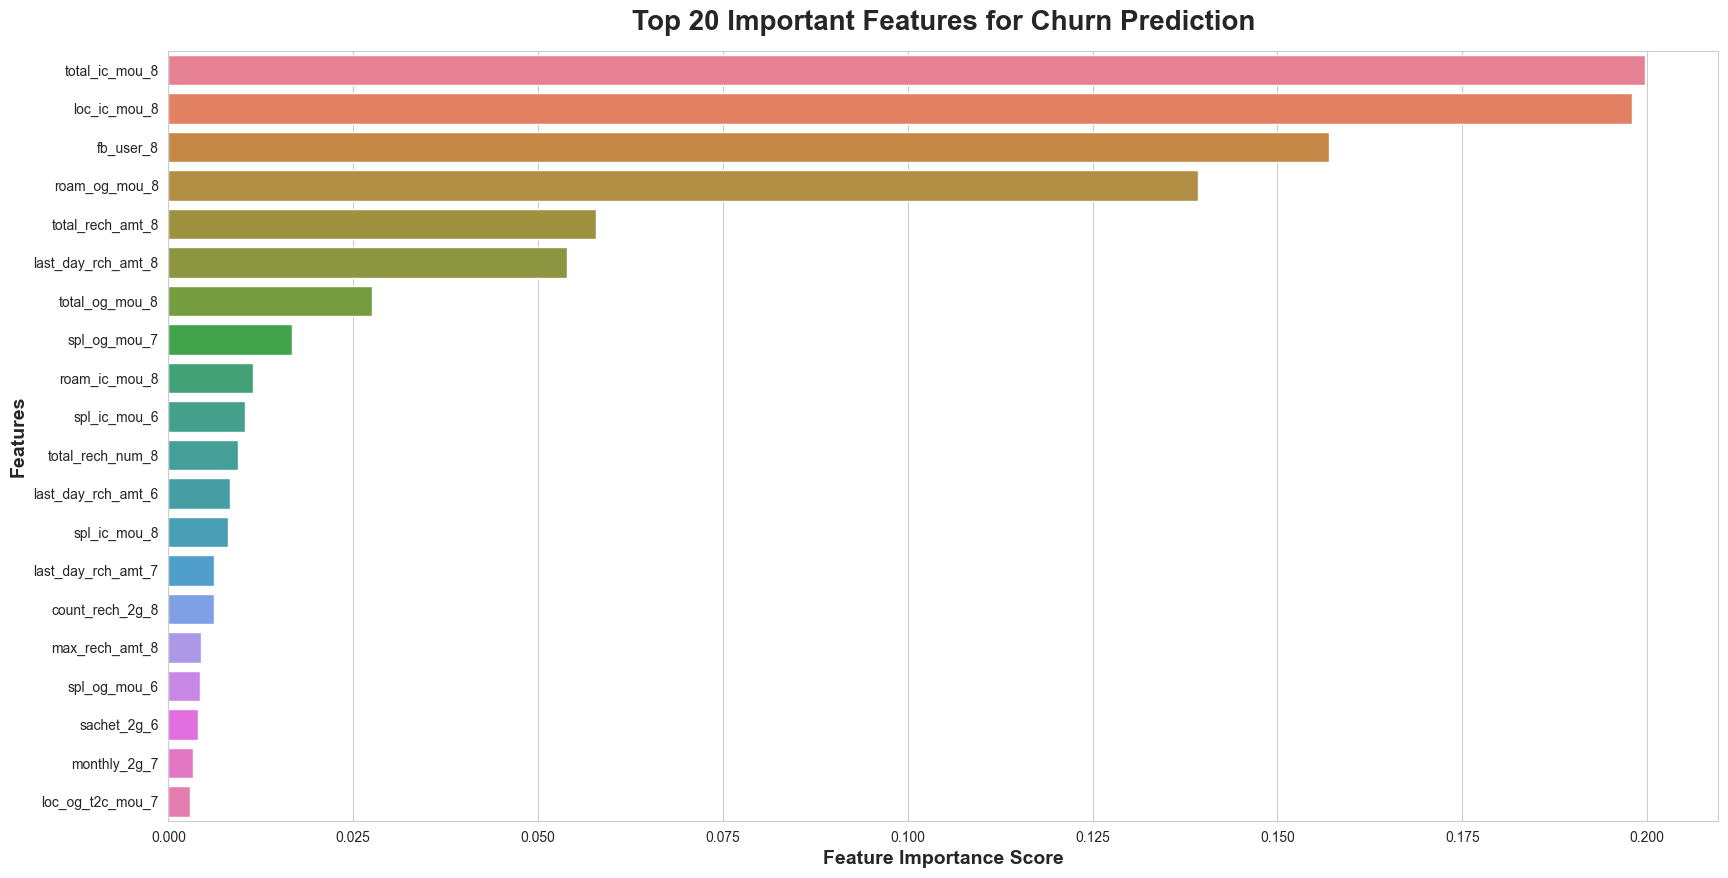

In [251]:
# 3. Visualize Feature Importance's using a Horizontal Bar Plot
plt.figure(figsize=(20, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='husl', hue='Feature')  # Plot top 20 features
plt.title('Top 20 Important Features for Churn Prediction', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Feature Importance Score', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')
# plt.tight_layout()
plt.show()

In [252]:
# Copying the top 20 features to clipboard
feature_importance_df.head(20)['Feature'].to_clipboard(index=False)

## Business Recommendations
___
___

Based on the features identified as important for predicting customer churn, here are some actionable recommendations for the telecom company to reduce churn among high-value customers:

### 1. Monitor Usage Patterns and Offer Personalized Plans
___
#### Total Incoming and Outgoing Minutes
`total_ic_mou_8, total_og_mou_8, loc_ic_mou_8, roam_og_mou_8, roam_ic_mou_8, spl_ic_mou_8, spl_og_mou_8, loc_og_t2c_mou_7`

Customers with declining incoming and outgoing call minutes or roaming call minutes may be at risk of churn. Analyzing these patterns can help identify customers whose usage is dropping. For such customers, proactive engagement through personalized offers, discounts, or tailored plans that better suit their usage could help retain them.

#### Special Calls
`spl_ic_mou, spl_og_mou`

A decrease in special call usage (like international or premium services) might indicate reduced engagement or the use of alternative services. Consider offering discounts or bundled packages on these services to retain customers who frequently use them.

### 2. Leverage the Strong Correlation Between 2G & 3G Revenues to Create Bundled Offers
___
#### Data Usage Patterns
`count_rech_2g_8, monthly_2g_7, sachet_2g_6`

Given the strong correlation between 2G and 3G revenues, the company should create bundled data plans that include both 2G and 3G services. This approach can encourage customers who primarily use one service to adopt the other, potentially increasing overall data usage and revenue. Additionally, targeting users who frequently recharge 2G services with incentives for upgrading to 3G could increase customer retention and satisfaction.


### 3. Address the Decline in Data Usage, Especially for 2G, with Targeted Campaigns
___
#### Data Recharge Patterns
`count_rech_2g_8, sachet_2g_6, monthly_2g_7`

The notable decline in 2G data usage, while 3G usage remains stable, indicates a shift towards higher data speeds. The company should consider migrating 2G users to 3G through targeted campaigns offering incentives such as free 3G service trials or discounts on 3G data packs. Educating customers about the advantages of 3G over 2G can help increase 3G adoption rates.

### 4. Focus on Increasing Average Revenue Per User (ARPU) by Enhancing Call and Data Plans
___
#### Recharge Amounts
`total_rech_amt_8, last_day_rch_amt_8, last_day_rch_amt_6, last_day_rch_amt_7, total_rech_num_8, max_rech_amt_8`

The decline in ARPU for calls since July and the fluctuating data usage patterns suggest potential cost concerns or competition. To address this, the company could introduce promotional offers such as discounted call rates during off-peak hours or bonus data packs to encourage higher usage. Focus on enhancing the value proposition of call and data plans to stabilize and increase ARPU. Monitoring and promoting recharges through targeted marketing efforts can help counteract the decline in recharge amounts.

### 5. Improve Customer Engagement and Retention with Social Media Integration
___
#### Facebook Services
`fb_user_8`

If Facebook usage is a strong predictor of churn, customers who are not using Facebook services might not be as engaged with their mobile provider. Promote social media packages or collaborate with popular social platforms to offer exclusive data deals or access to premium content. Additionally, consider integrating with more popular apps to drive higher customer engagement and loyalty.

### 6. Identify High-Risk Customers Early and Implement Retention Strategies
___
#### Behavior Changes in the Action Phase (Months 6, 7, and 8)

Customers whose behavior changes significantly from the 'good' phase to the 'action' phase are more likely to churn. Implement a monitoring system to flag customers showing reduced activity or erratic usage patterns. These customers should receive targeted interventions, such as personalized communication, loyalty programs, or special retention offers, to prevent churn.

### 7. Optimize Roaming and Night Pack Offers to Prevent Revenue Loss
___
#### Roaming Usage
`roam_og_mou_8, roam_ic_mou_8`

Customers who frequently use roaming services might churn if they find more competitive roaming rates with other providers. To retain these customers, the company should offer competitive roaming plans, including discounted rates for frequent travelers and better packages for international roaming.

#### Night Packs
`night_pck_user`

To address the decline in night pack subscribers, the company should revisit pricing strategies and offer more competitive rates. Launching revamped night pack offers with attractive pricing or additional benefits (such as double data or extended validity) can encourage customers to continue using these services.

### 8. Improve Customer Service Quality and Address Issues Promptly
___
#### Customer Support and Complaint Handling
`loc_og_t2c_mou_7`

Outgoing calls to call centers could indicate service dissatisfaction. Monitoring call center interactions and promptly addressing customer complaints can enhance customer satisfaction and reduce churn. Ensure the customer support team is trained to identify churn indicators and provide proactive solutions.

### 9. Implement Loyalty Programs and Reward High-Value Customers
___
#### Loyalty Programs

Given that 80% of revenue comes from the top 20% of customers, a loyalty program targeting high-value customers could be highly effective. Offer rewards such as exclusive deals, priority customer service, or loyalty points redeemable for future services. This will help in retaining high-value customers and encourage continued loyalty. With over 20% of users having been customers for more than six years, special retention programs should be tailored for these long-term customers. Offering loyalty rewards, exclusive deals, or premium customer service could effectively retain these valuable customers. Personalized communication that acknowledges their loyalty can also reinforce their commitment to the company.

### Conclusion
___
By focusing on these actionable recommendations, the telecom company can effectively target high-risk customers, enhance customer satisfaction, and ultimately reduce churn rates. Tailoring strategies to the specific behaviors and needs of customers will be key in retaining them in this competitive market.